**1000 IMDB movies (2006-2016)**

**Author:** Prarthna Nemade

**ABSTRACT**

Interpreting models:

1. Fitting a linear model and interpreting the regression coefficients

2. Fitting a tree-based model and interpreting the nodes

3.  Using auto ml to find the best model

4. Run SHAP analysis on the models, interpreting the SHAP values

In [1]:
# Importing all libraries necessary for the assignment
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install --upgrade h2o
!pip install --upgrade scikit-learn


import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import lime
from lime import lime_tabular
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (32, 24)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 8.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=73a62eb85d430827290bff8dc093ecaed4063b55dd671bd320a749952bcac116
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: ht

In [2]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [3]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


In [4]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:16193..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3apr1dh5
  JVM stdout: /tmp/tmp3apr1dh5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3apr1dh5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:16193
Connecting to H2O server at http://127.0.0.1:16193 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    19 days
H2O_cluster_name:           H2O_from_python_unknownUser_0r4ifp
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:16193
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

In [5]:
df = pd.read_csv("https://github.com/PrarthanaNemade14/Model_Interpretability/raw/main/imdb.csv")

In [6]:
# Printing numerical and categorical columns

numeric_columns = []
categorical_columns = []

# Iterate through each column in the dataset
for column in df.columns:
    # Checking if the column is of numeric data type
    if df[column].dtype in ['int64', 'float64']:
        numeric_columns.append(column)
    # Check if the column is of categorical data type
    elif df[column].dtype in ['object']:
        categorical_columns.append(column)

# Print
print("The Numeric and Categorical values are:")
print("----------------------------------------")
print("Numeric Columns:", numeric_columns)

# Print 
print("\nCategorical Columns:", categorical_columns)

The Numeric and Categorical values are:
----------------------------------------
Numeric Columns: ['Rank', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']

Categorical Columns: ['Title', 'Genre', 'Description', 'Director', 'Actors']


In [7]:
df.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [8]:
# Imputing the null values for "Revenue"

null_val = ['Revenue (Millions)']

#Technique 1: Using mean to impute the missing values
for i in null_val:
 df.loc[df.loc[:,i].isna(),i] = df.loc[:,i].mean()

 

In [9]:
df.isna().sum()

Rank                   0
Title                  0
Genre                  0
Description            0
Director               0
Actors                 0
Year                   0
Runtime (Minutes)      0
Rating                 0
Votes                  0
Revenue (Millions)     0
Metascore             64
dtype: int64

In [10]:
# Imputing the null values for "Metascore" using KNN

from sklearn.impute import KNNImputer

null_value = df.iloc[:, 11:12]

# Create an imputer object
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer to the column
null_value_imputed = imputer.fit_transform(null_value)

# Replace the original column with the imputed column
df.iloc[:, 11:12] = null_value_imputed

In [11]:
df.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [12]:
df.describe()

Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000         113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962          18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000          66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000         100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000         111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000         123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000         191.000000     9.000000  1.791916e+06   

       Revenue (Millions)    Metascore  
count         1000.000000  1000.000000  
mean            82.956376    58.985043  
std             96.412043    16.634858  
min              0.000000    11.000000  
25%             17.442500    47.750000  
50%             60.375000    58.985043  
75%             99.177500    71.000000  
max            936.630000   100.000000

This table shows summary statistics for a dataset with 1000 observations and 07 variables.

The variables are: Rank, Year, Runtime (Minutes), Rating, Votes, Revenue(Millions), Metascore.

The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable.

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.

In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# extract categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# one-hot encode categorical columns
encoder = OneHotEncoder()
encoded_cols = encoder.fit_transform(df[cat_cols])
encoded_cols_df = pd.DataFrame(encoded_cols.toarray(), columns=encoder.get_feature_names_out(cat_cols))

# replace categorical columns with encoded columns
data = df.drop(columns=cat_cols)
data = pd.concat([data, encoded_cols_df], axis=1)

# use data for training
x_train = data.drop(columns=['Votes'])
y_train = data['Votes']


In [14]:
data

Rank  Year  Runtime (Minutes)  Rating   Votes  Revenue (Millions)  \
0       1  2014                121     8.1  757074          333.130000   
1       2  2012                124     7.0  485820          126.460000   
2       3  2016                117     7.3  157606          138.120000   
3       4  2016                108     7.2   60545          270.320000   
4       5  2016                123     6.2  393727          325.020000   
..    ...   ...                ...     ...     ...                 ...   
995   996  2015                111     6.2   27585           82.956376   
996   997  2007                 94     5.5   73152           17.540000   
997   998  2008                 98     6.2   70699           58.010000   
998   999  2014                 93     5.6    4881           82.956376   
999  1000  2016                 87     5.3   12435           19.640000   

     Metascore  Title_(500) Days of Summer  Title_10 Cloverfield Lane  \
0         76.0                         0.0                        0.0   
1         65.0                         0.0                        0.0   
2         62.0                         0.0                        0.0   
3         59.0                         0.0                        0.0   
4         40.0                         0.0                        0.0   
..         ...                         ...                        ...   
995       45.0                         0.0                        0.0   
996       46.0                         0.0                        0.0   
997       50.0                         0.0                        0.0   
998       22.0                         0.0                        0.0   
999       11.0                         0.0                        0.0   

     Title_10 Years  ...  \
0               0.0  ...   
1               0.0  ...   
2               0.0  ...   
3               0.0  ...   
4               0.0  ...   
..              ...  ...   
995             0.0  ...   
996             0.0  ...   
997             0.0  ...   
998             0.0  ...   
999             0.0  ...   

     Actors_Zach Galifianakis, Bradley Cooper, Justin Bartha, Ed Helms  \
0                                                  0.0                   
1                                                  0.0                   
2                                                  0.0                   
3                                                  0.0                   
4                                                  0.0                   
..                                                 ...                   
995                                                0.0                   
996                                                0.0                   
997                                                0.0                   
998                                                0.0                   
999                                                0.0                   

     Actors_Zach Galifianakis, Isla Fisher, Jon Hamm, Gal Gadot  \
0                                                  0.0            
1                                                  0.0            
2                                                  0.0            
3                                                  0.0            
4                                                  0.0            
..                                                 ...            
995                                                0.0            
996                                                0.0            
997                                                0.0            
998                                                0.0            
999                                                0.0            

     Actors_Zach Galifianakis, Kristen Wiig, Owen Wilson, Ross Kimball  \
0                                                  0.0                   
1                                                  0.0      

In [15]:
# Concatenate the encoded column with the original dataframe
df = pd.concat([df, data], axis=1)
df.head()

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016                108   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016                123   

   Rating   Votes  ...  \
0     8.1  757074  ...   
1     7.0  485820  ...   
2     7.3  157606  ...   
3     7.2   60545  ...   
4     6.2  393727  ...   

   Actors_Zach Galifianakis, Bradley Cooper, Justin Bartha, Ed Helms  \
0                                                0.0                   
1                                                0.0                   
2                                                0.0                   
3                                                0.0                   
4                                                0.0                   

   Actors_Zach Galifianakis, Isla Fisher, Jon Hamm, Gal Gadot  \
0                                                0.0            
1                                                0.0            
2                                                0.0            
3                                                0.0            
4                                                0.0            

   Actors_Zach Galifianakis, Kristen Wiig, Owen Wilson, Ross Kimball  \
0                                                0.0                   
1                                                0.0                   
2                                                0.0                   
3                                                0.0                   
4                                                0.0                   

   Actors_Zachary Gordon, Devon Bostick, Robert Capron,Rachael Harris  \
0                                                0.0                    
1                                                0.0                    
2                                                0.0                    
3                                                0.0                    
4                                                0.0                    

   Actors_Zachary Gordon, Robert Capron, Devon Bostick,Steve Zahn  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   Actors_Zachary Gordon, Robert Capron, Rachael Harris,Steve Zahn  \
0                                                0.0                 
1                                                0.0                 
2                                                0.0                 
3                                                0.0                 
4                                                0.0    

In [16]:
X = data.iloc[:,:-1]
X

Rank  Year  Runtime (Minutes)  Rating   Votes  Revenue (Millions)  \
0       1  2014                121     8.1  757074          333.130000   
1       2  2012                124     7.0  485820          126.460000   
2       3  2016                117     7.3  157606          138.120000   
3       4  2016                108     7.2   60545          270.320000   
4       5  2016                123     6.2  393727          325.020000   
..    ...   ...                ...     ...     ...                 ...   
995   996  2015                111     6.2   27585           82.956376   
996   997  2007                 94     5.5   73152           17.540000   
997   998  2008                 98     6.2   70699           58.010000   
998   999  2014                 93     5.6    4881           82.956376   
999  1000  2016                 87     5.3   12435           19.640000   

     Metascore  Title_(500) Days of Summer  Title_10 Cloverfield Lane  \
0         76.0                         0.0                        0.0   
1         65.0                         0.0                        0.0   
2         62.0                         0.0                        0.0   
3         59.0                         0.0                        0.0   
4         40.0                         0.0                        0.0   
..         ...                         ...                        ...   
995       45.0                         0.0                        0.0   
996       46.0                         0.0                        0.0   
997       50.0                         0.0                        0.0   
998       22.0                         0.0                        0.0   
999       11.0                         0.0                        0.0   

     Title_10 Years  ...  \
0               0.0  ...   
1               0.0  ...   
2               0.0  ...   
3               0.0  ...   
4               0.0  ...   
..              ...  ...   
995             0.0  ...   
996             0.0  ...   
997             0.0  ...   
998             0.0  ...   
999             0.0  ...   

     Actors_Zac Efron, Wes Bentley, Emily Ratajkowski, Jonny Weston  \
0                                                  0.0                
1                                                  0.0                
2                                                  0.0                
3                                                  0.0                
4                                                  0.0                
..                                                 ...                
995                                                0.0                
996                                                0.0                
997                                                0.0                
998                                                0.0                
999                                                0.0                

     Actors_Zach Galifianakis, Bradley Cooper, Justin Bartha, Ed Helms  \
0                                                  0.0                   
1                                                  0.0                   
2                                                  0.0                   
3                                                  0.0                   
4                                                  0.0                   
..                                                 ...                   
995                                                0.0                   
996                                                0.0                   
997                                                0.0                   
998                                                0.0                   
999                                                0.0                   

     Actors_Zach Galifianakis, Isla Fisher, Jon Hamm, Gal Gadot  \
0                                                  0.0            
1                         

In [17]:
y = data['Votes']
y

0      757074
1      485820
2      157606
3       60545
4      393727
        ...  
995     27585
996     73152
997     70699
998      4881
999     12435
Name: Votes, Length: 1000, dtype: int64

**Training the dataset**

**Linear Regression**

In [18]:
X = data.drop(["Votes", "Rank"], axis=1)  # Training Feature
Y = data["Votes"]  # Target

In [27]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_1000 = shap.utils.sample(
    x_train, 1000
)  # Taking 1000 samples out for SHAP analysis as it is a computationally expensive process
x_test_1000 = shap.utils.sample(
    x_test, 1000
)  # Taking 1000 samples out for SHAP analysis as it is a computationally expensive process

In [28]:
import sklearn

linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

LinearRegression()

In [29]:
# Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
dff = data.drop("Votes", axis=1)
df_norm = (dff - dff.min()) / (dff.max() - dff.min())
df_norm = pd.concat((df_norm, df.Votes), 1)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


In [30]:
import pandas as pd
import statsmodels.api as sm

# Create a dataframe with the predictor variables
X = sm.add_constant(data[['Rank', 'Year', 'Runtime (Minutes)', 'Rating', 'Revenue (Millions)', 'Metascore']])

# Create a series with the response variable
y = data['Votes']

# Fit a linear model
regr = sm.OLS(y, X).fit()

# Print the model summary
print(regr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Votes   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     294.6
Date:                Wed, 29 Mar 2023   Prob (F-statistic):          1.64e-216
Time:                        01:42:38   Log-Likelihood:                -13055.
No. Observations:                1000   AIC:                         2.612e+04
Df Residuals:                     993   BIC:                         2.616e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.885e+07   2.51

In [31]:
y = regr.predict(X)
y

0      507710.695696
1      306078.884507
2      247376.275466
3      348861.117956
4      352605.111196
           ...      
995     37188.753495
996     81894.673767
997    140270.000465
998      2120.562428
999   -116692.129812
Length: 1000, dtype: float64

In [32]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Votes   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     294.6
Date:                Wed, 29 Mar 2023   Prob (F-statistic):          1.64e-216
Time:                        01:42:44   Log-Likelihood:                -13055.
No. Observations:                1000   AIC:                         2.612e+04
Df Residuals:                     993   BIC:                         2.616e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.885e+07   2.51e+06     15.500      0.000    3.39e+07    4.38e+07
Rank                -113.2988     14.137     -8.014      0.000    -141.041     -85.557
Year               -1.946e+04   1239.081    -15.709      0.000   -2.19e+04    -1.7e+04
Runtime (Minutes)    932.9269    214.971      4.340      0.000     511.078    1354.776
Rating              5.404e+04   5210.475     10.372      0.000    4.38e+04    6.43e+04
Revenue (Millions)   877.8190     39.872     22.016      0.000     799.577     956.061
Metascore            216.2373    272.531      0.793      0.428    -318.565     751.039
==============================================================================
Omnibus:                      495.824   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7078.997
Skew:                           1.909   Prob(JB):                         0.00
Kurtosis:                      15.463   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above fits a linear regression model using the Ordinary Least Squares (OLS) method.

The sm.OLS() function from the statsmodels library performs the OLS estimation of the linear regression model and returns an object that represents the fitted model. The fit() method of the model object is called to estimate the coefficients and other statistics for the model.

The linear regression model assumes that the response variable is linearly related to the predictor variables. The model.summary() function prints a summary of the estimated coefficients and other statistics, including the R-squared value that measures the proportion of the variability in the response variable that is explained by the predictor variables.

So, based on this output, we can say that a linear model is being fit.
****

**Interpretation of the regression coefficients**
****
The interpretation of the regression coefficients in this linear regression model is as follows:

The intercept coefficient const represents the expected value of the response variable (Votes) when all the predictor variables are zero. However, in this case, it does not have a meaningful interpretation as all the predictor variables are not possible to be zero.

The coefficient of Rank is -113.2988, which indicates that a one unit increase in the Rank of the movie is associated with a decrease of 113.2988 votes, all other predictor variables being constant.

The coefficient of Year is -19460, which indicates that a one unit increase in Year is associated with a decrease of 19460 votes, all other predictor variables being constant.

The coefficient of Runtime (Minutes) is 1034.5374, which indicates that a one unit increase in Runtime (Minutes) is associated with an increase of 1034.53749 votes, all other predictor variables being constant.

The coefficient of Rating is 54040, which indicates that a one unit increase in Rating is associated with an increase of 54040 votes, all other predictor variables being constant.

The coefficient of Revenue (Millions) is 877.8190, which indicates that a one unit increase in Revenue (Millions) is associated with an increase of 877.8190 votes, all other predictor variables being constant.

The coefficient of Metascore is 216.2373, which indicates that a one unit increase in Metascore is associated with an increase of 216.2373 votes, all other predictor variables being constant.

**Note: ** The interpretation of each coefficient is based on the assumption that all other predictor variables in the model are held constant. Also, the p-values associated with each coefficient provide information about the statistical significance of the coefficient in the model.
****
**The p values:**

The p-values in the regression model indicate the statistical significance of each predictor variable in the model. The null hypothesis for each p-value test is that the corresponding regression coefficient is equal to zero. If the p-value is less than the chosen significance level (often 0.05), then we can reject the null hypothesis and conclude that there is evidence of a non-zero effect of the predictor variable on the response variable.

In this model, we can see that all predictor variables have p-values less than 0.05, except for the Metascore variable. This suggests that there is strong evidence that the Rank, Year, Runtime (Minutes), Rating, and Revenue (Millions) variables are all associated with the response variable Votes. However, we cannot conclude that the Metascore variable is statistically significant in predicting Votes based on this model, as its p-value is 0.428 which is greater than 0.05.
****
**Skewness & Kurtosis**

In the output of the regression model, we can see that the skewness of the residuals is 1.909, which is greater than 0. This suggests that the distribution of the residuals is positively skewed, meaning that there are more extreme positive values than negative values. This could indicate that the model is not fully capturing the variation in the data, particularly in the upper end of the response variable.

The kurtosis of the residuals is 15.463, which is much greater than 3 (the kurtosis of a normal distribution). This indicates that the distribution of the residuals is very peaked, with heavy tails, suggesting that there are some extreme values in the residuals. This could indicate that there are outliers or influential observations in the data that are affecting the fit of the model.

The Durbin-Watson statistic is a measure of autocorrelation in the residuals of a regression model. Autocorrelation occurs when the residuals of a model are not independent of each other, which violates one of the assumptions of the linear regression model.
****
**Durbin-Watson**

The Durbin-Watson statistic ranges from 0 to 4, with a value of 2 indicating no autocorrelation in the residuals. Values between 0 and 2 indicate positive autocorrelation, while values between 2 and 4 indicate negative autocorrelation.

In the output of the regression model, we can see that the Durbin-Watson statistic is 1.983. This indicates that there is some positive autocorrelation in the residuals, meaning that the residuals are not independent of each other.
****
**Jarque-Bera:**

In the regression output provided, we can see that the Jarque-Bera test is performed on the residuals of the regression model. The test statistic is reported as 7078.997 and the p-value is reported as 0.000, indicating that the residuals are not normally distributed. This suggests that there may be some underlying patterns or features in the data 



In [33]:
shap.initjs()


Attempting to set identical low and high xlims makes transformation singular; automatically expanding.


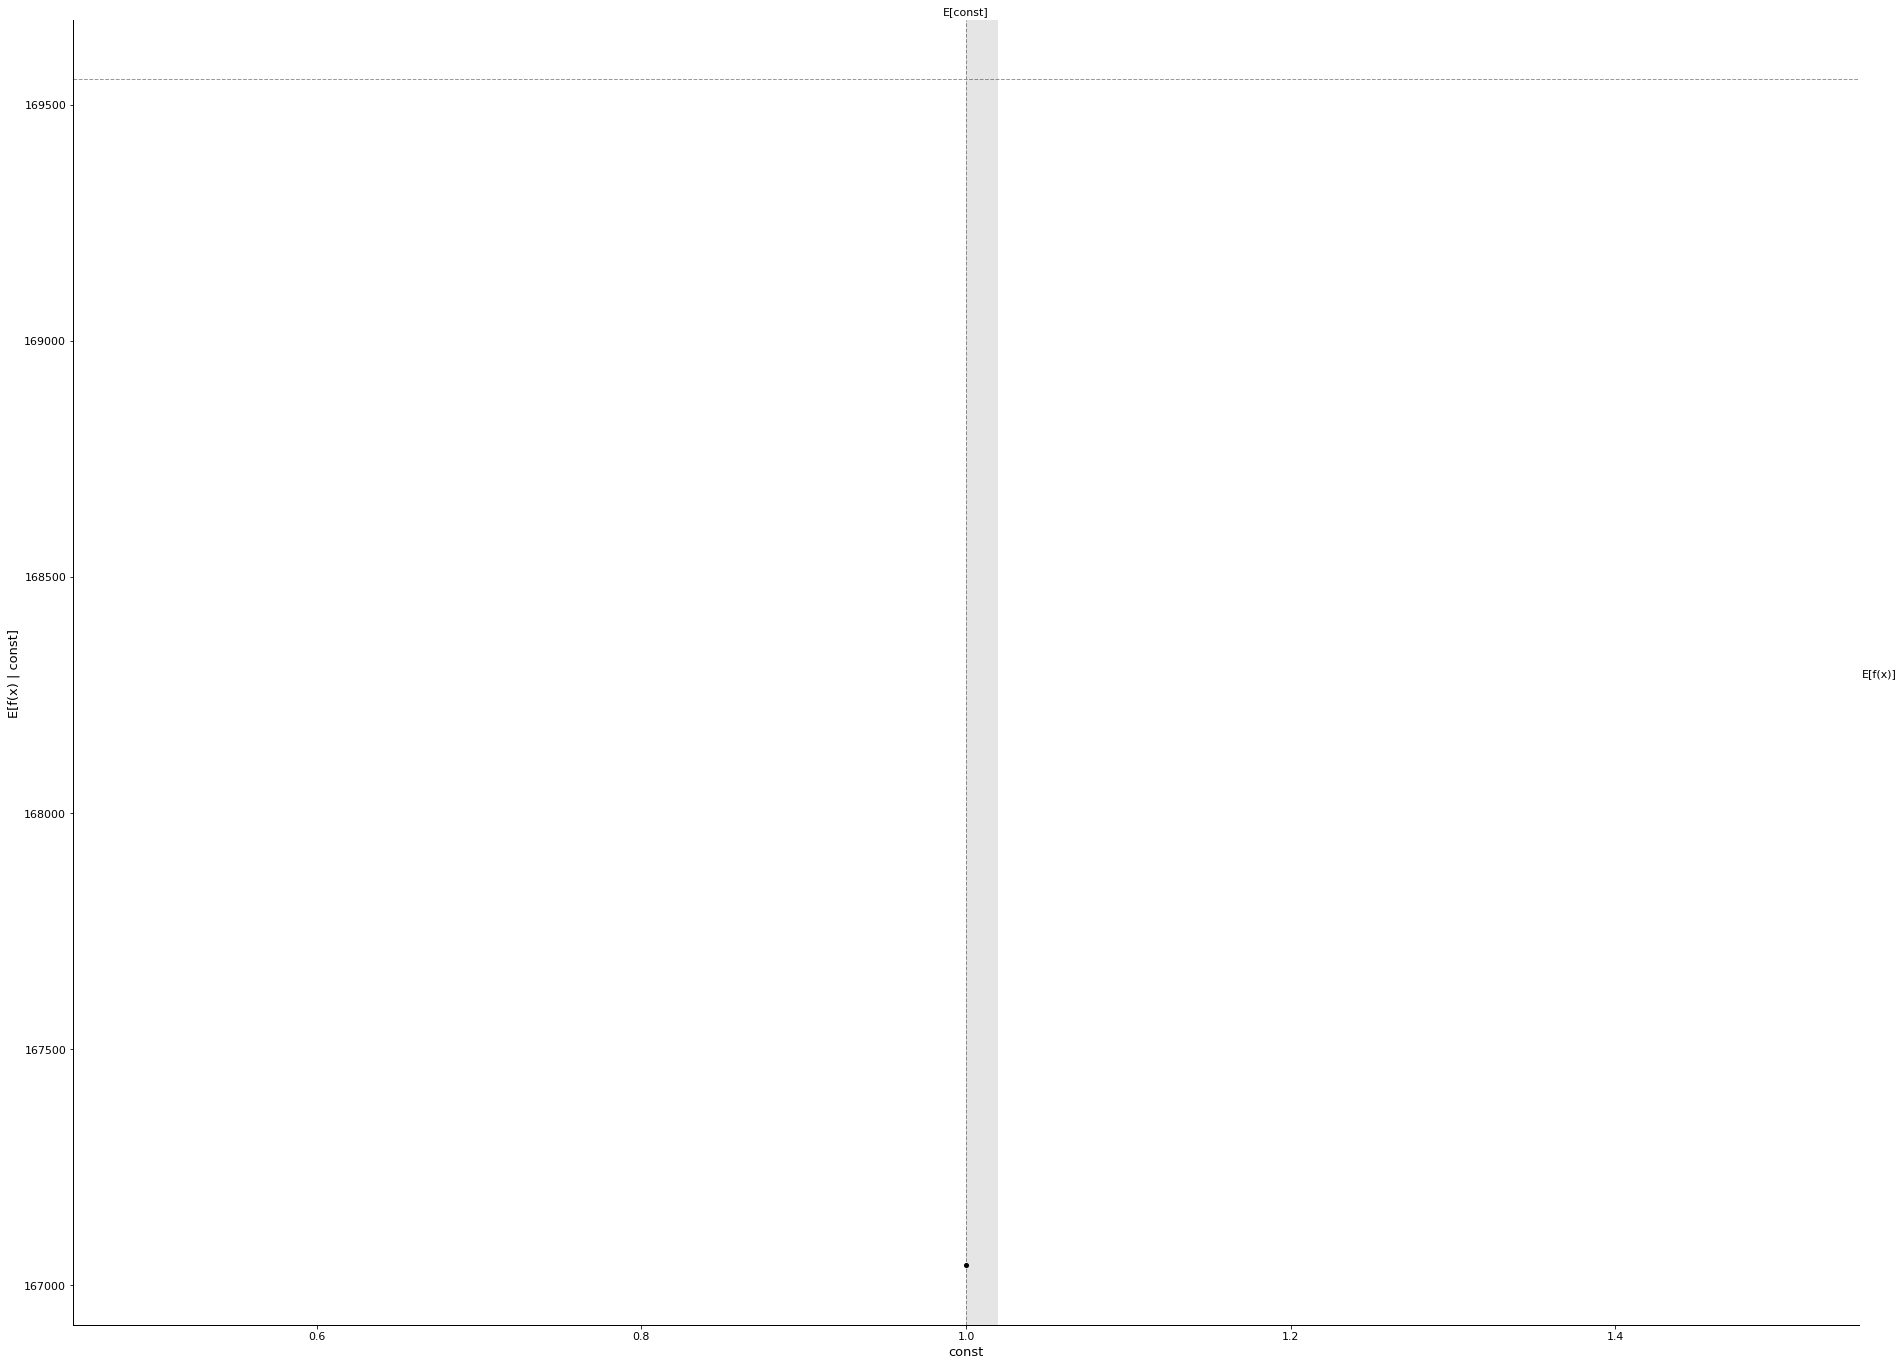

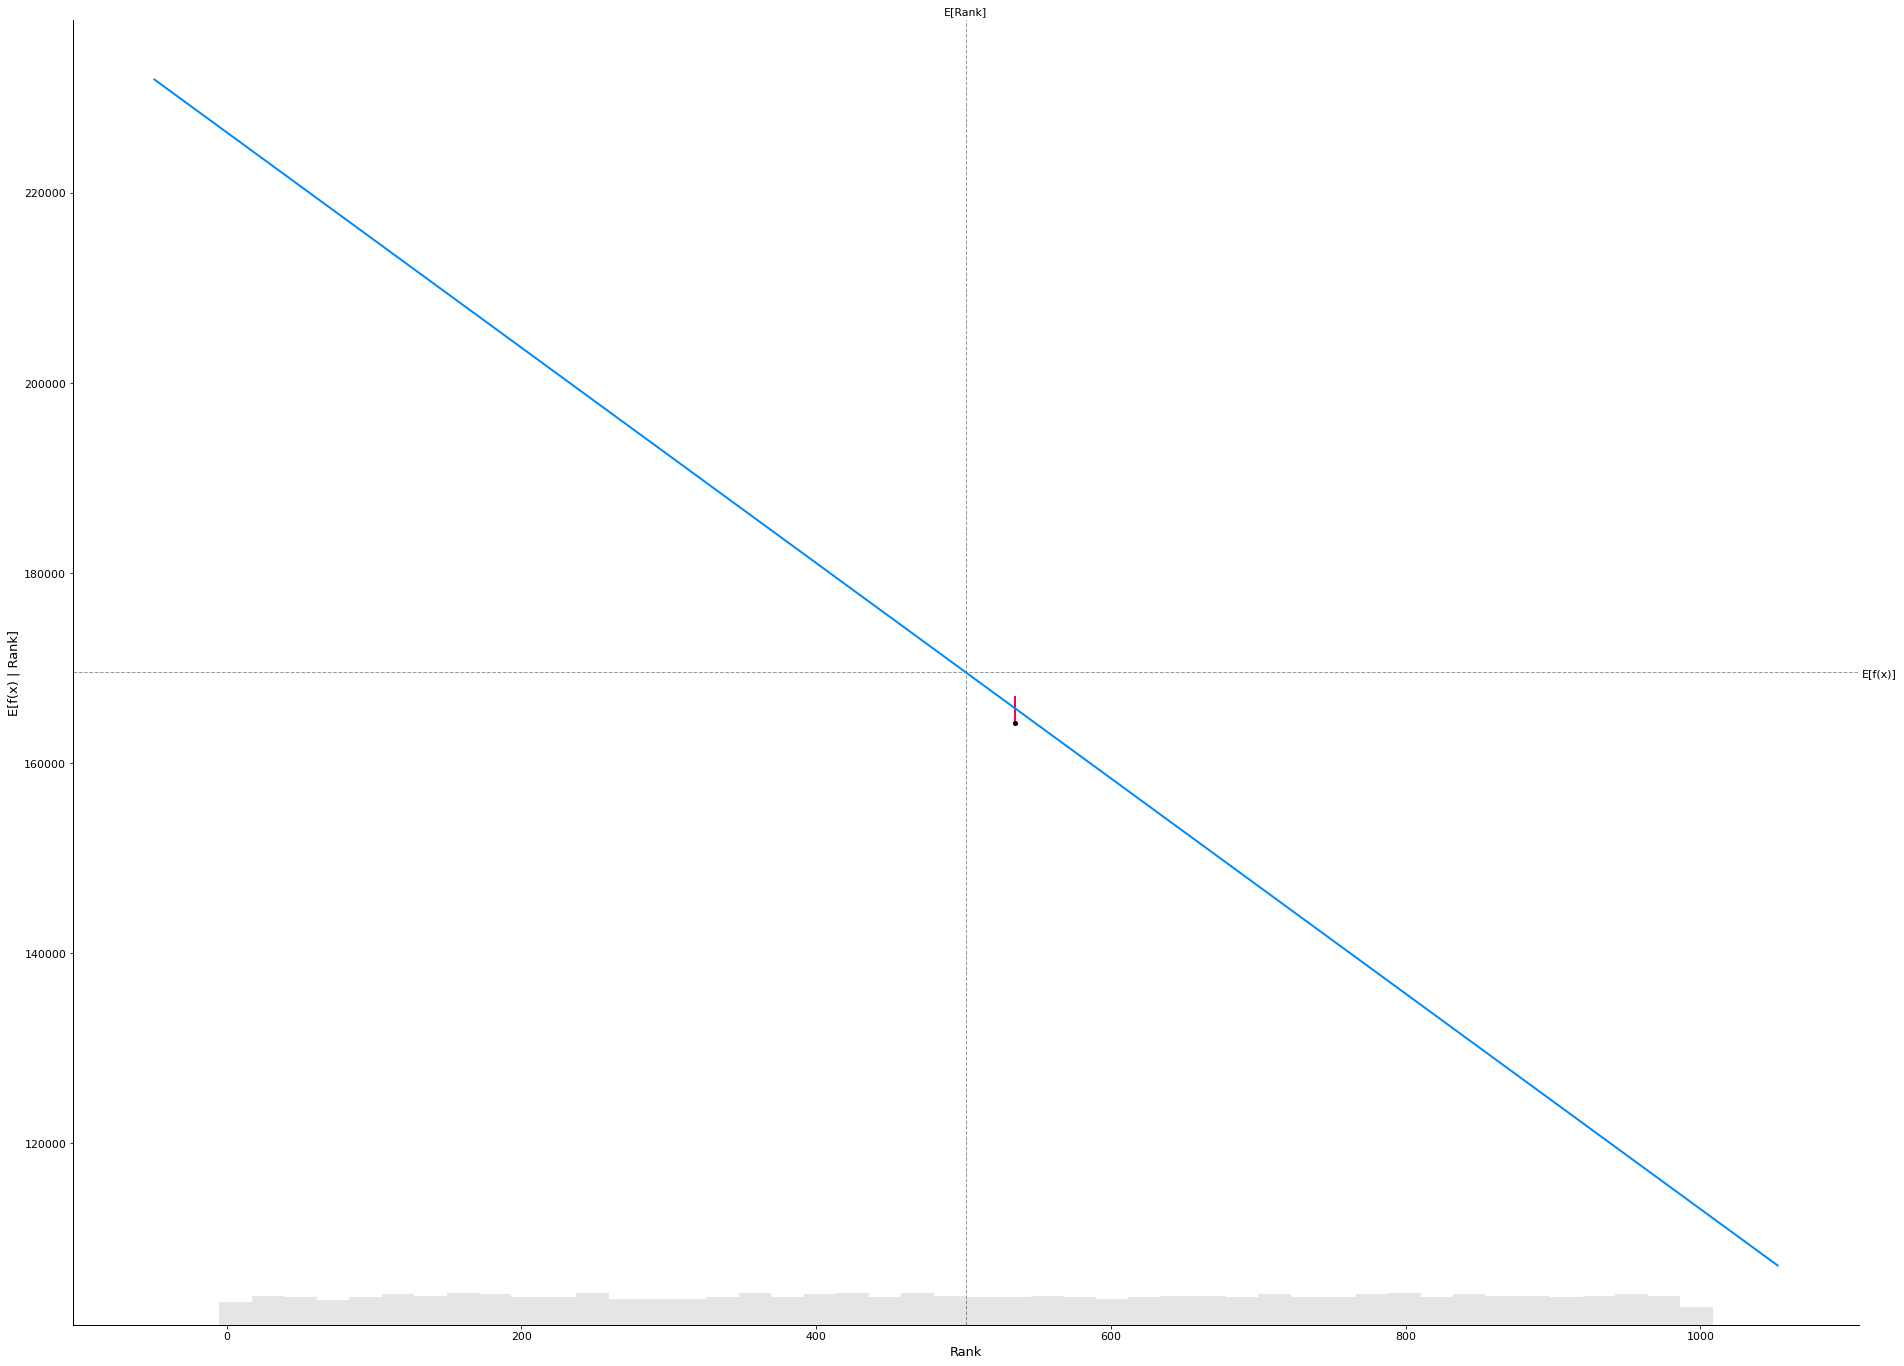

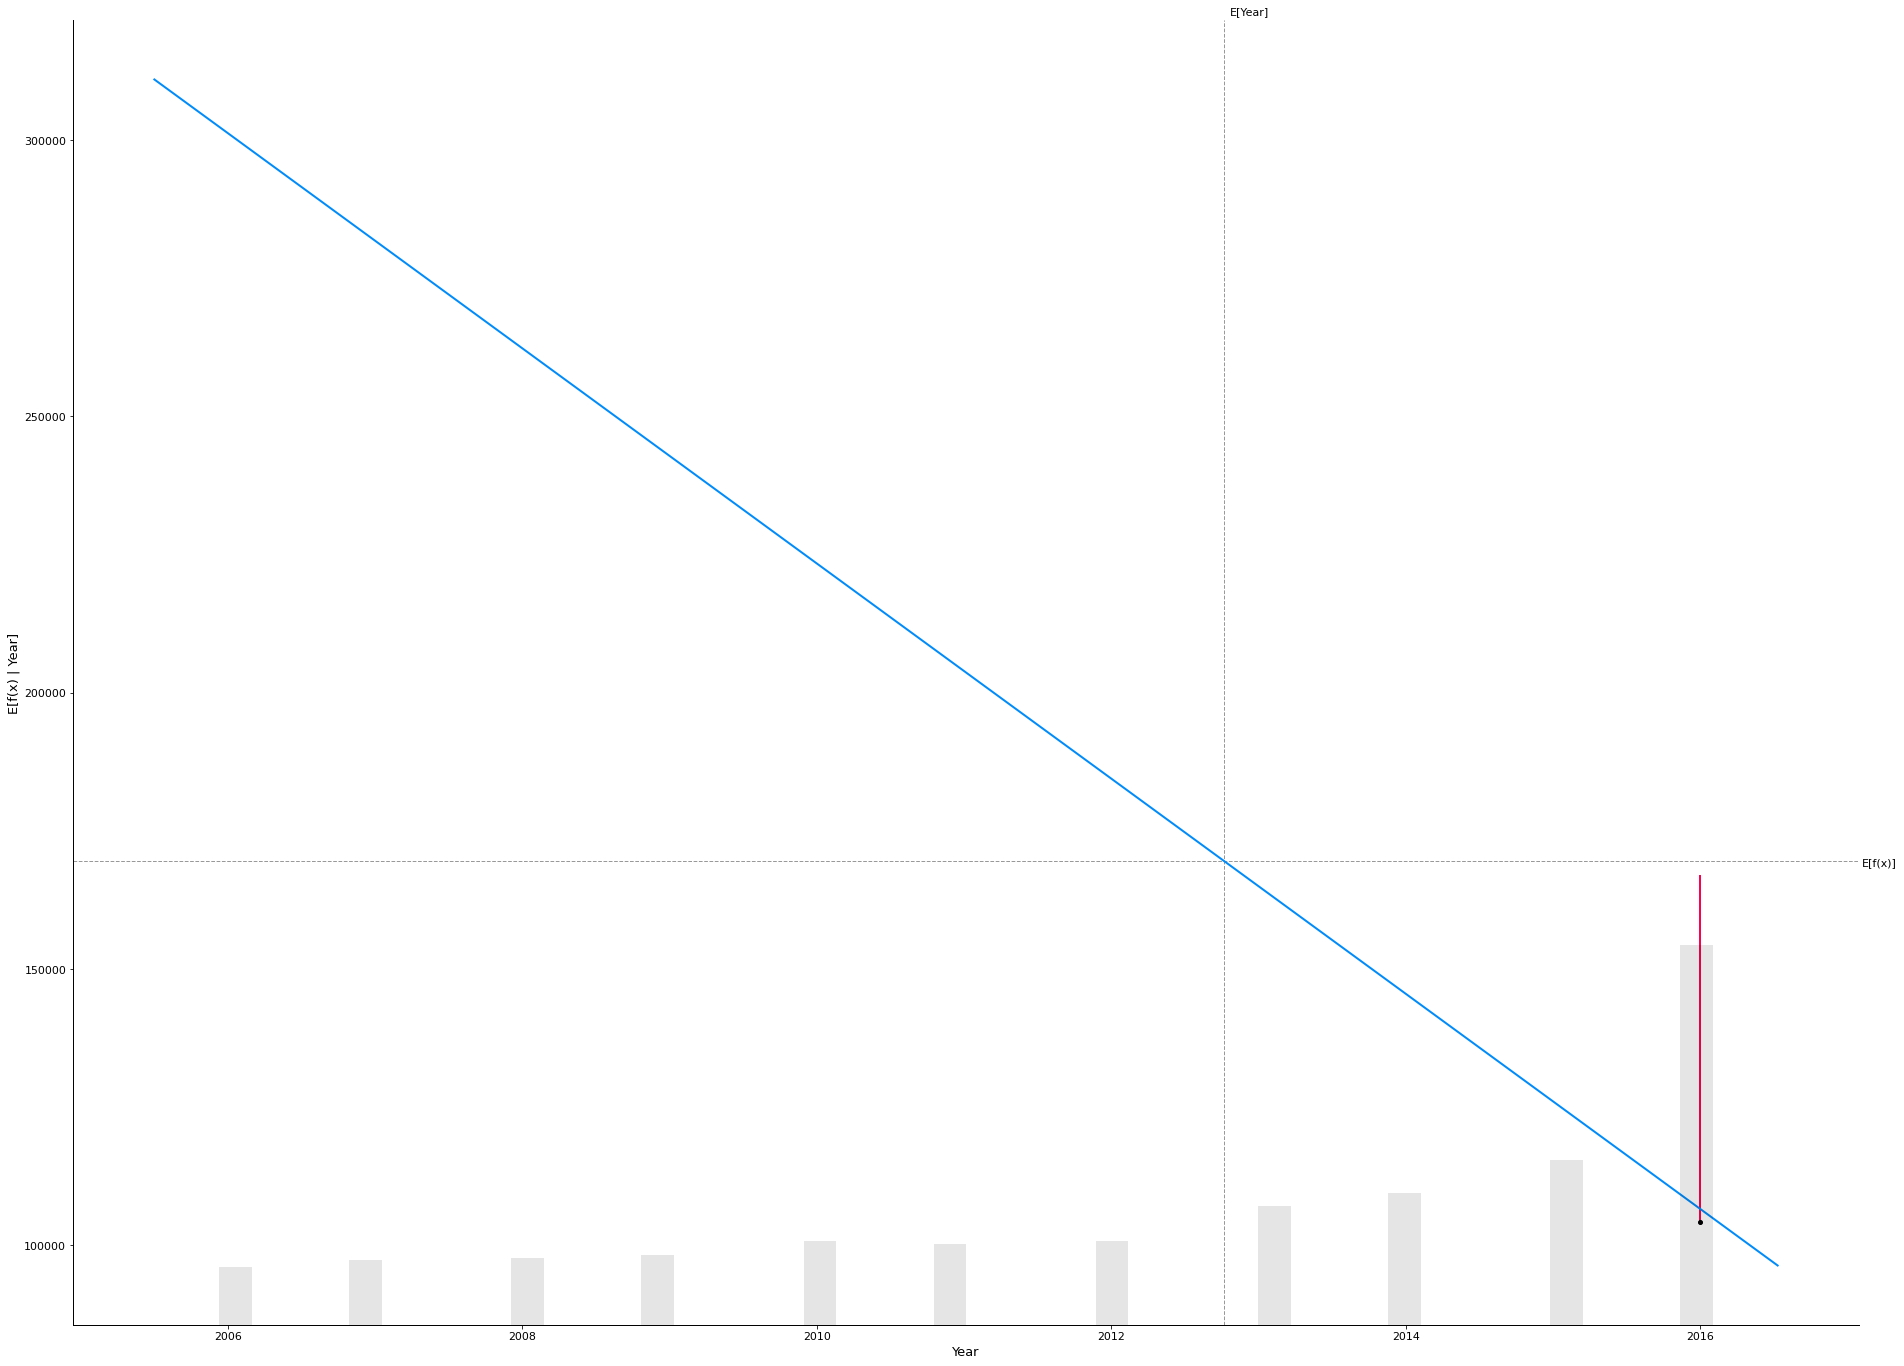

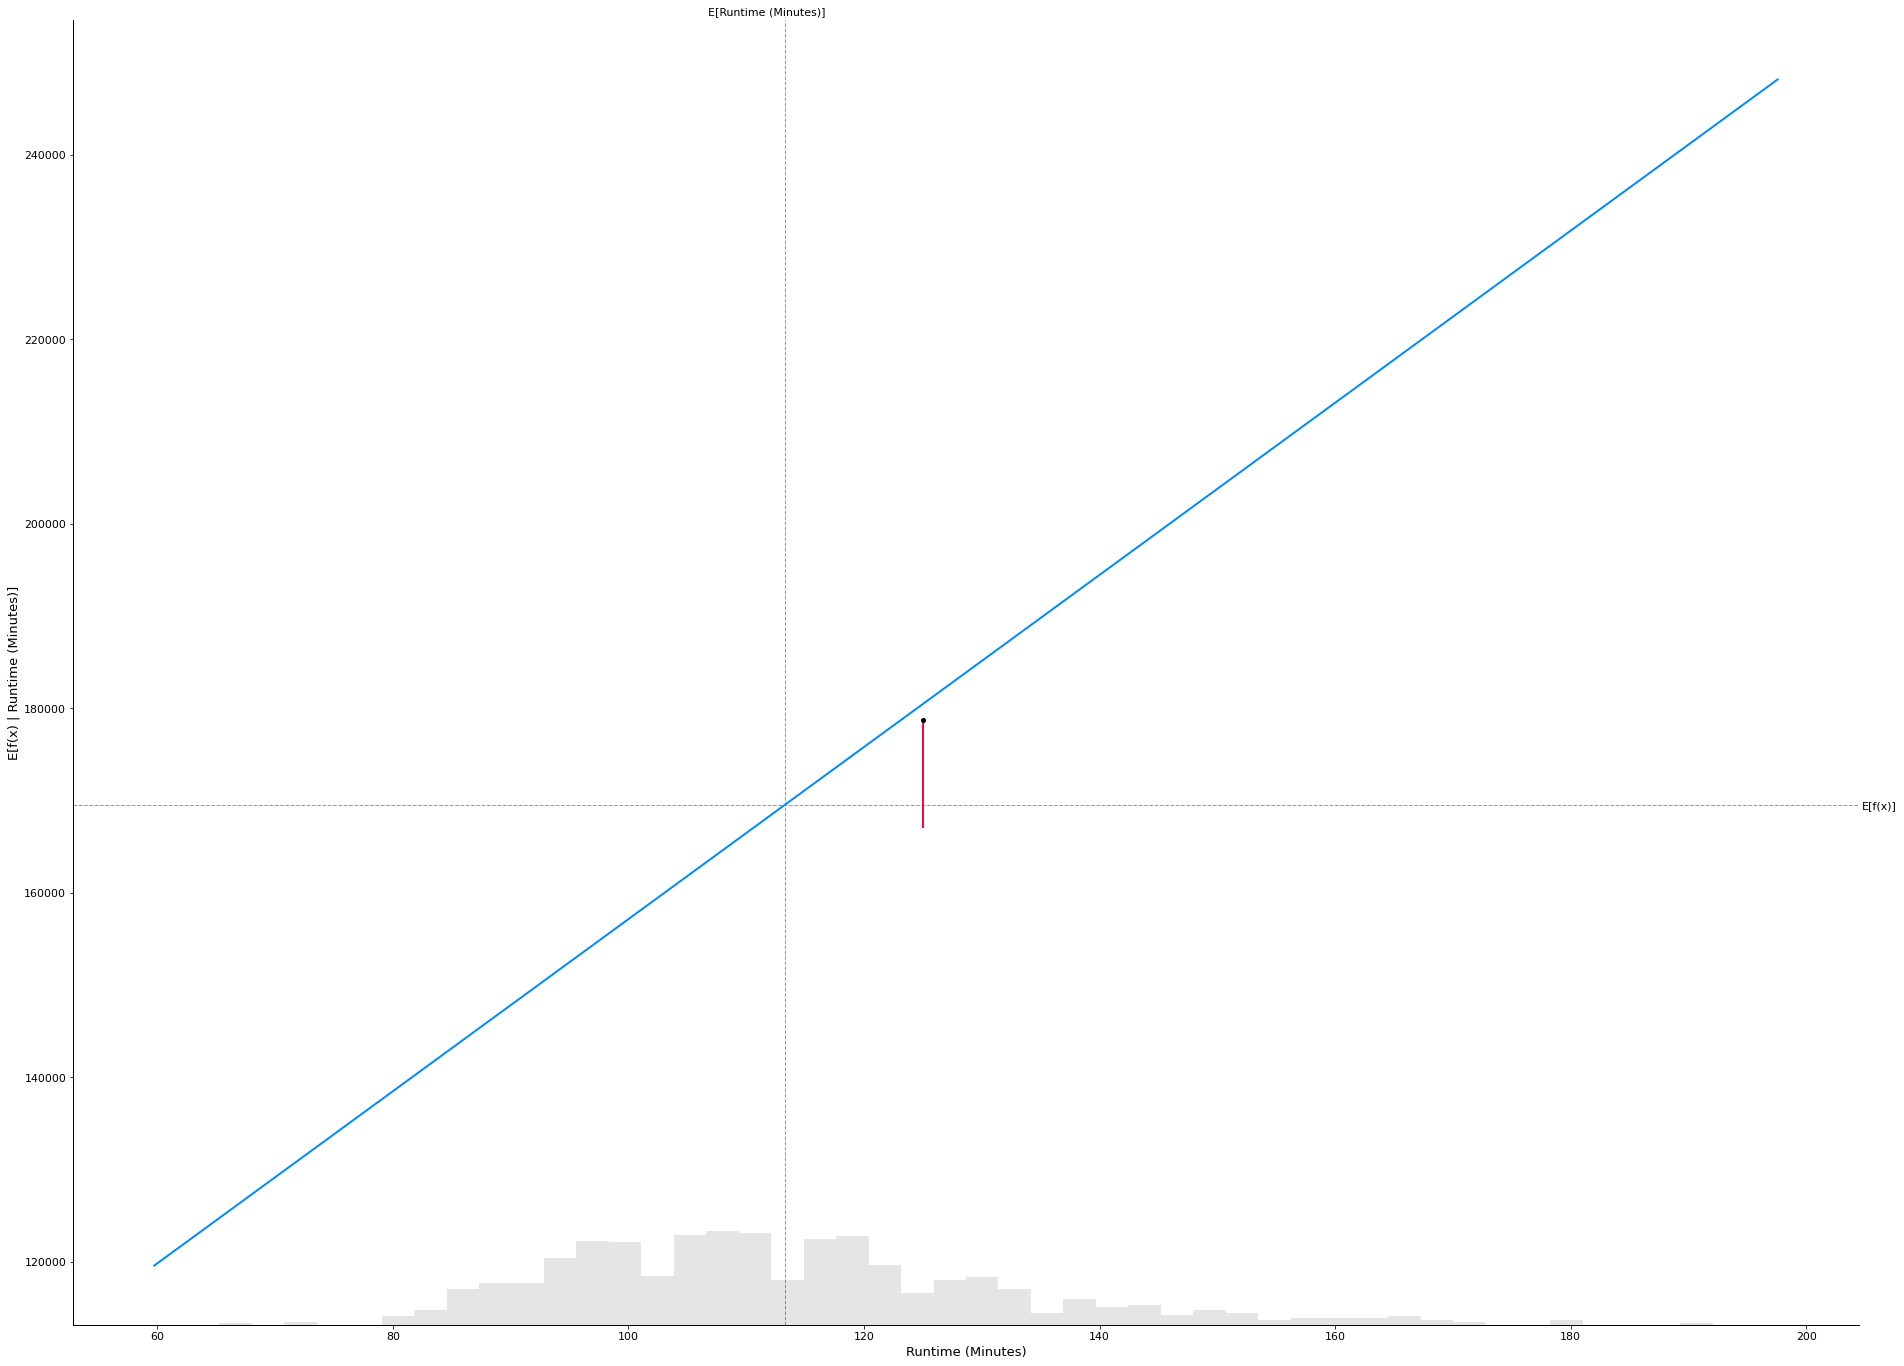

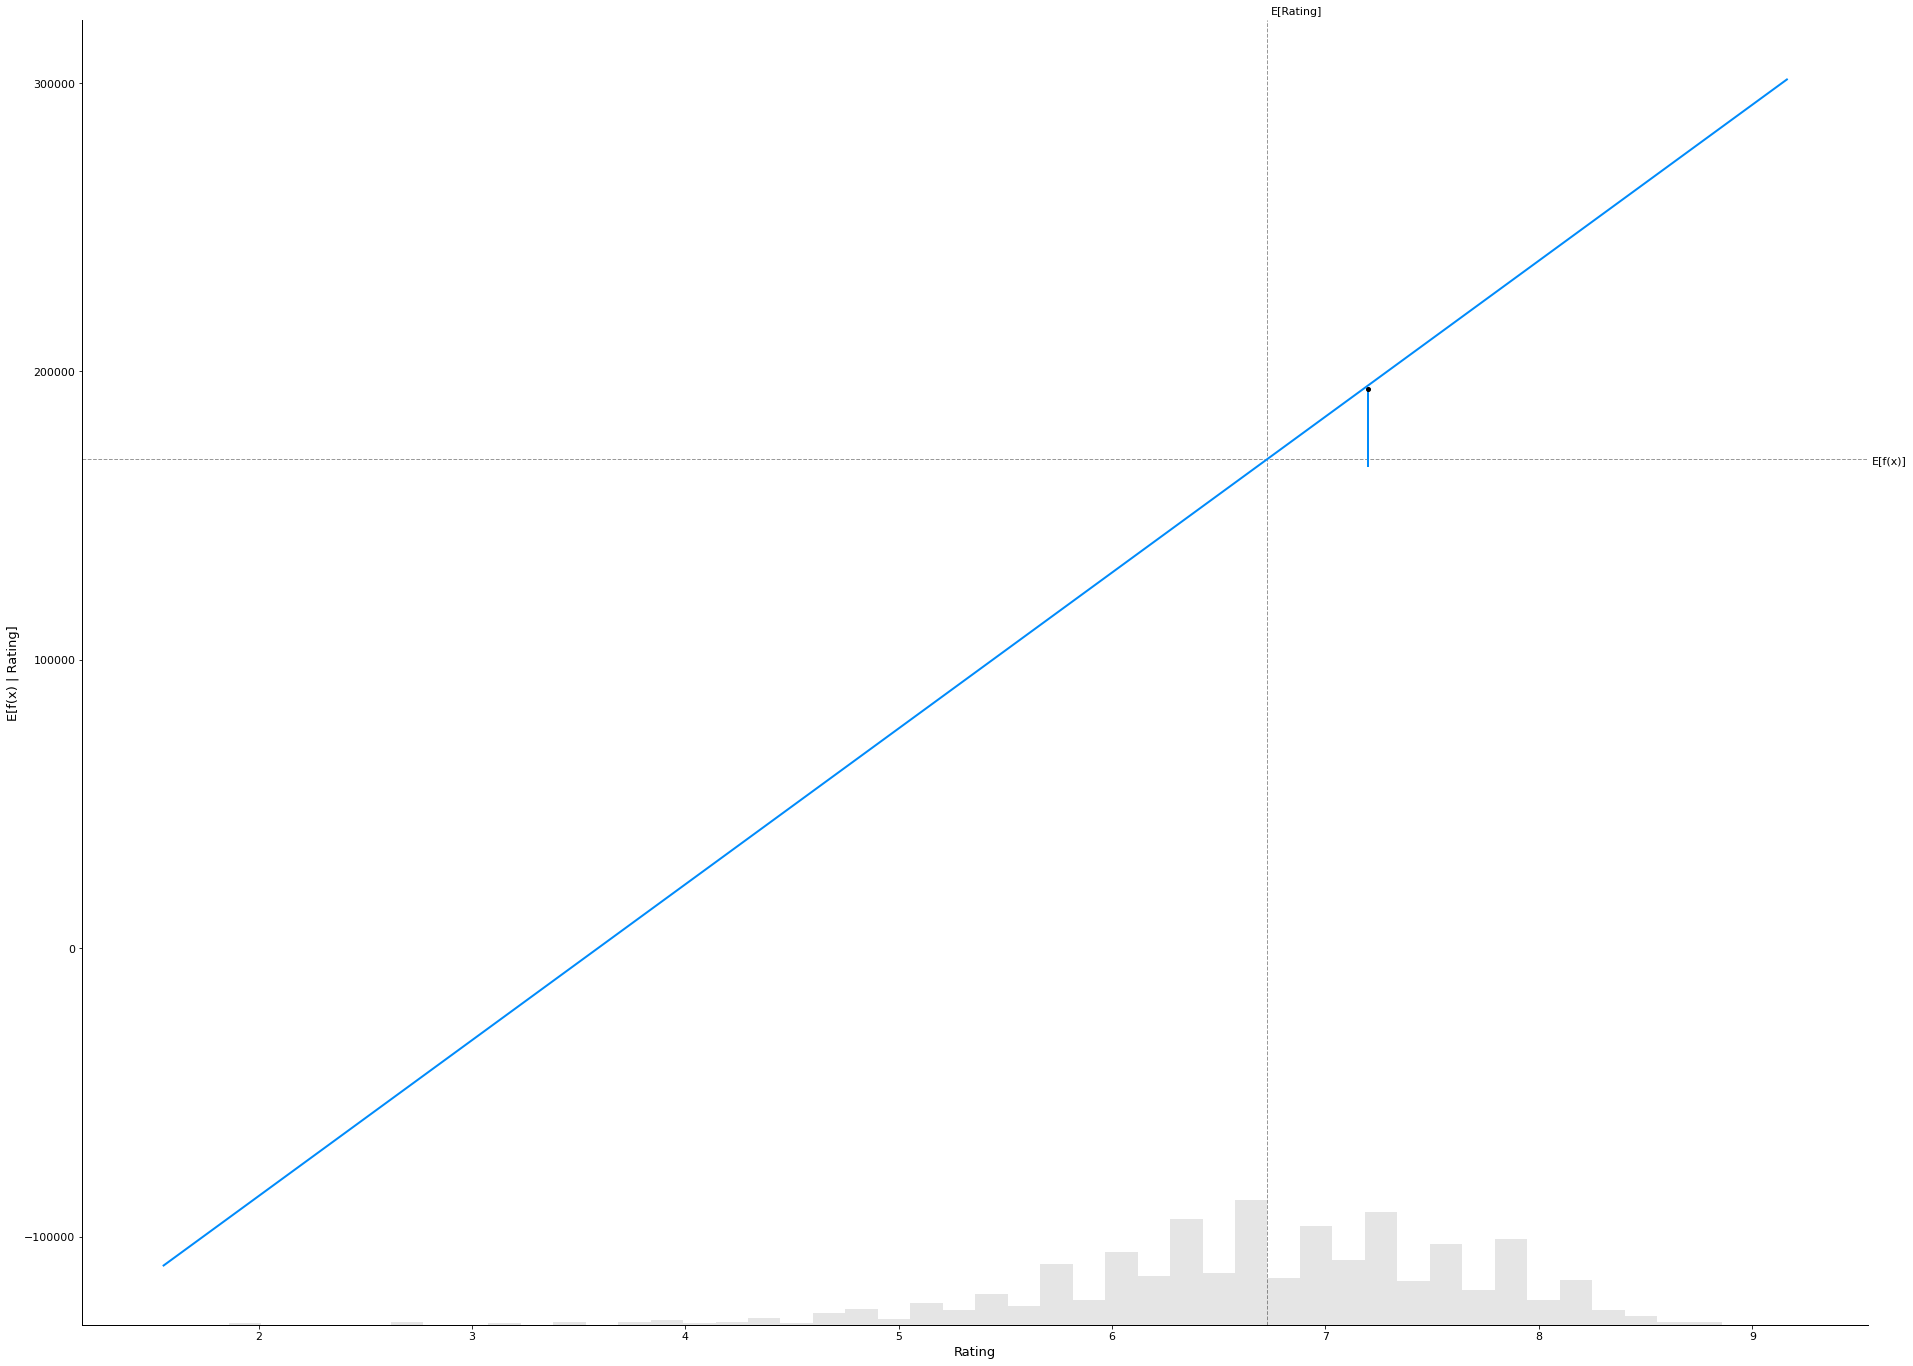

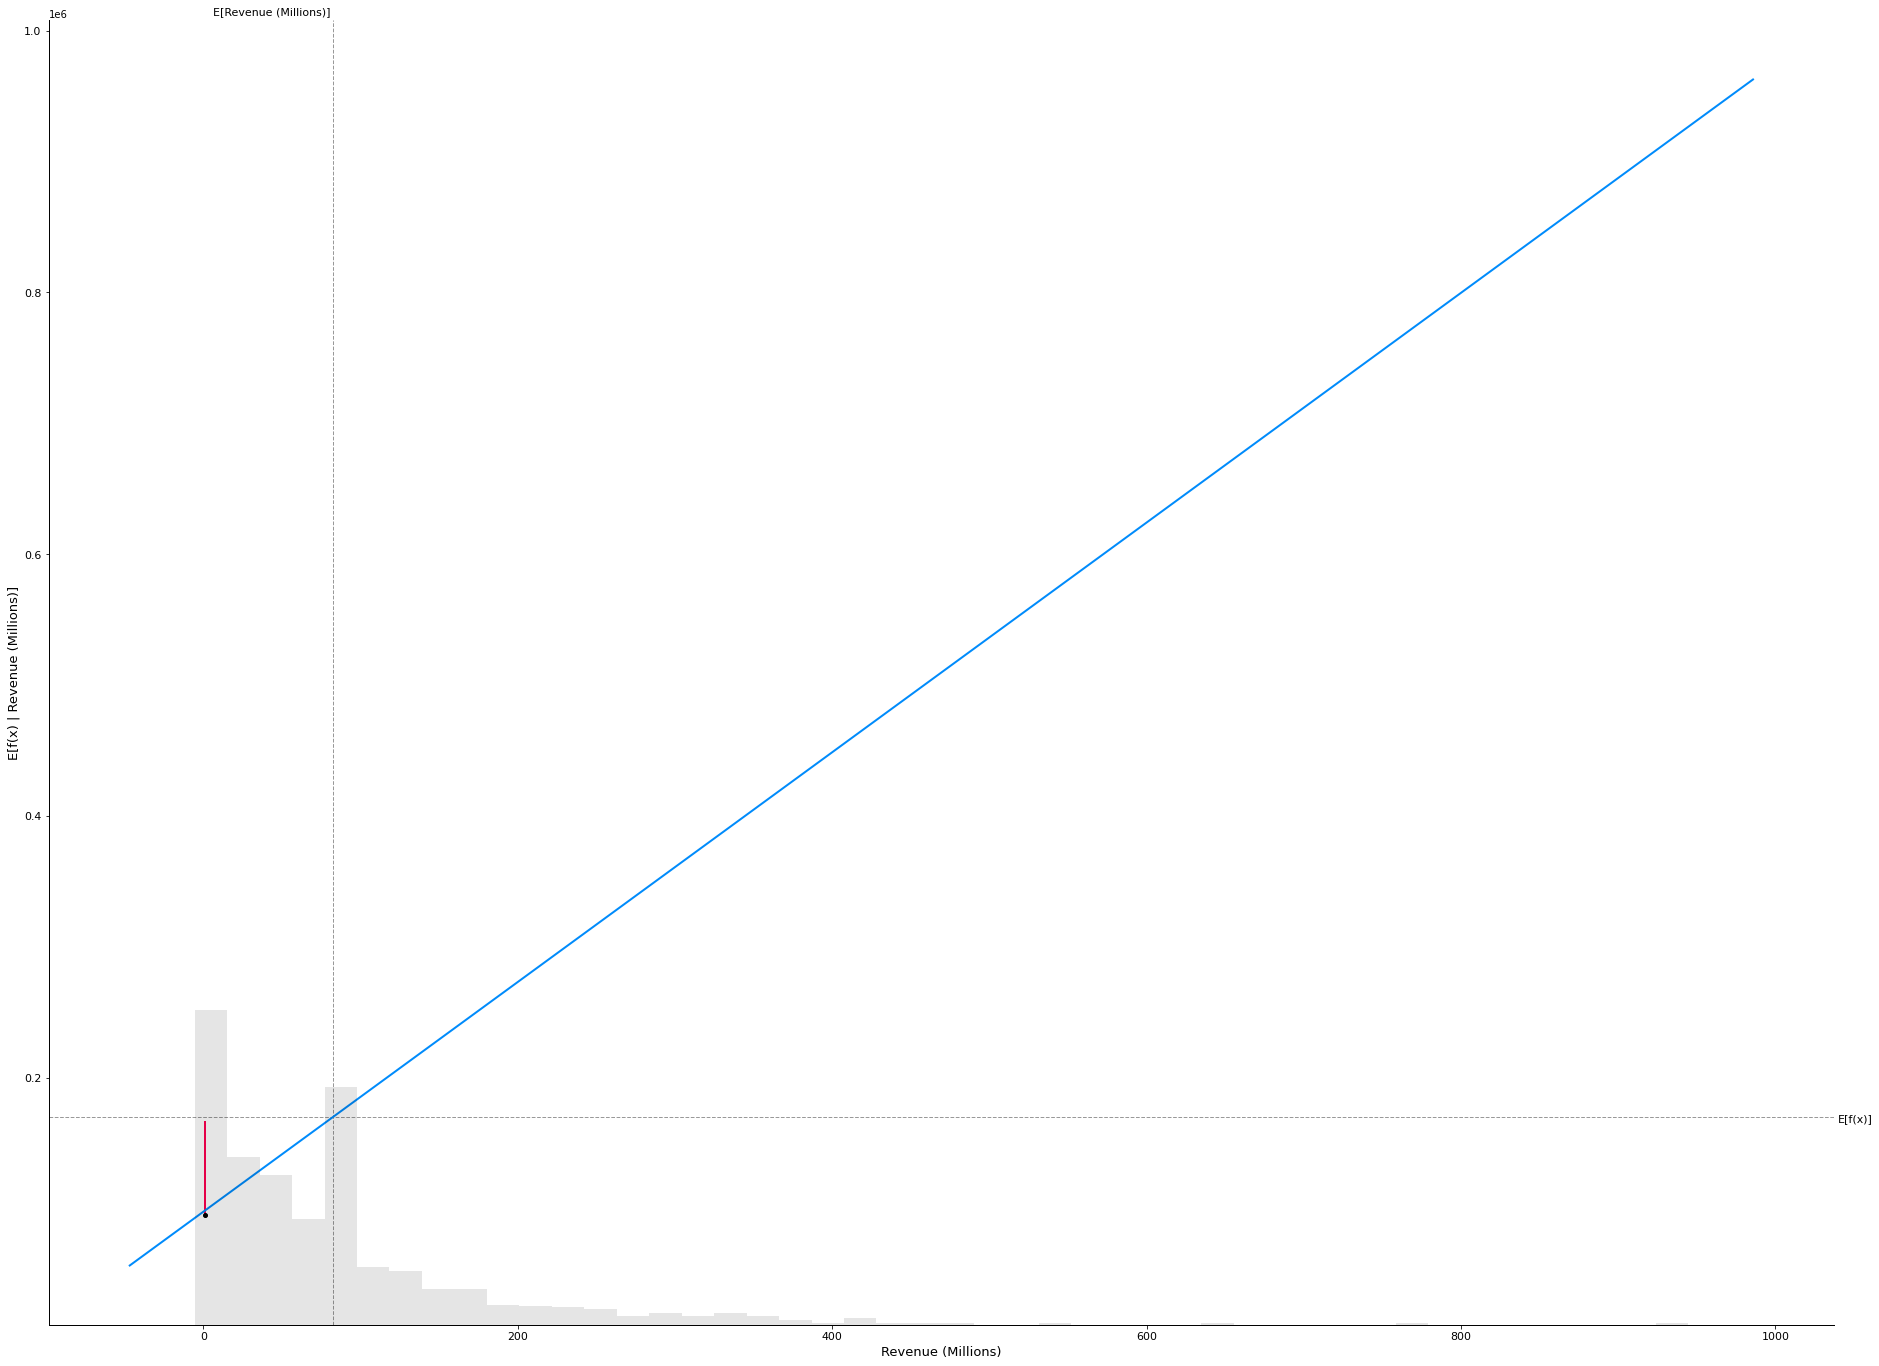

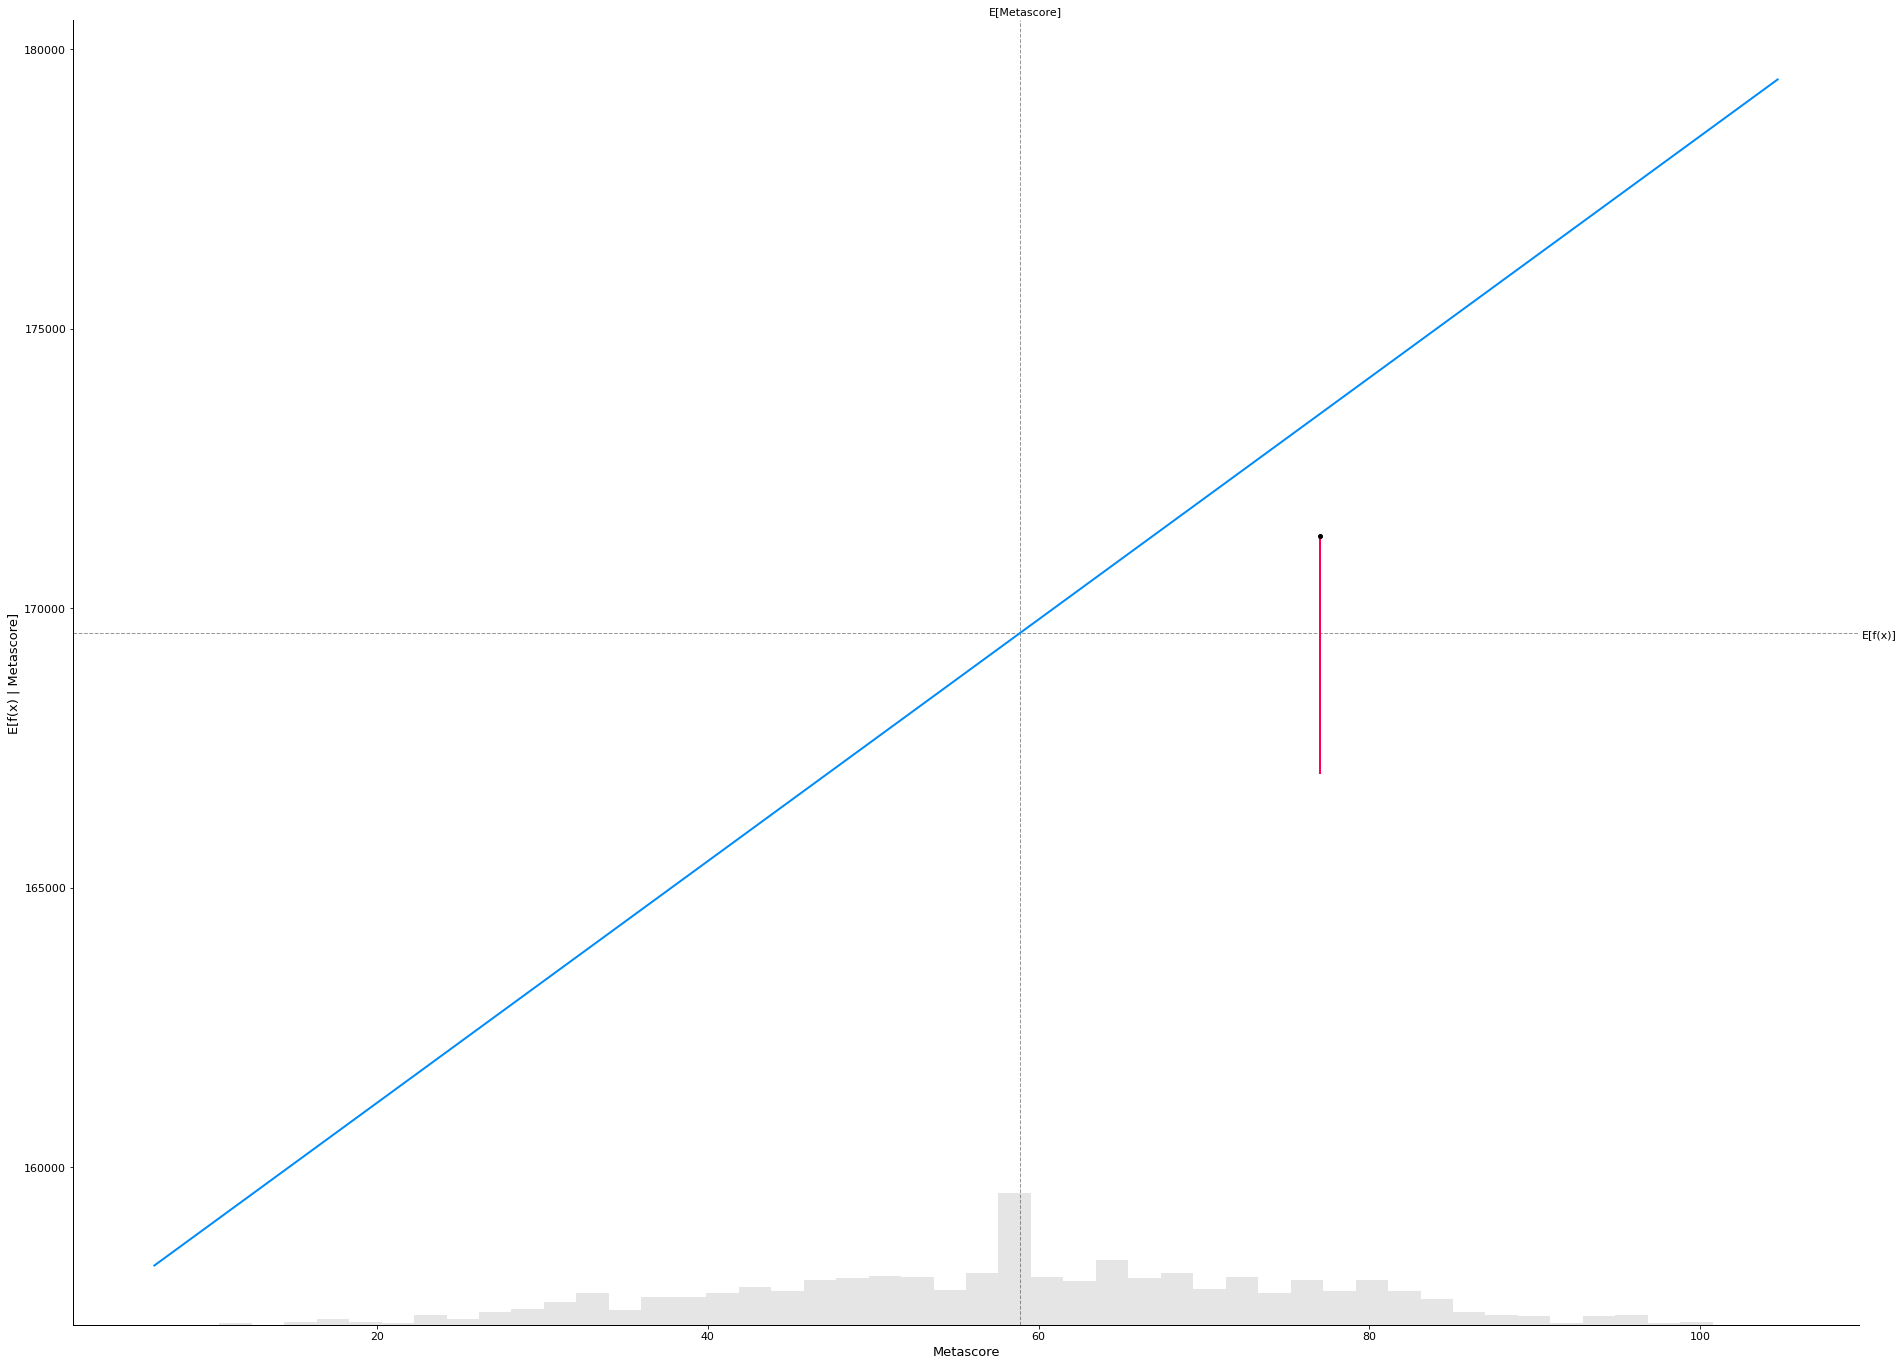

In [35]:
# SHAP explanation of a Linear Model
linear_explainer = shap.Explainer(regr.predict, x_train_1000)
linear_shap_values = linear_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        regr.predict,
        x_train_1000,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


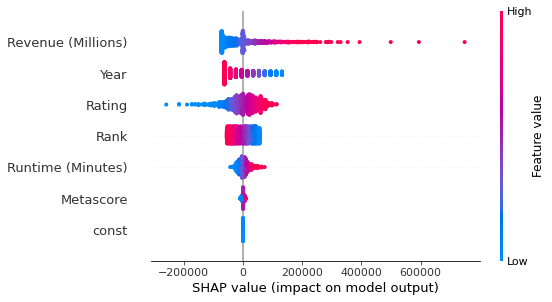

In [36]:
# shap summmary for linear model

shap.summary_plot(linear_shap_values, x_train)

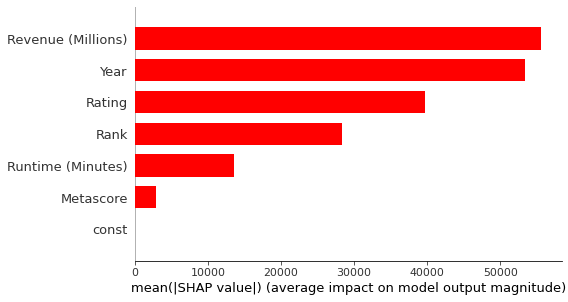

In [223]:
# SHAP variable importance for a Linear Model

shap.summary_plot(linear_shap_values, x_train, plot_type="bar", color="red")


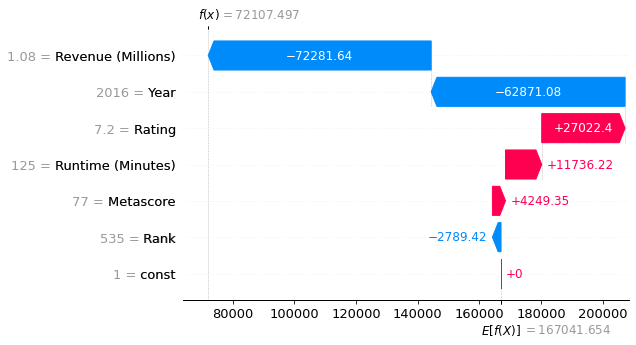

In [222]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

**Interpreting Waterfall SHAP visualization**


Let's consider the same sample (sample_ind = 18)
Notice the value of revenue in the waterfall model is the same as what we have in SHAP partial dependence plot. It says that f(x) = 72107 is what we got as a model output and the expected output for this sample was 72107. We came pretty close to determining it as the difference is only 0.04. The waterfall model explains how we got the expected output, and which features contributed to what. The below graph shows that revenue has the biggest and most positive impact in increasing the votes for this specific sample. Followed by year had a negative impact and it bought the votes down again for this sample, and so on. Using this model we can visually interpret why exactly this specific sample is giving an output of 5.7.


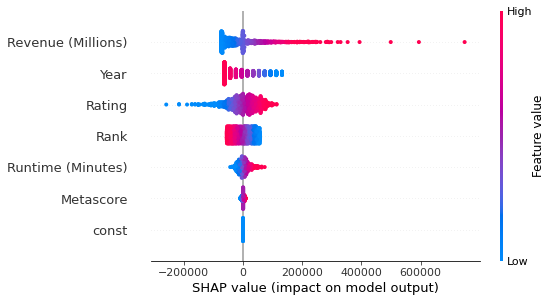

In [227]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, x_train)

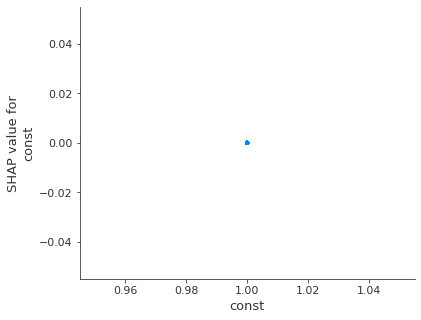

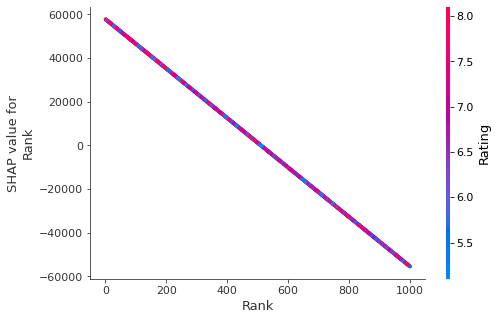

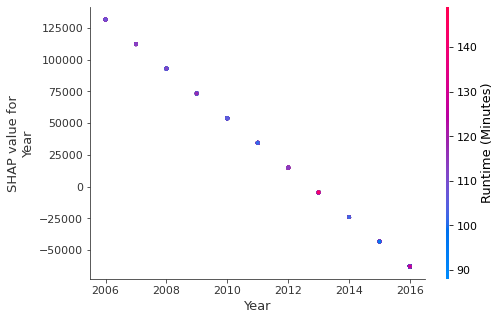

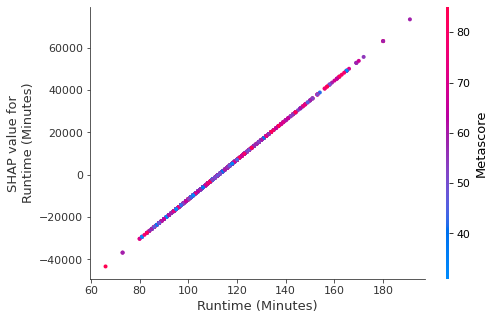

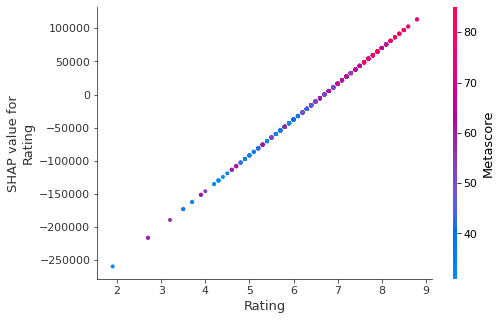

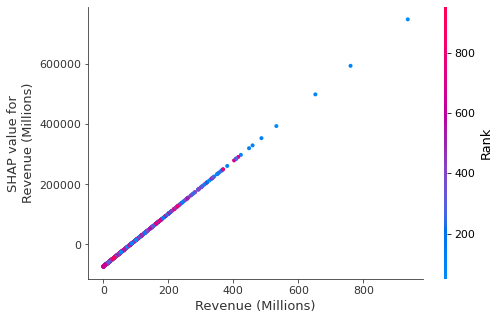

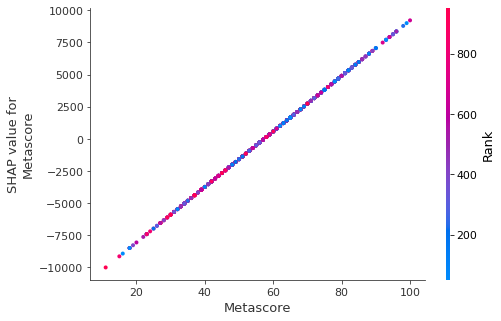

In [228]:
# SHAP partial dependence plot for linear model
for i in x_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, x_train)

**Fitting a tree-based model-**

**Random Forest**

In [37]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

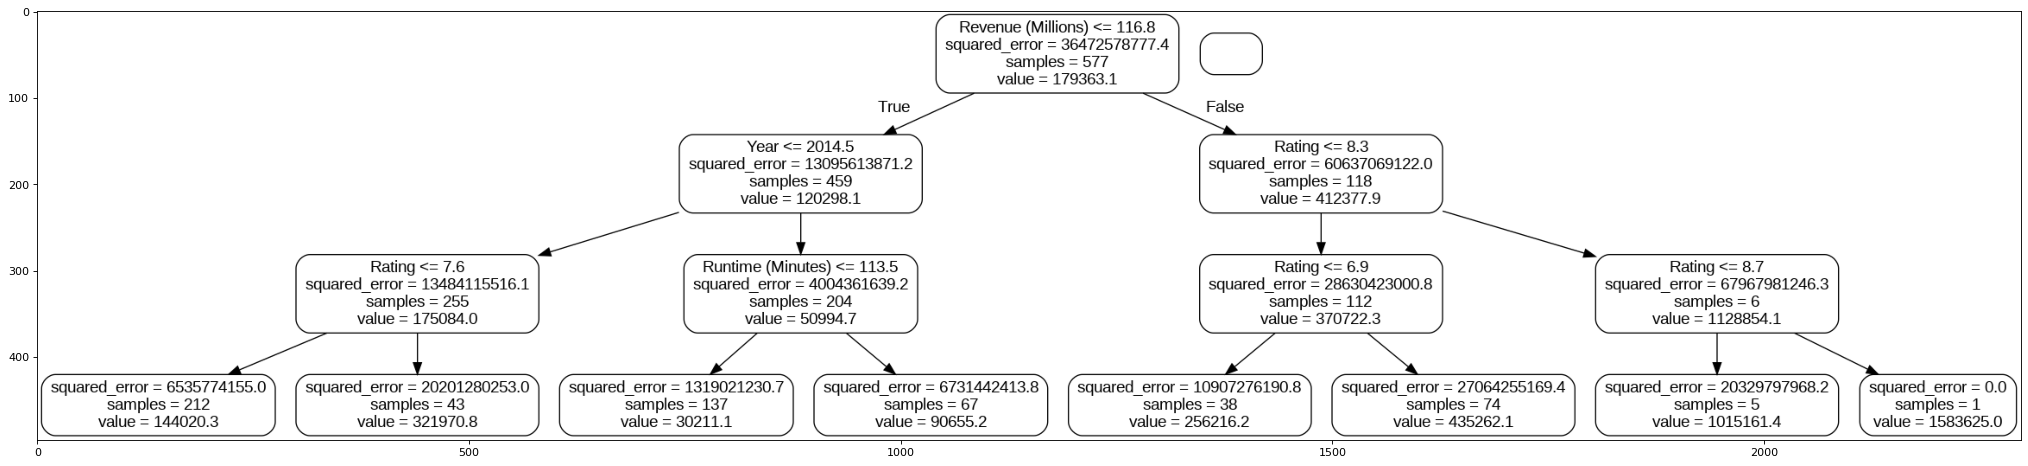

In [38]:
# Visualization of Nodes for the purpose of explainability
figure(figsize=(32, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()
     

**Interpreting Nodes of a Tree-Based Model**

Random Forest Regressor works on the concept of the wisdom of the crowd. The above decision tree is one of the many trees involved in predicting the target variable. Each decision tree regression predicts a number as an output for a given input. Random forest regression takes the average of those predictions as its final output.

As usual, the tree has conditions on each internal node and a value associated with each leaf (i.e. the value to be predicted). But additionally, we’ve plotted out the value at each internal node i.e. the mean of the response variables in that region.

Leaf1:Rating

Leaf2:Rating

Leaf3:Runtime (Minutes)

Leaf4:Runtime (Minutes)

Leaf5:Rating

Leaf6:Rating

Leaf7:Rating

Leaf8:Rating

In [39]:
# Get numerical feature importances
tree_importances = list(tree_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
     

In [40]:
# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: Revenue (Millions)   Importance: 0.53
Variable: Rating               Importance: 0.29
Variable: Year                 Importance: 0.13
Variable: Rank                 Importance: 0.03
Variable: Runtime (Minutes)    Importance: 0.02
Variable: const                Importance: 0.0
Variable: Metascore            Importance: 0.0


In [41]:
shap.initjs()


Attempting to set identical low and high xlims makes transformation singular; automatically expanding.


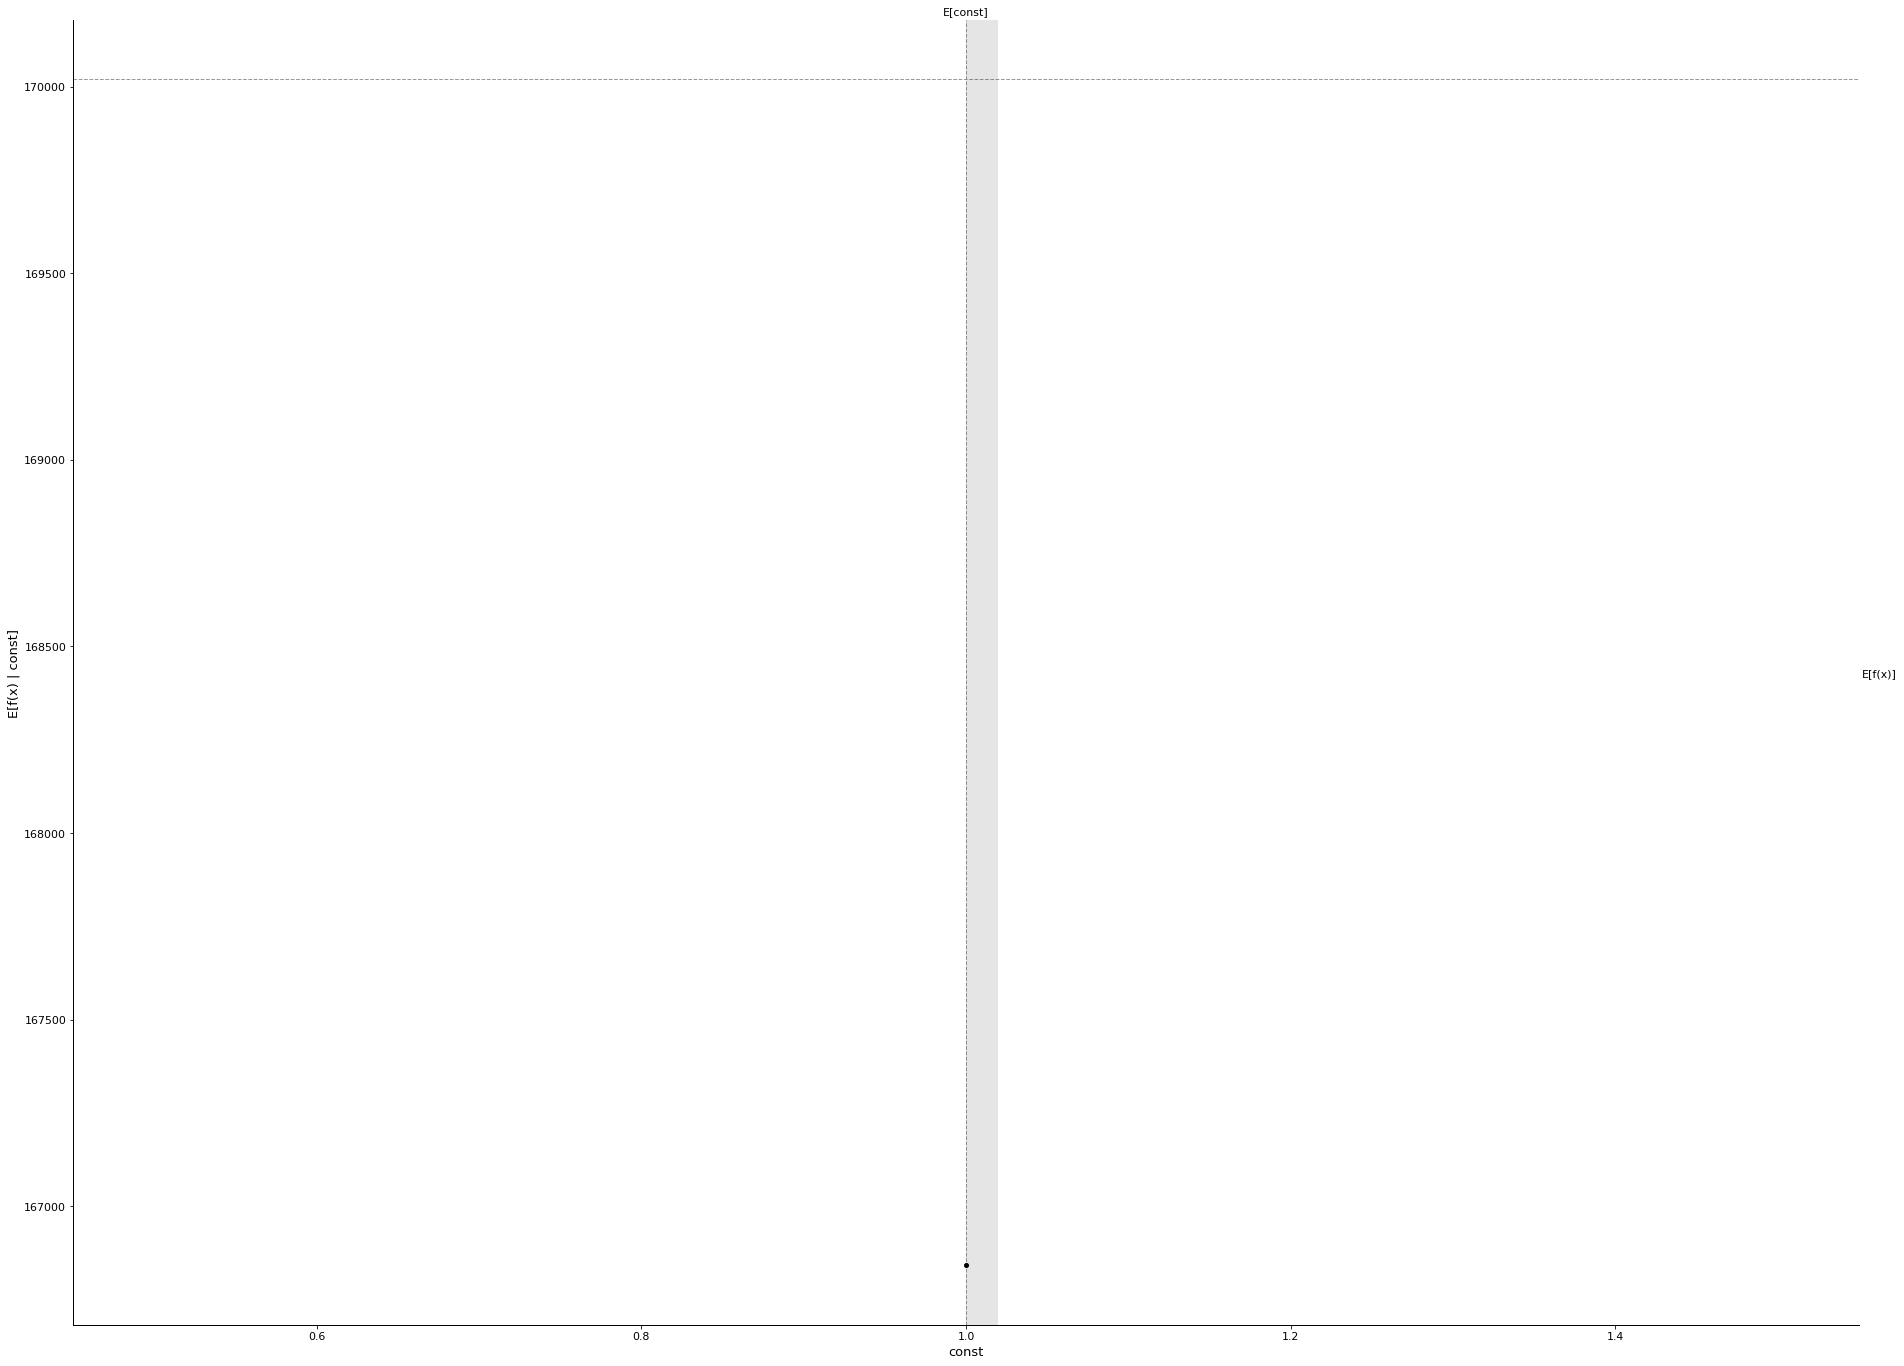

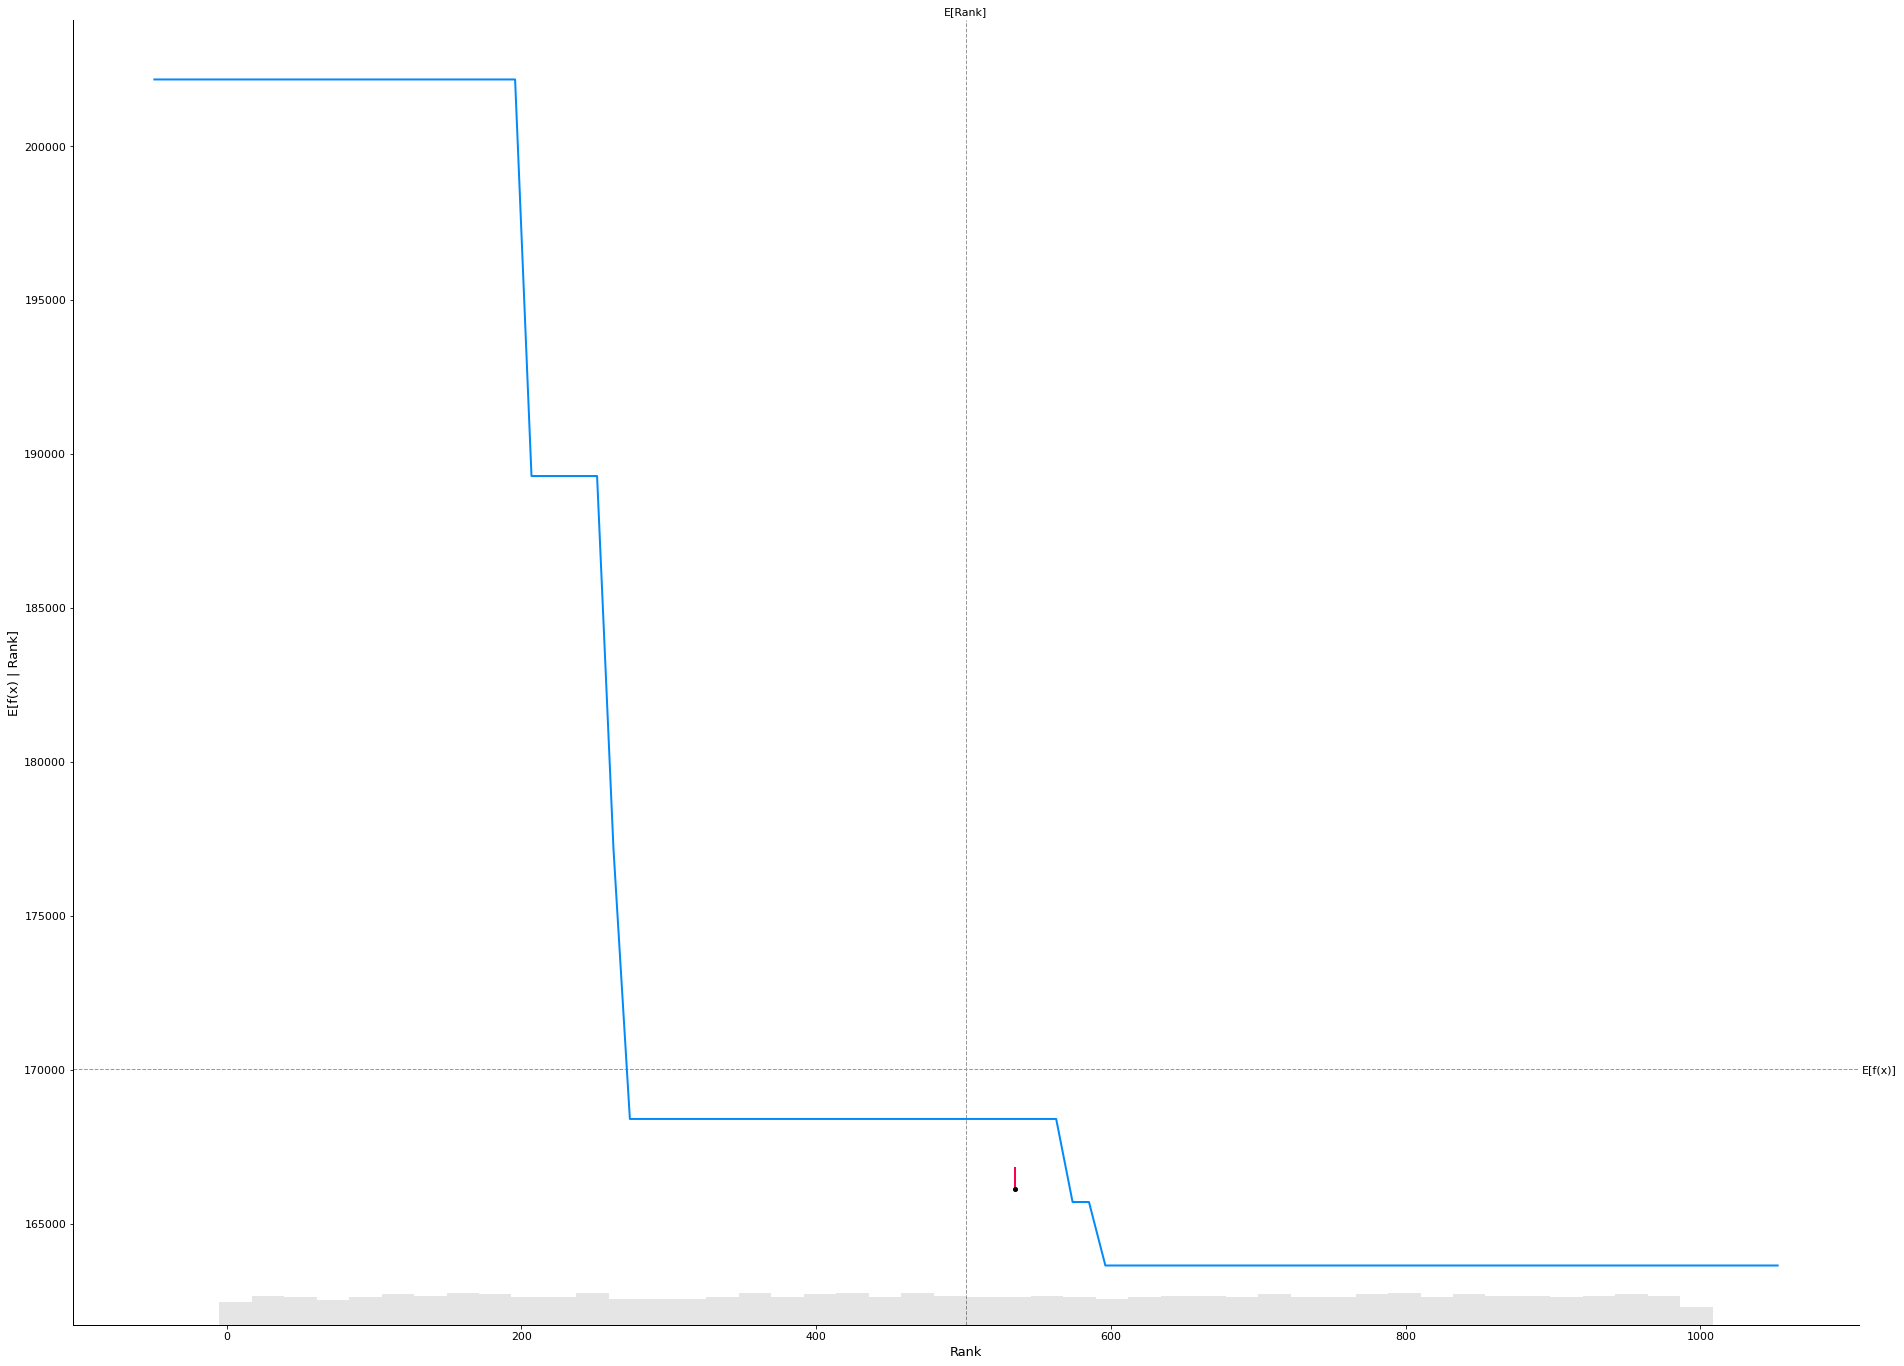

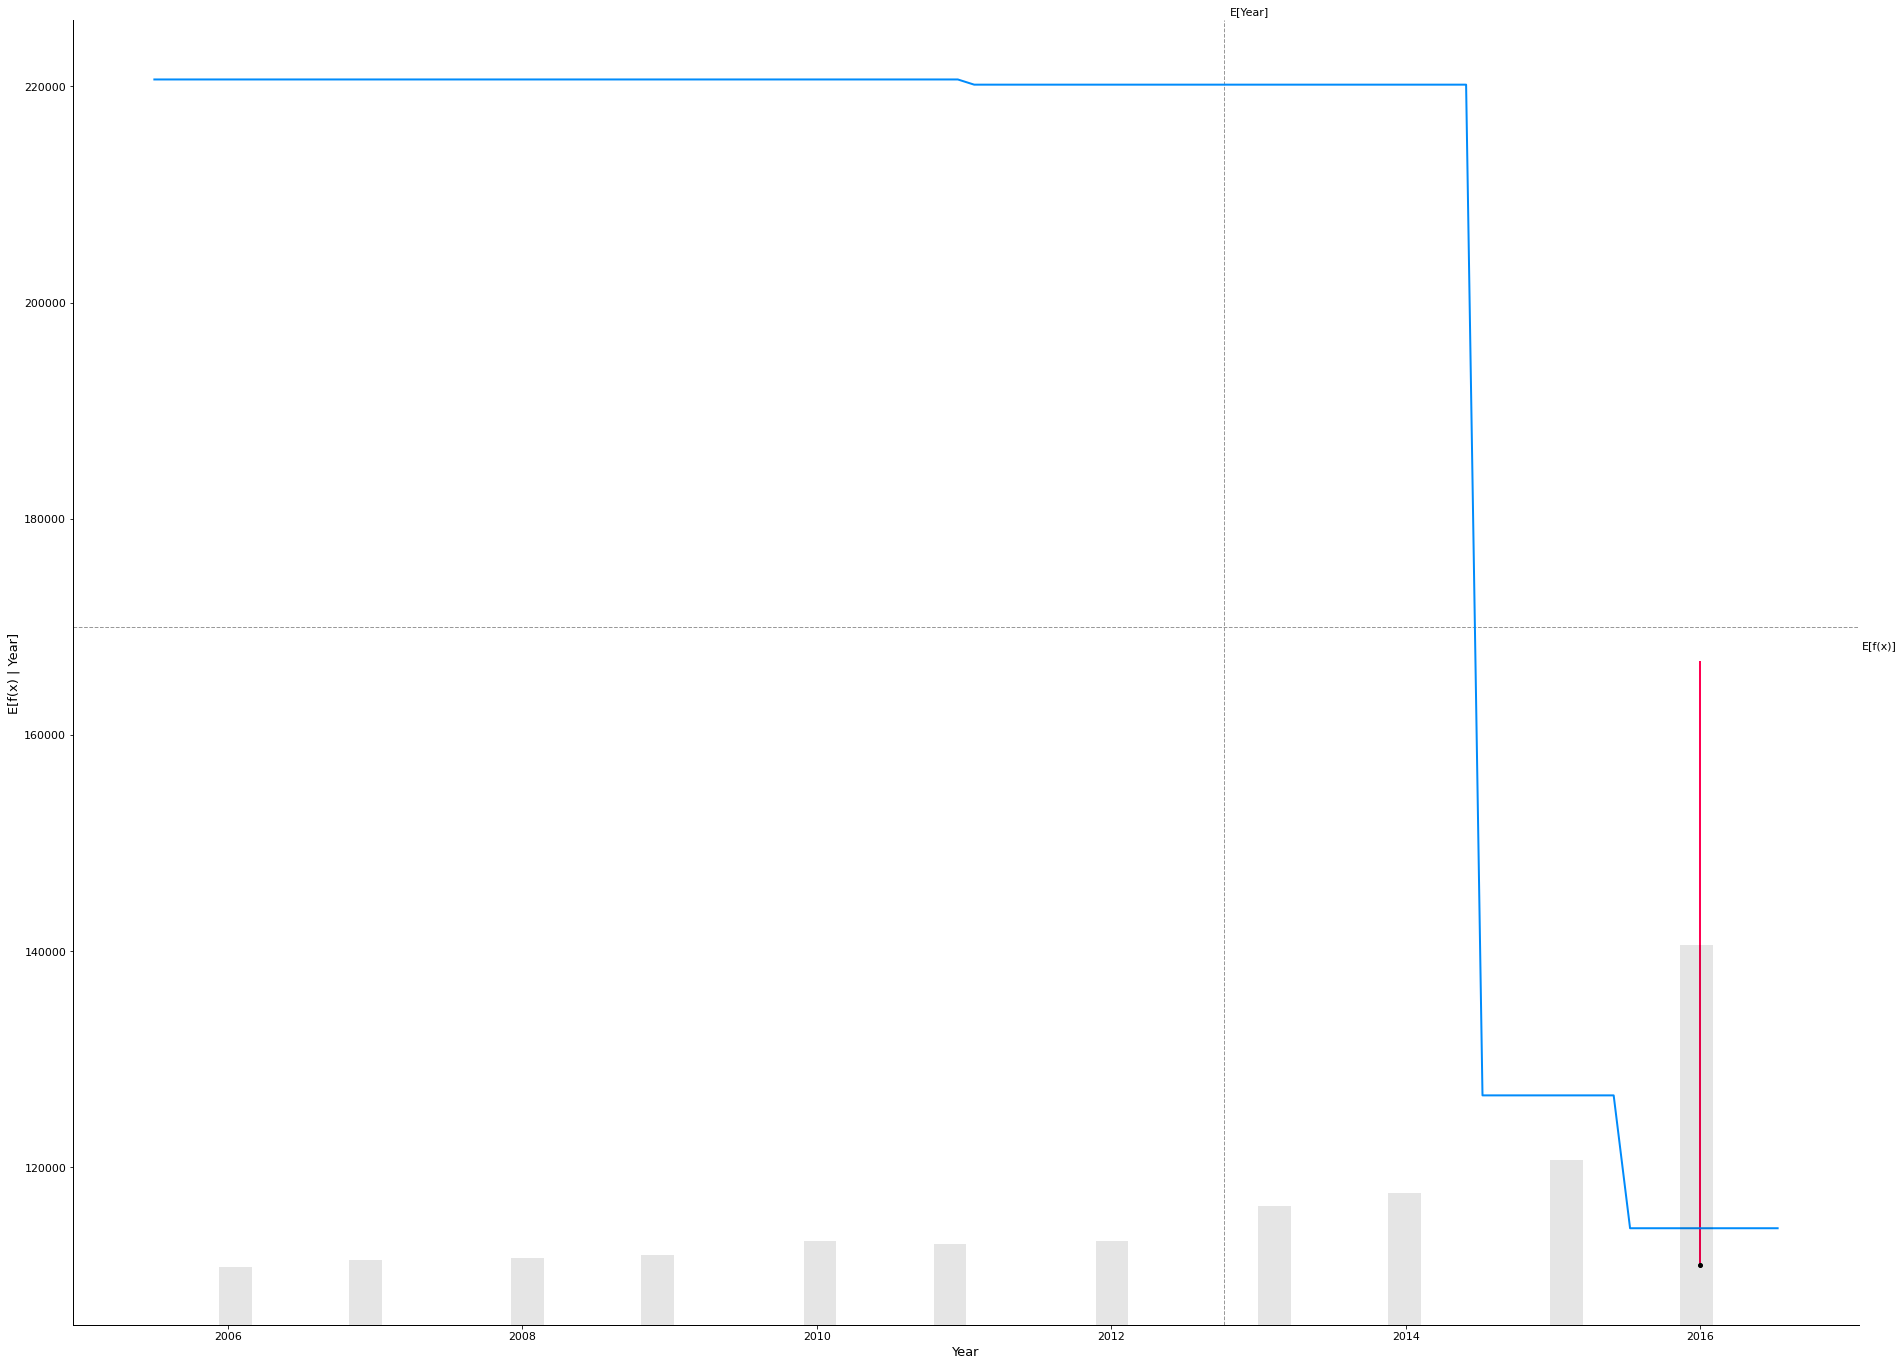

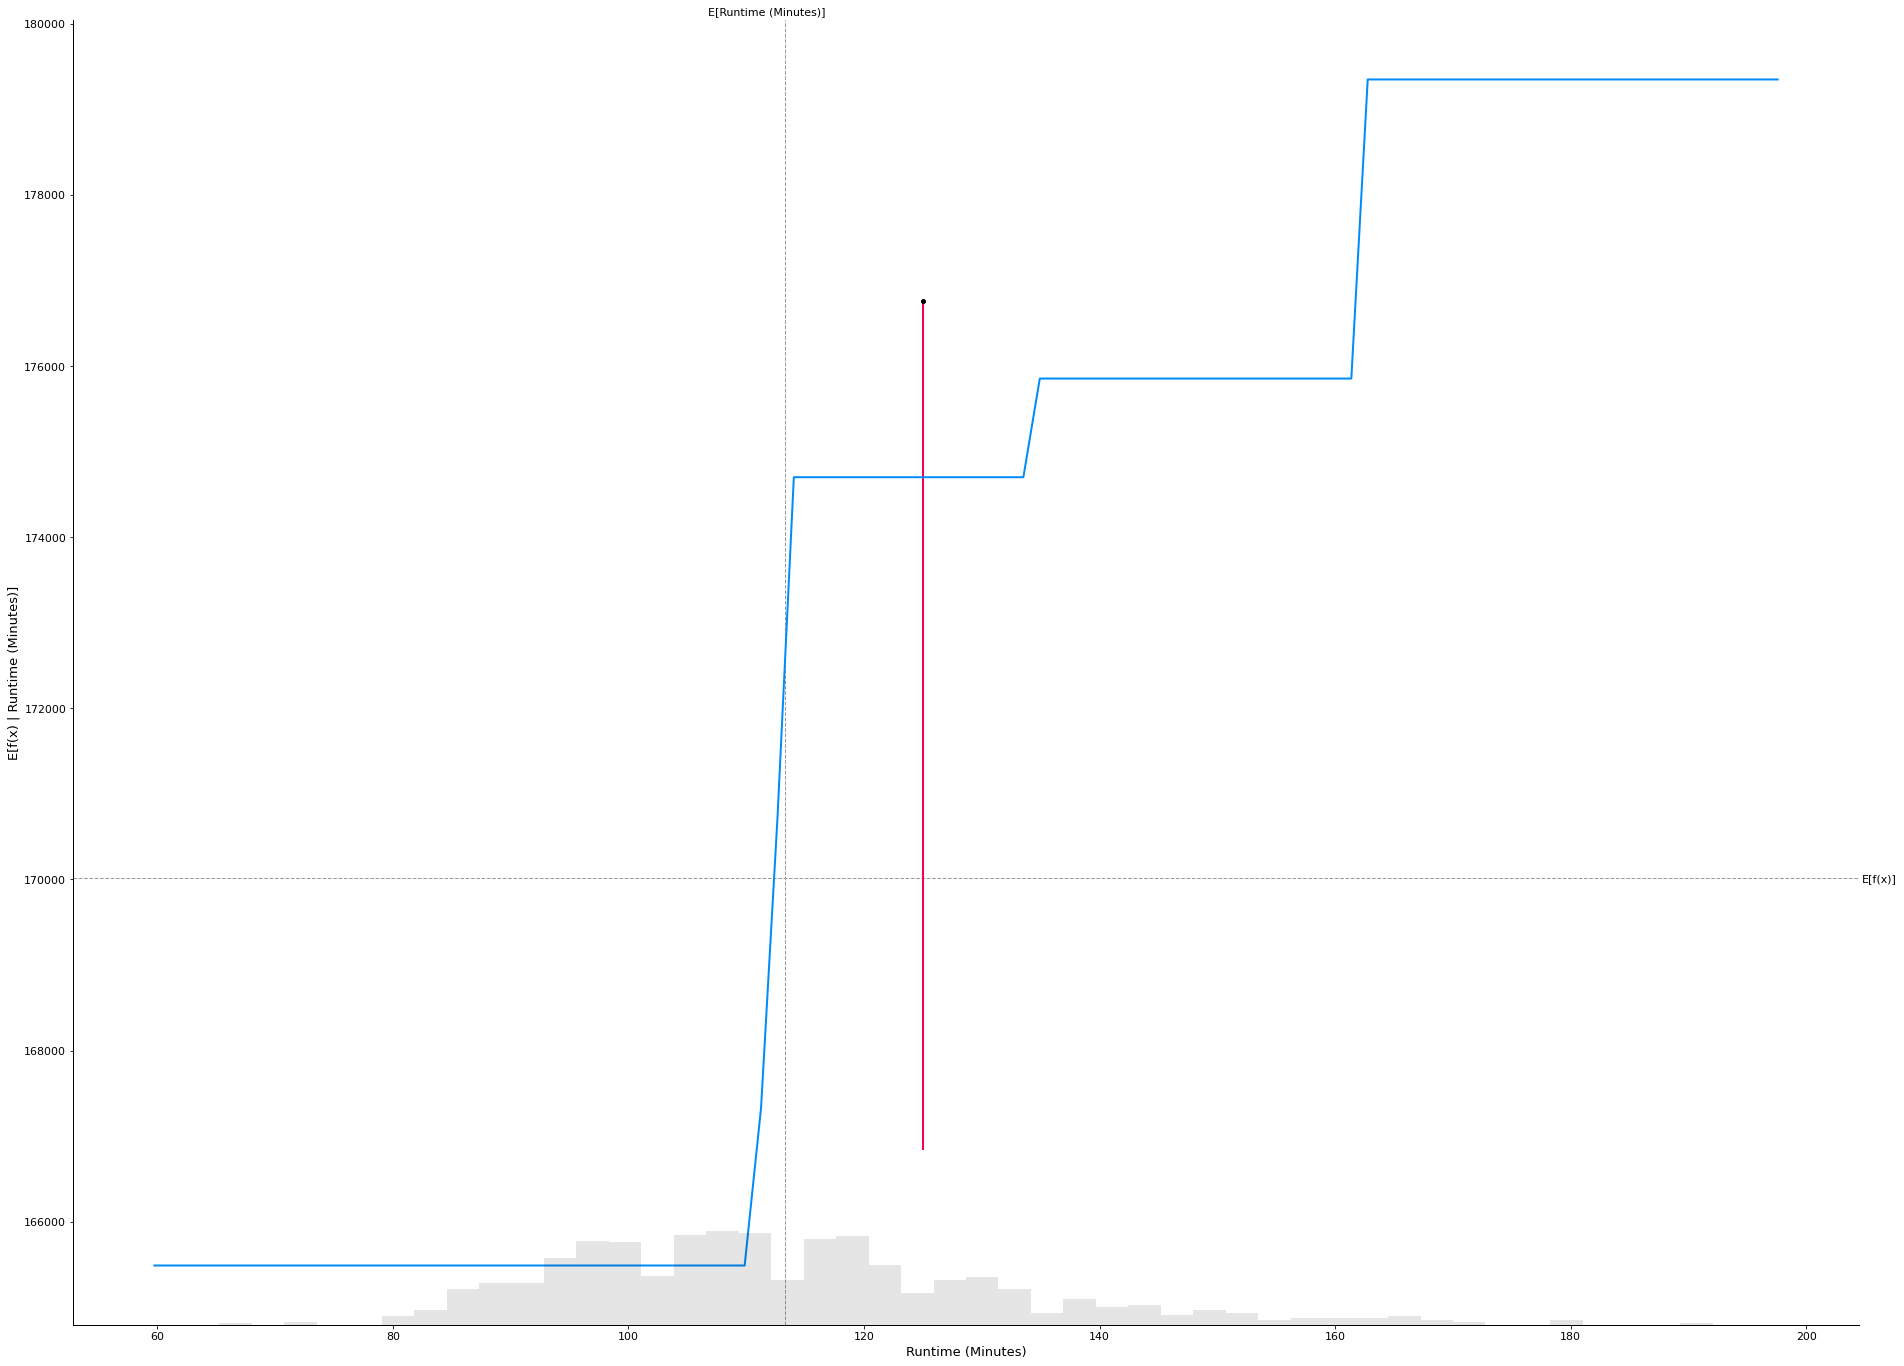

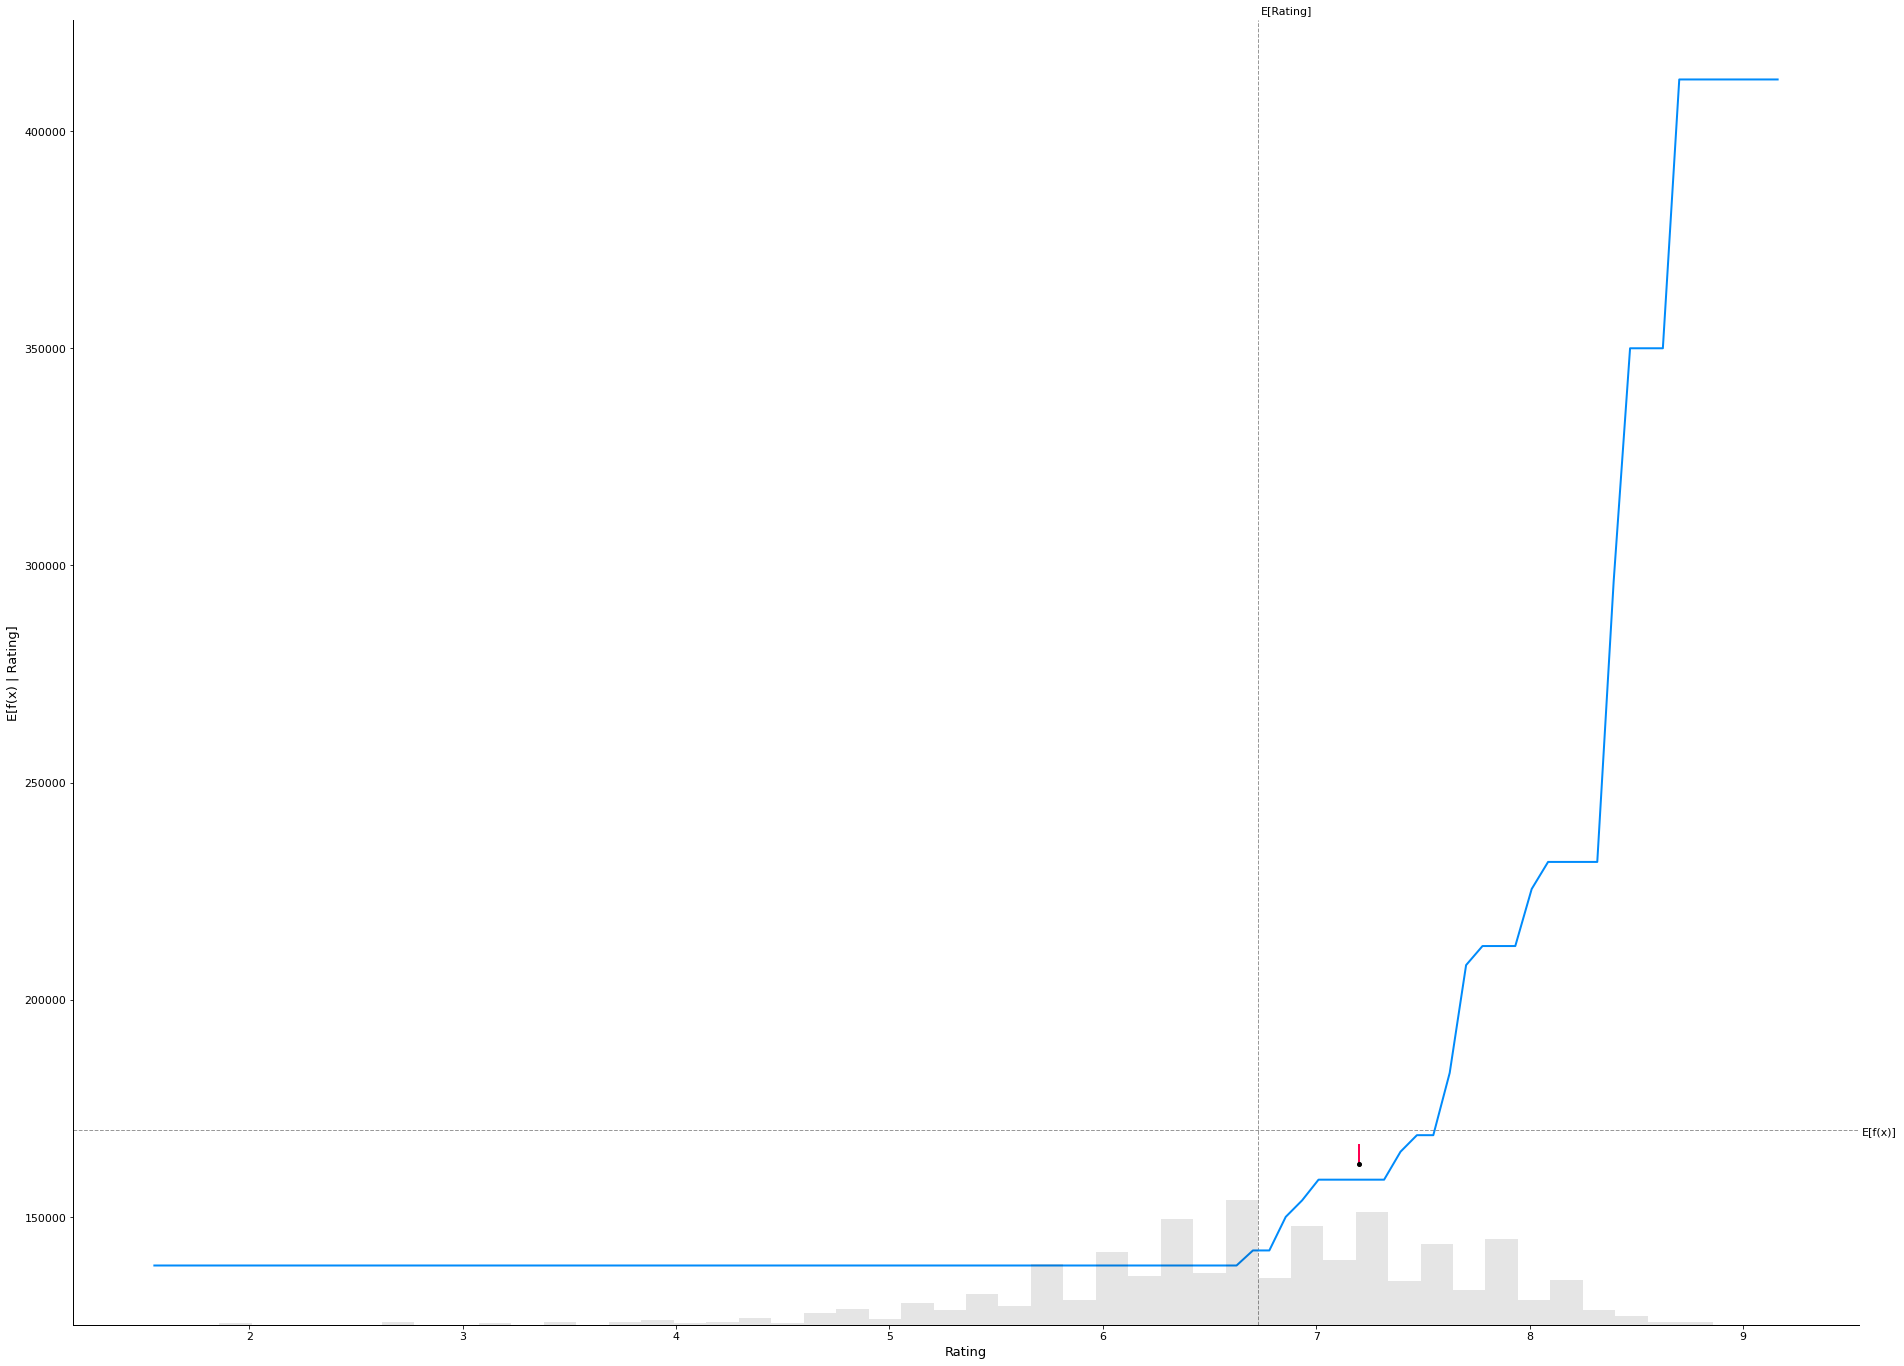

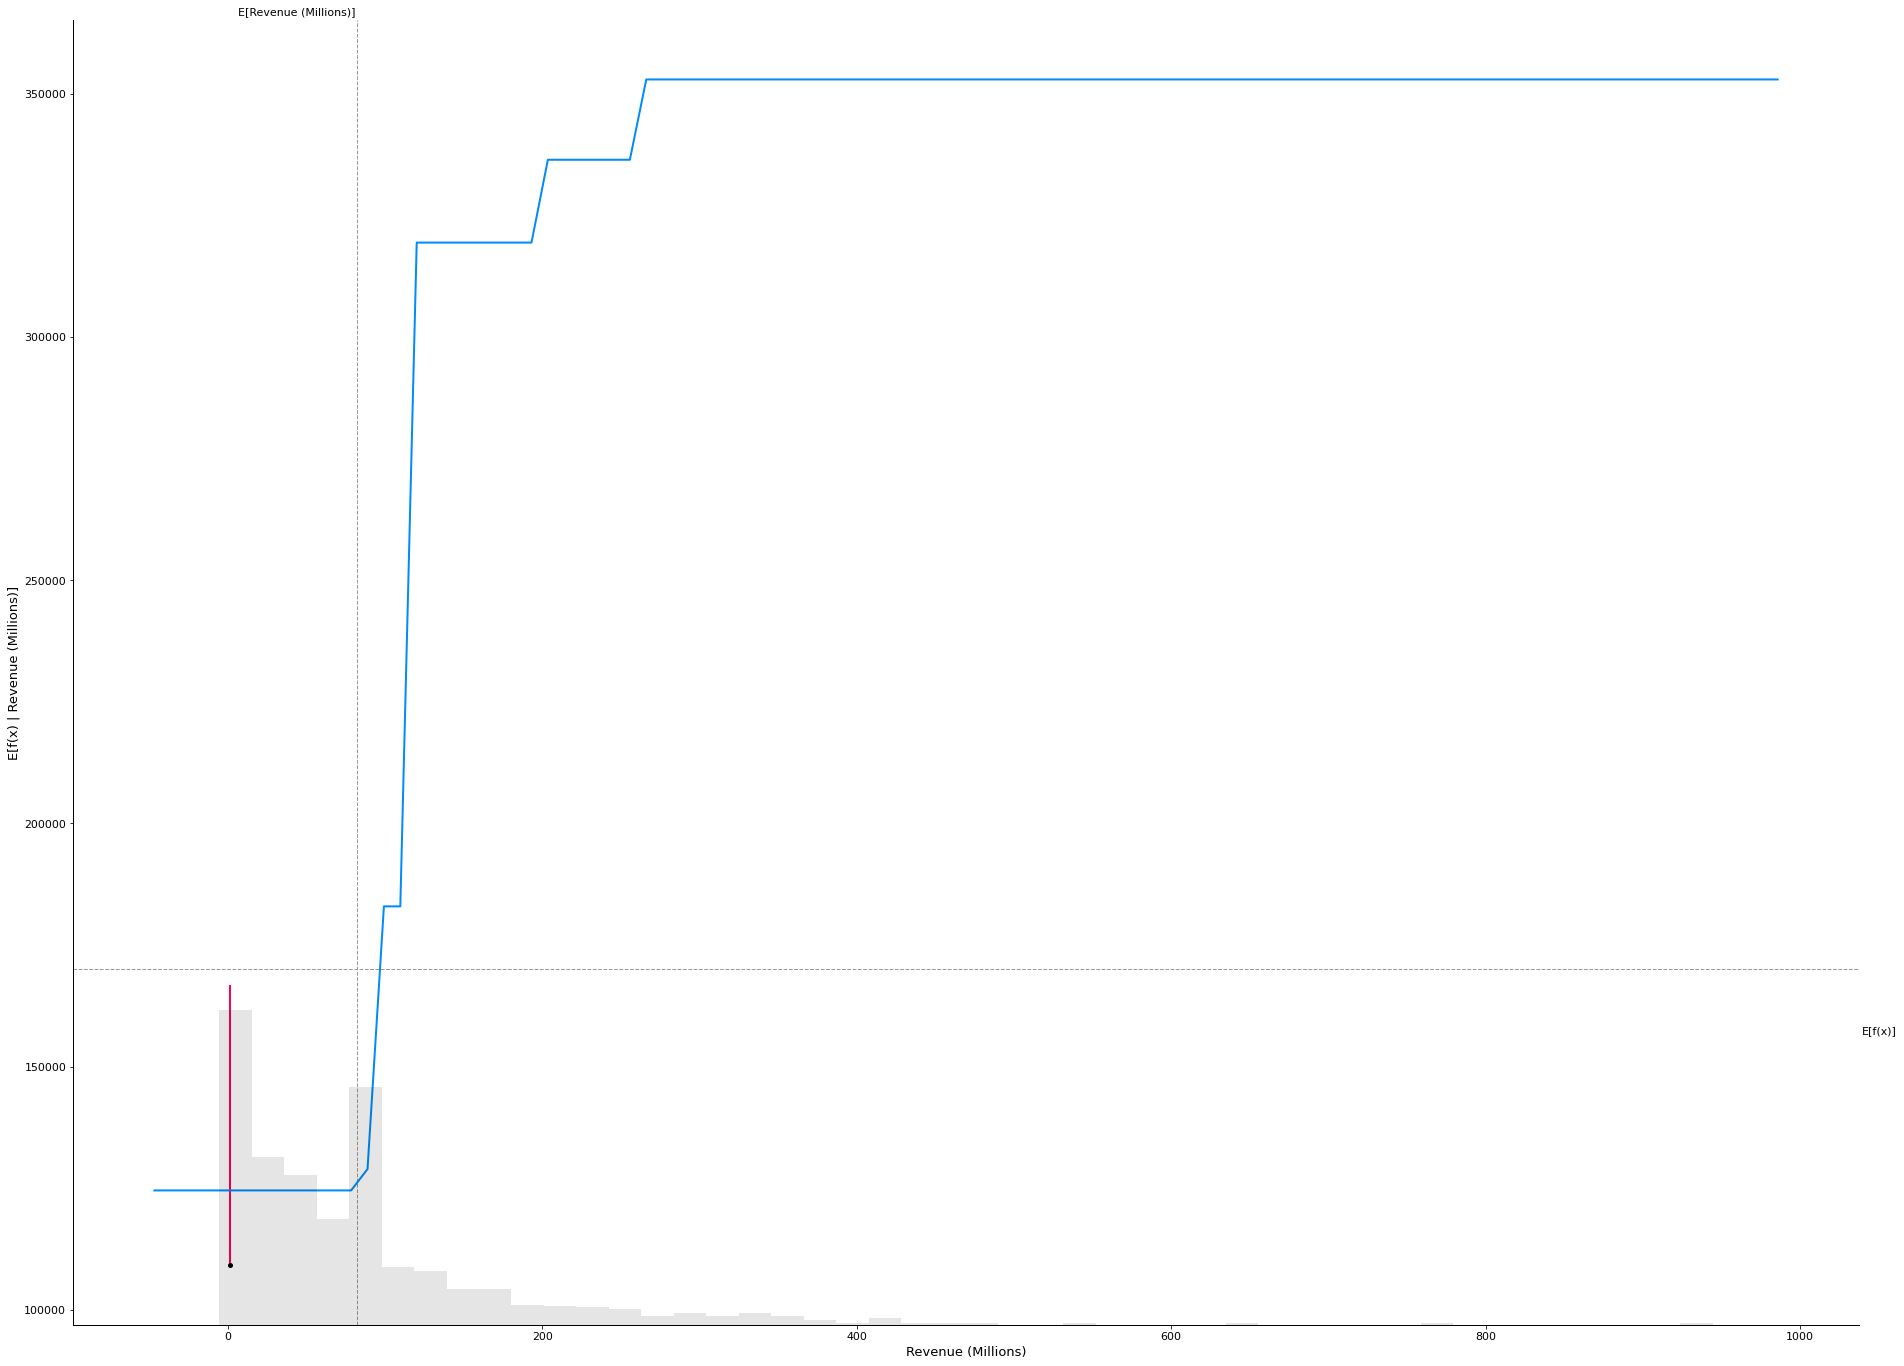

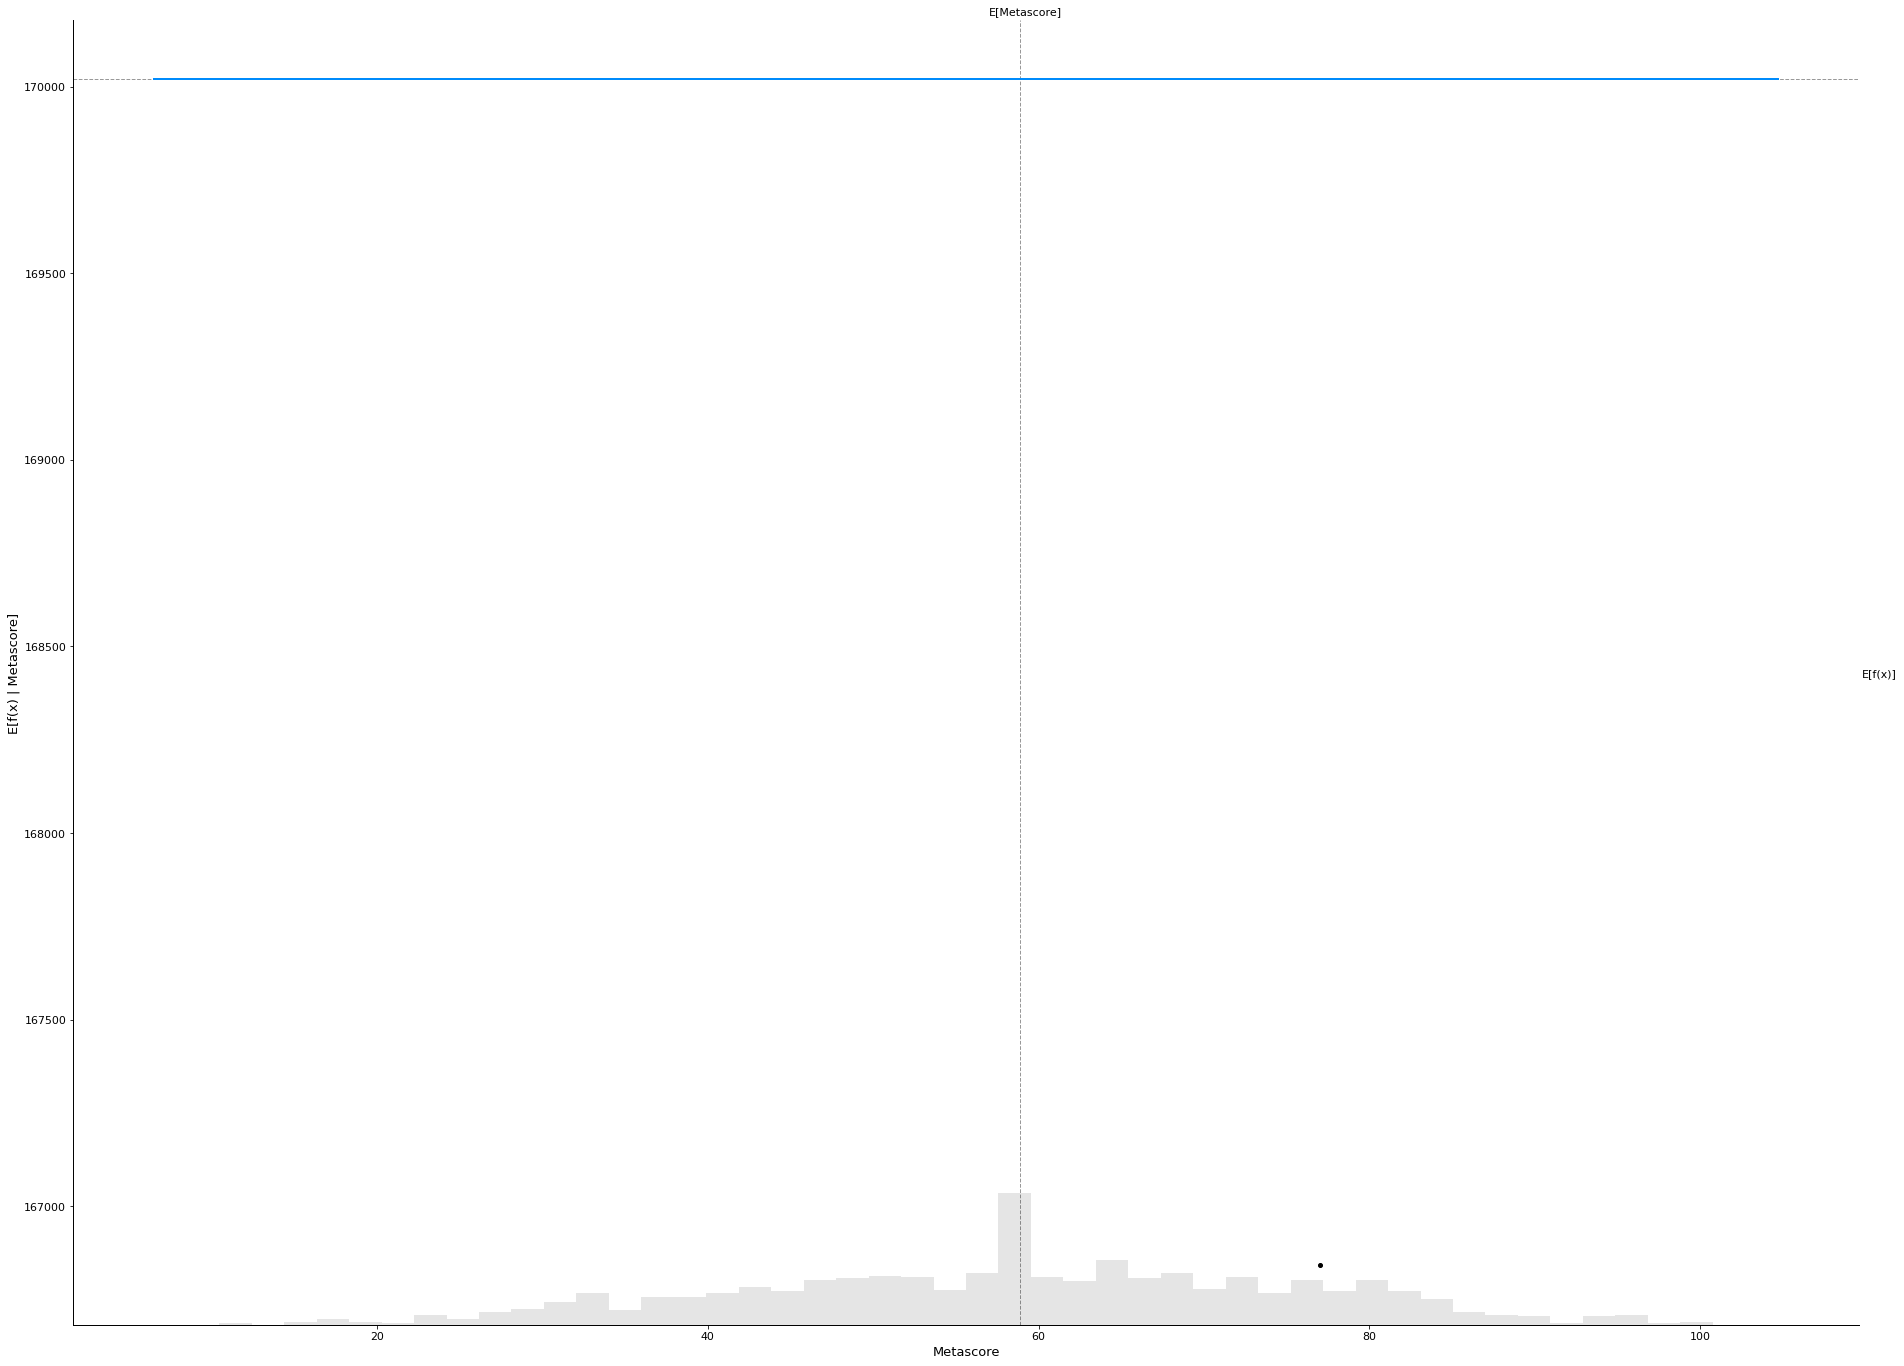

In [42]:
# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(tree_model.predict, x_train_1000)
tree_shap_values = tree_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        tree_model.predict,
        x_train_1000,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


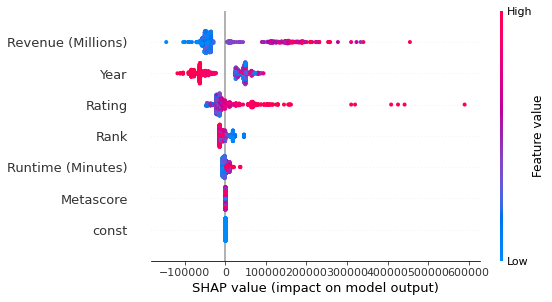

In [43]:
# shap summmary for random forest

shap.summary_plot(tree_shap_values, x_train)

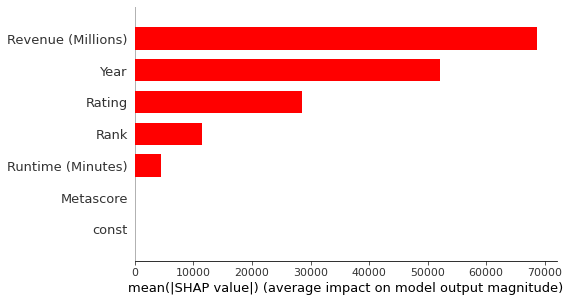

In [224]:
# SHAP variable importance for a random forest Model

shap.summary_plot(tree_shap_values, x_train, plot_type="bar", color="red")


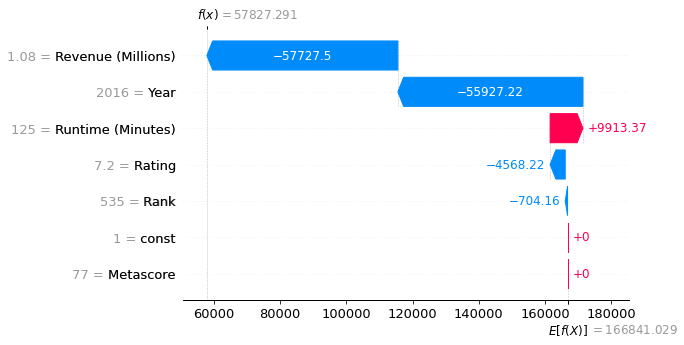

In [225]:
# Waterfall plot for random forest model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

**Interpreting Waterfall SHAP visualization**

We can interpret the tree-based model for the same sample.
Where the output we got was 57827 and the expected output was 57827. in the tree-based model, we just see that the magnitude of the impact made by individual features varies from what we had in a linear model. Here in the tree-based model, the output is majorly determined by only three features - revenue, year, and runtime, whereas in the linear model revenue, year, and runtime, these features had maximum impact.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


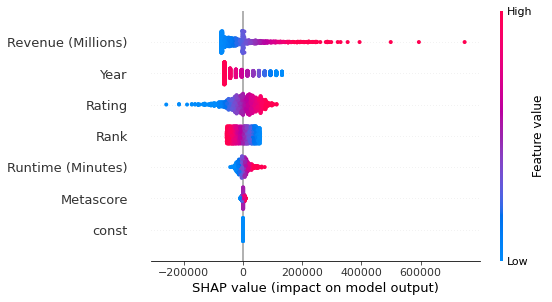

In [250]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, x_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


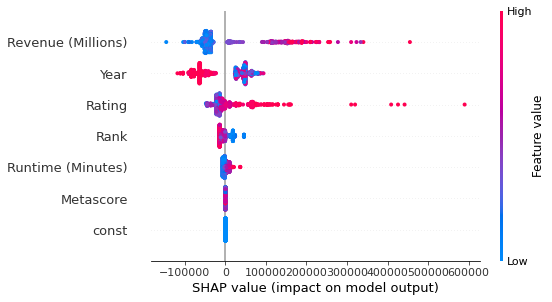

In [226]:
# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, x_train)

**Interpreting SHAP dependence plot for Linear and Tree-based model**

The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the linear and Tree-based models using the SHAP dependence plot. Here in these graphs, we get a dot for every column in our dataset.

As we can observe the linear model feature and its SHAP value have a linear relationship. If a feature has a positive impact on the votes then the relationship will be directly proportional e.g. revenue and if the feature harms votes the relationship will be inversely proportional. 

For the tree-based model as observed the relationship between feature and its SHAP value is no longer linear. Now we see that the SHAP dependence plot no longer exactly matches the partial dependence plot because they are accounting for the interaction effects. Because if we look at the PDP, we are losing all the high order interaction (and's and or's) in the model that our model may be doing. But unlike PDP, the SHAP defense plot takes these interactions into account.

Example of SHAP dependence plot of imdb

In the linear model the relationship is linear between revenue and its SHAP values. There is not much information to extract from these plots the only information which could be extracted is if the relationship is directly or inversely proportional.
In the tree-based model we could extract the information on how the votes are affected while being tuned the feature. It also reinforces the inference we got from the above PDP and ICE plot i.e. 

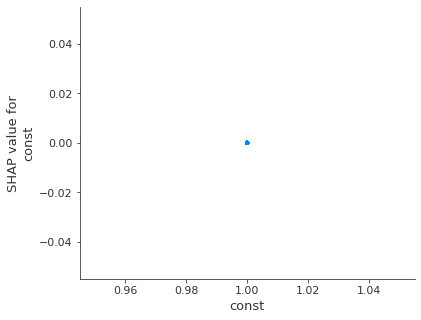

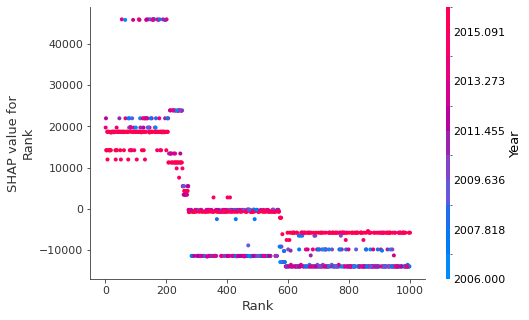

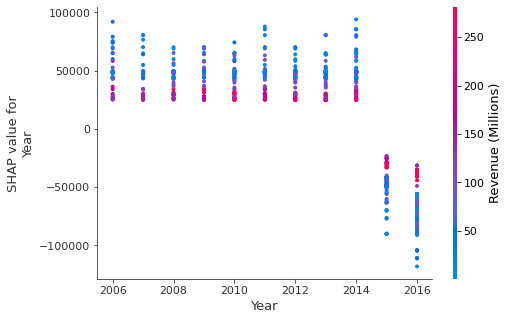

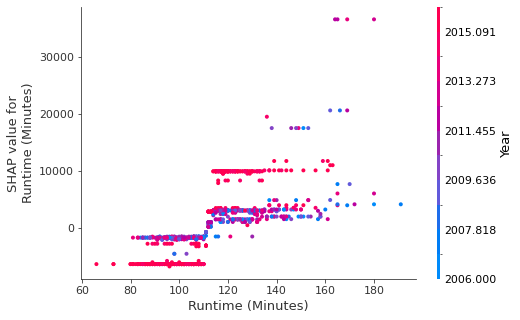

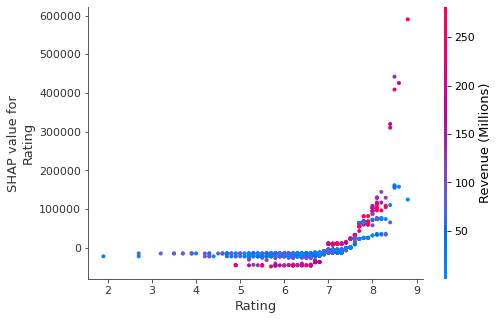

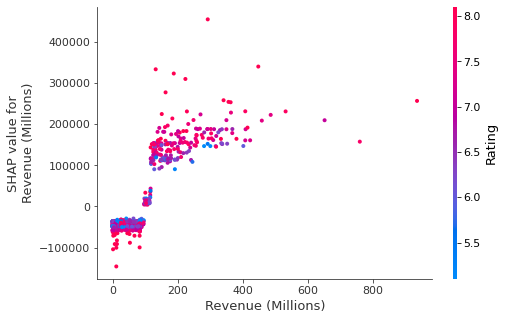

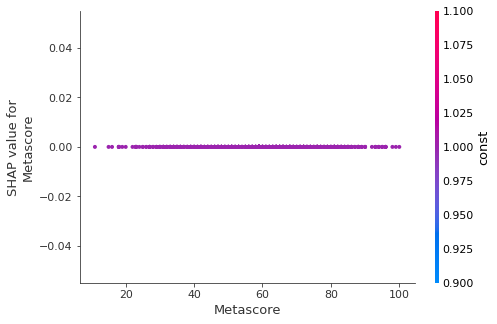

In [229]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, x_train)

In [230]:
X_output_linear = x_test.copy()
X_output_linear.loc[:, "predict"] = np.round(
    linear_model.predict(X_output_linear), 2
)  # Attaching the output of linear model to test dataframe

X_output_tree = x_test.copy()
X_output_tree.loc[:, "predict"] = np.round(
    tree_model.predict(X_output_tree), 2
)  # Attaching the output of tree based model to test dataframe

In [231]:
# Force Plot of Tree Based Model
explainerModel = shap.TreeExplainer(tree_model)
shap_values_Model = explainerModel.shap_values(X_output_tree)


def shap_plot_tree(j):
    p = shap.force_plot(
        explainerModel.expected_value, shap_values_Model[j], X_output_tree.iloc[[j]]
    )
    return p

**Force Plot SHAP analysis**
This plot is the same as the waterfall model which we saw above the only difference is the visualization is condensed. It is really up to an individual which visualization is preferred some find this easier to read others find the waterfall model easier to read.

In [232]:
shap.initjs()  # Initializing JavaScript module
print(shap_plot_tree(18))  # SHAP force plot for sample 18

**Heatmap Visualization for Linear and Tree-based model**
This visualization is a summarization of the entire dataset on how each data point in every feature is affecting the target(Votes).

Here the Y-axis is Features
and X-axis is Instance of that feature
The color of the instance defines if it had a positive effect or negative effect by its color. If the instance is red then it had a positive effect and if the instance is blue then it had a negative effect
The intensity of the color is directly proportional to the intensity of the effect. Deeper the color, the more impactful the feature is.

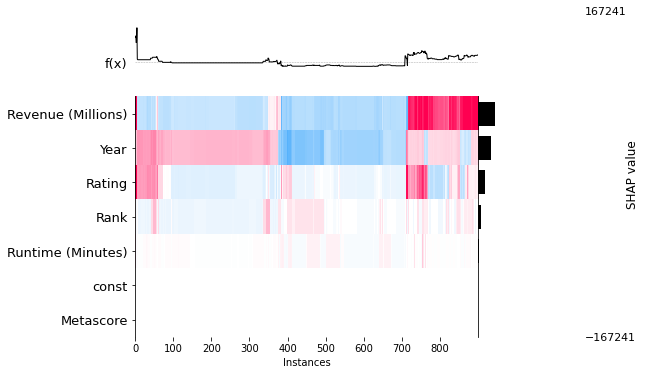

In [233]:
shap.plots.heatmap(tree_shap_values)  # SHAP HeatMap of a Tree Based Model


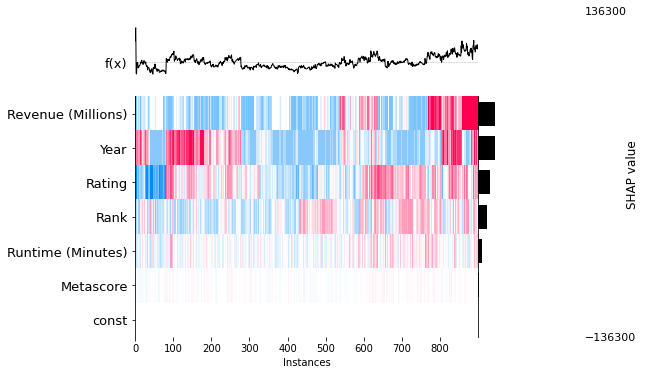

In [234]:
shap.plots.heatmap(linear_shap_values)  # SHAP heatmap for a Linear Model


**LIME (Local Interpretation Model-Agnostic Explanation) Analysis**

LIME builds a surrogate model, i.e. converts a more complicated model (say a deep tree-based model into a simple linear model) around the data points in which we are interested and then it will try to make an approximation out of this simple model on the whole model. LIME builds a local model in such a way that it can interpret the whole Black-Box

LIME works well on tabular, text, image datasets - hence it works on different datasets

Let us Interpret our Linear model and Tree-based model on sample data (sample_index = 18) using LIME and try to understand what is happening under the hood. Please refer below for Visualizations of both models

As we can see on the left-hand side LIME gives us information about the minimum and maximum values predicted by the model. The Color orange here represents positive and blue represents negative
Here for this sample as seen below alcohol, sulfate, volatile_acidity, residual_sugar harmed both linear and tree-based model
total_sulphur_dioxide, density, pH, citric_acid, had a positive effect on the quality of wine in both models
fixed_acidity, free_sulphur_dioxide, chloride had a negative effect in the linear model but positive in tree-based model
These interpretations were carried out locally in the region where of out sample data(sample_index = 18).

**LINEAR MODEL**

In [235]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)

In [236]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", linear_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], linear_model.predict, num_features=np_x_test.shape[1]
)
lime_linear_explanation


Prediction :  [35091.07266823]
Actual :      151970


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


In [237]:
lime_linear_explanation.show_in_notebook()  # Display Results in Notebook


**TREE BASED MODEL**

In [238]:
# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)

In [239]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", tree_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], tree_model.predict, num_features=np_x_test.shape[1]
)
lime_tree_explanation

Prediction :  [142905.4867722]
Actual :      151970


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [240]:
lime_tree_explanation.show_in_notebook()  # Display Results in Notebook


**PDP(Partial Dependence Plot) for Linear model and Tree-based Model
Linear Model -**

Tree-Based Model - On looking at the PDP of the tree-based model, it re-affirms the interpretation we got from the PDP of the Linear Model and Best AutoML model. The only difference here is that the output doesn't vary linearly

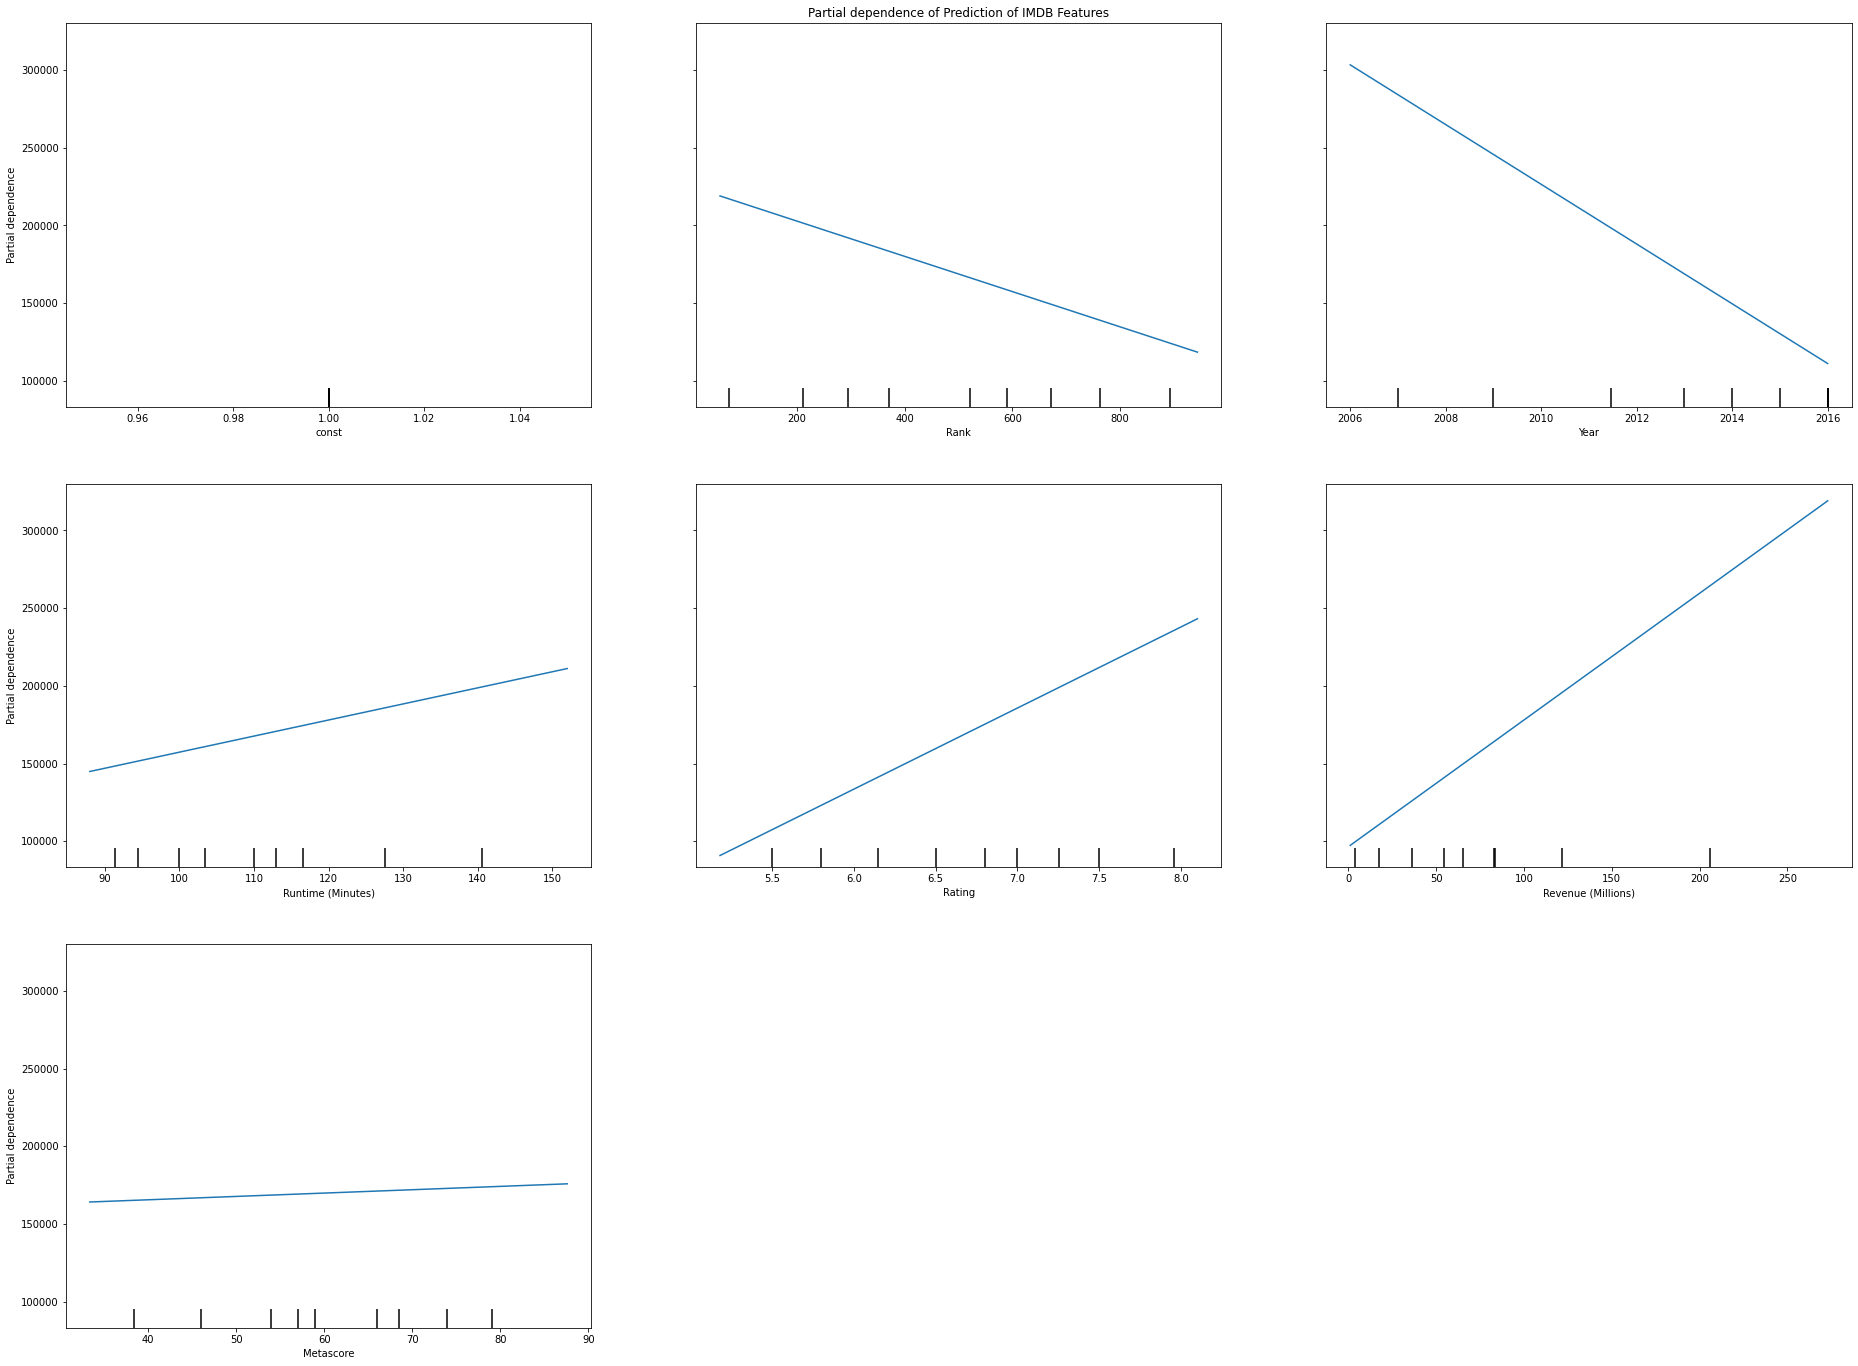

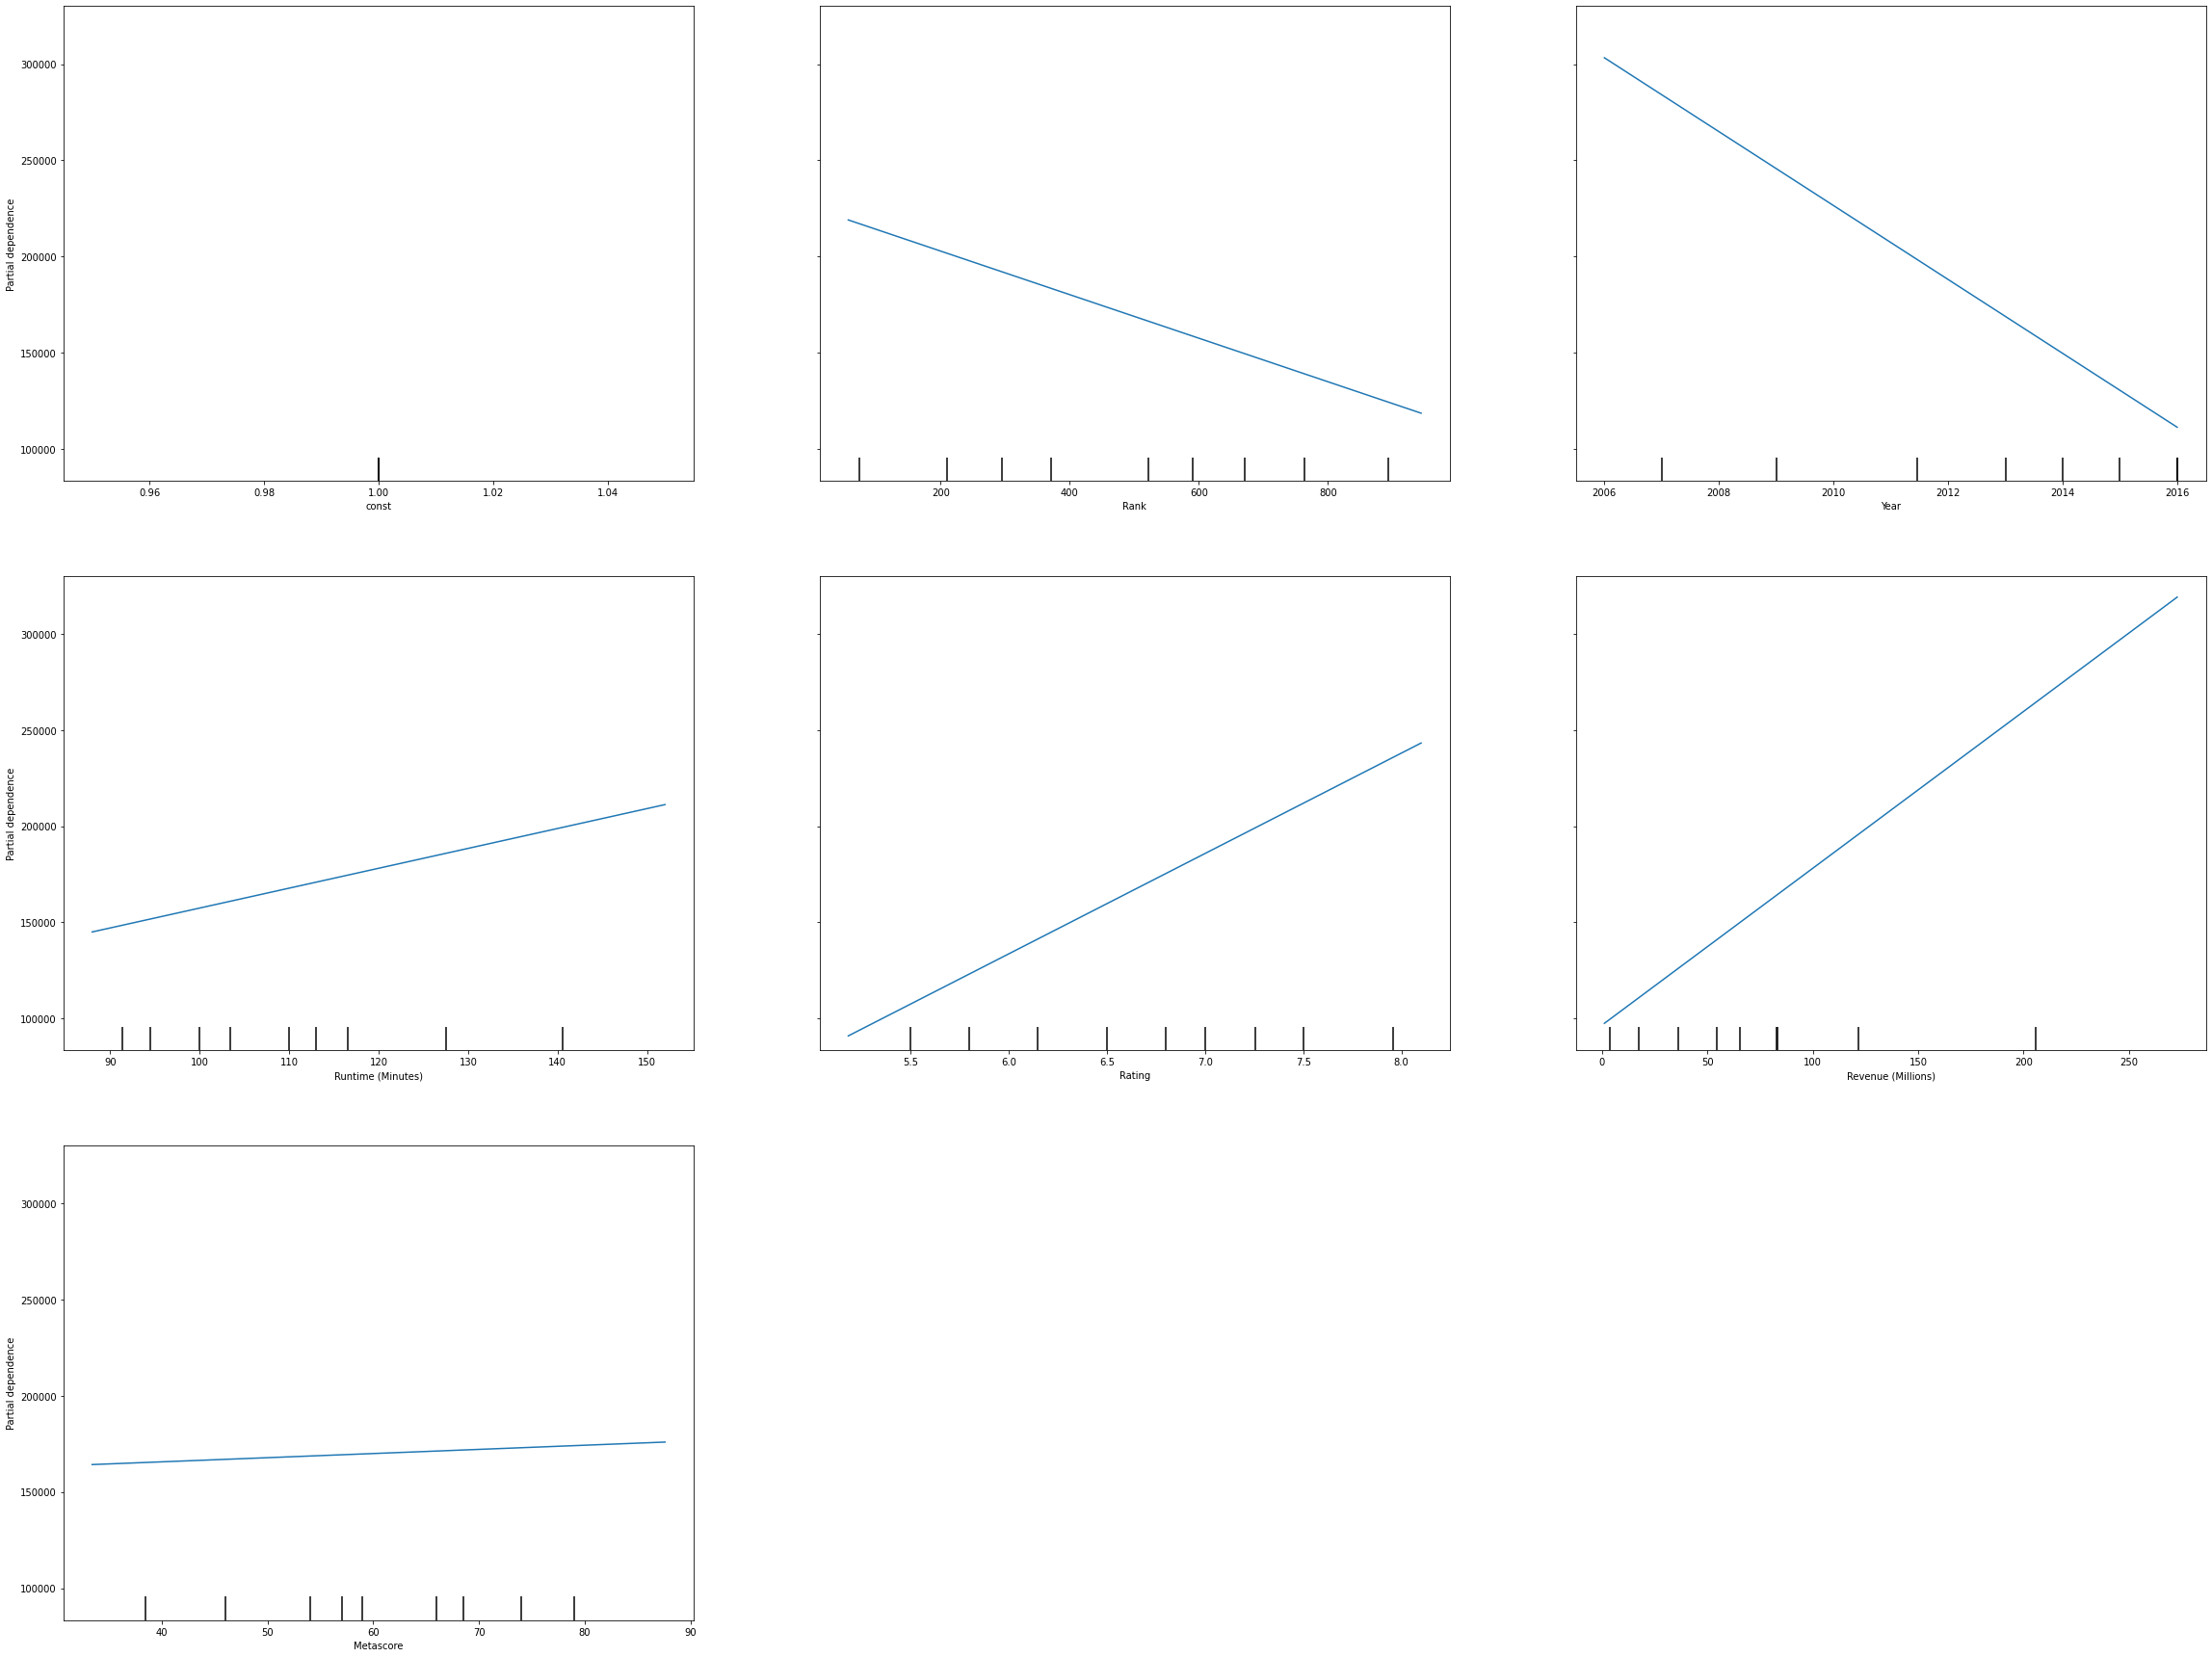

In [248]:
# PDP Plot for Linear Model
fig, ax = plt.subplots(figsize=(32, 24))
display = PartialDependenceDisplay.from_estimator(linear_model, x_test, x_test.columns, n_jobs=3, grid_resolution=20)
display.plot(ax=ax)
ax.set_title("Partial dependence of Prediction of IMDB Features")
plt.tight_layout()
plt.show()

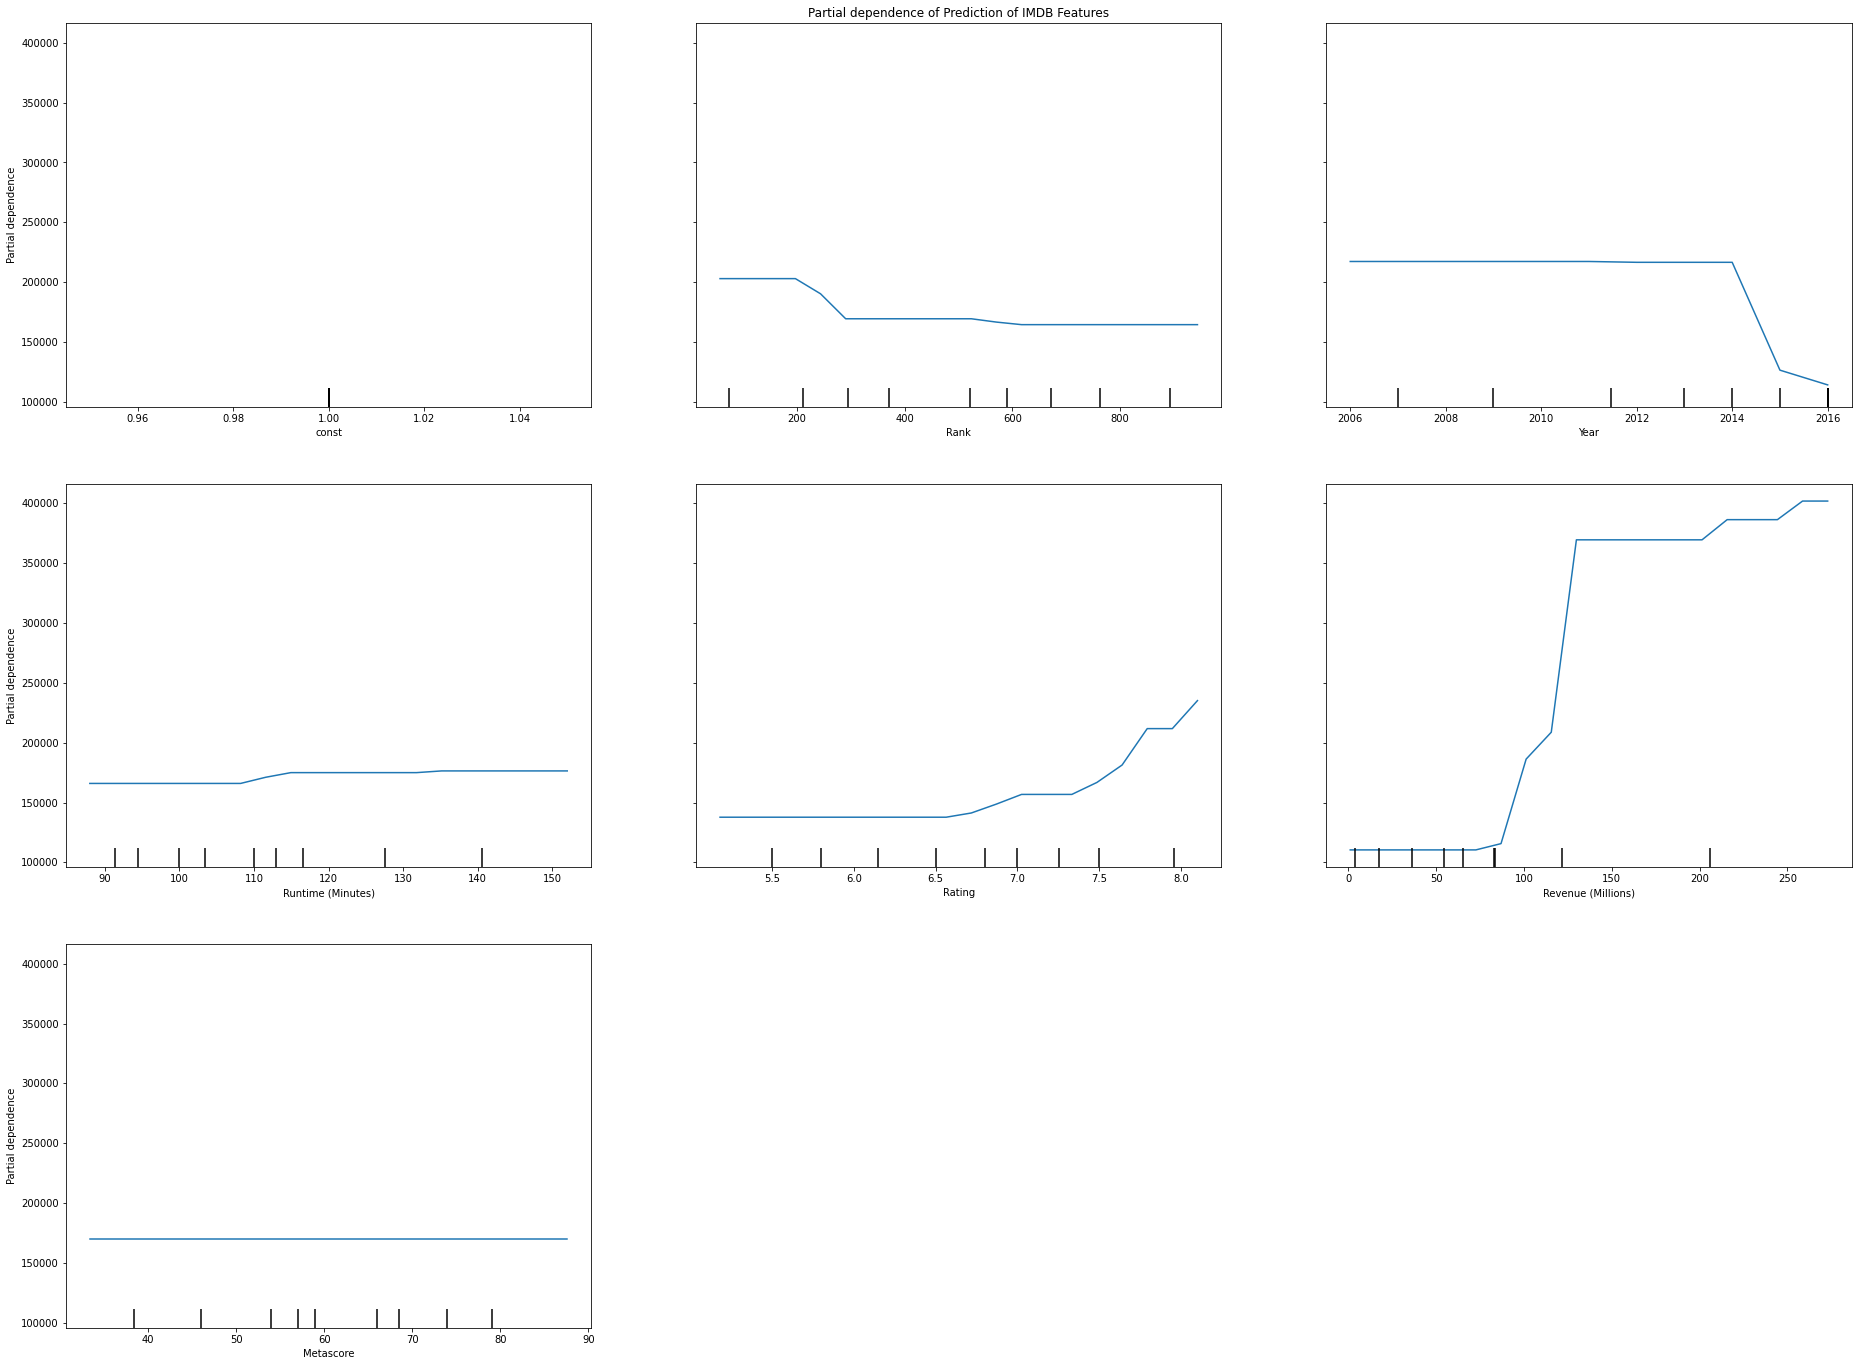

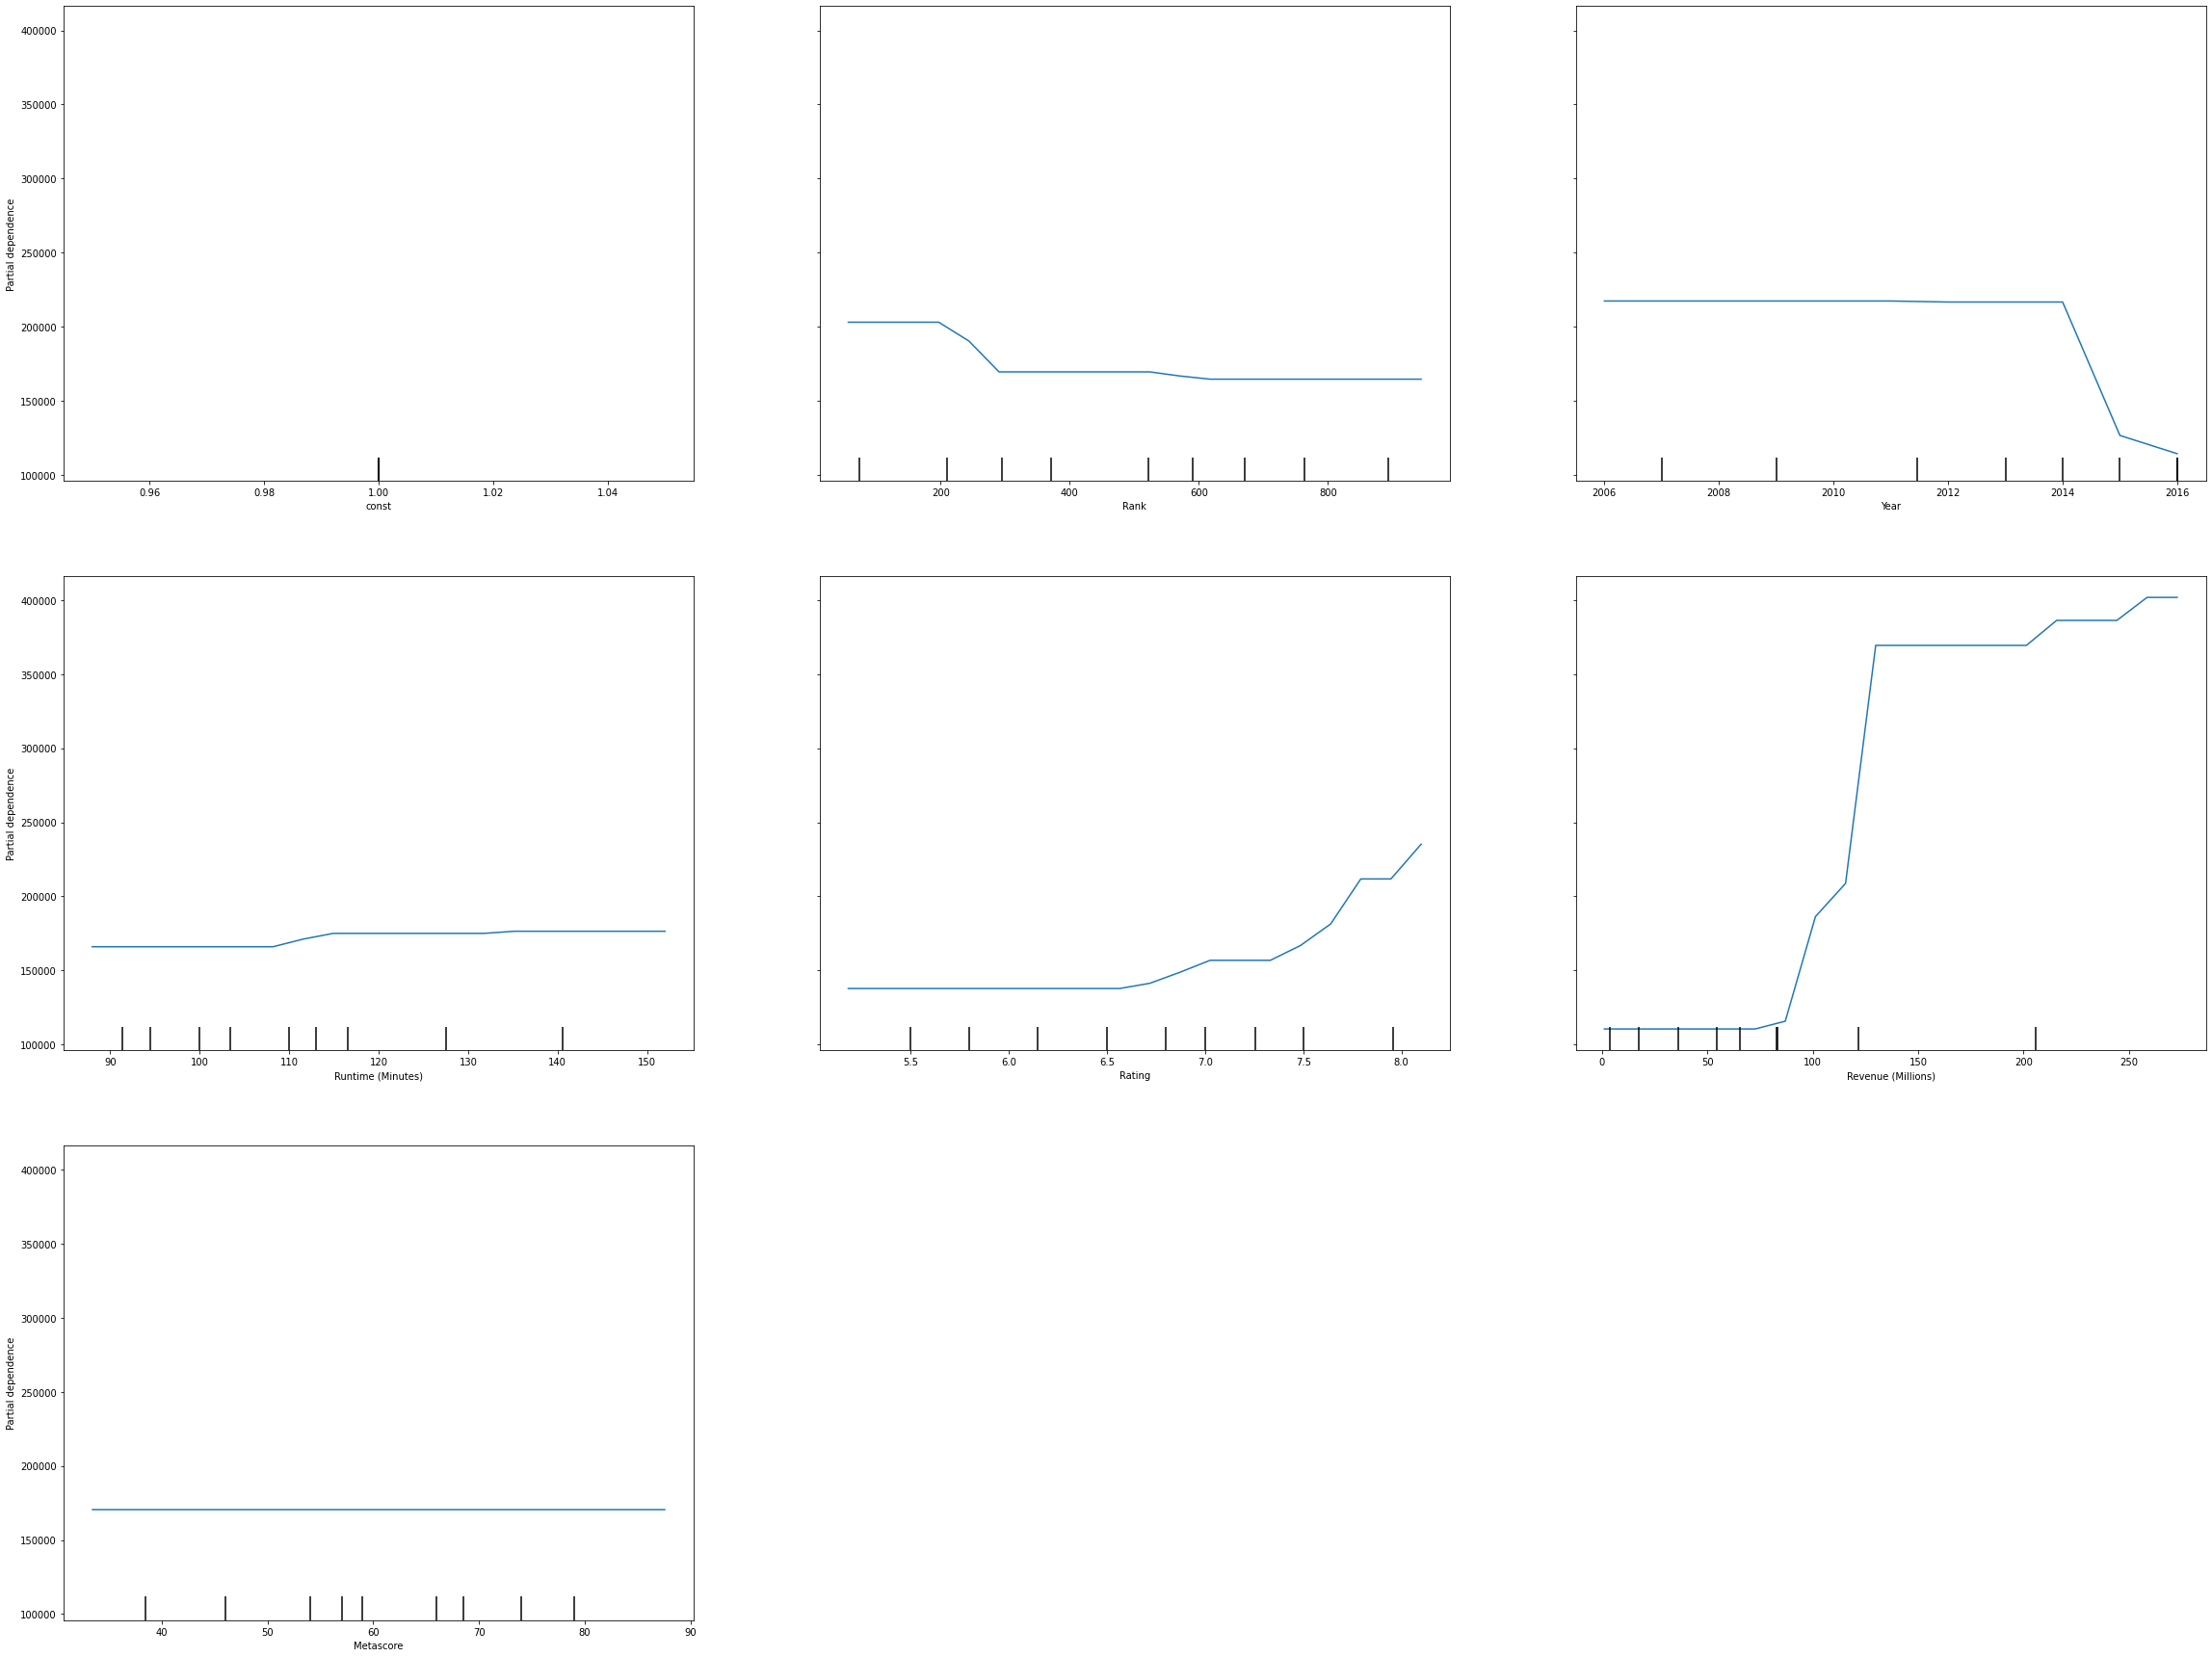

In [249]:
# PDP Plot for Tree Based Model
fig, ax = plt.subplots(figsize=(32, 24))
display = PartialDependenceDisplay.from_estimator(tree_model, x_test, x_test.columns, n_jobs=3, grid_resolution=20)
display.plot(ax=ax)
ax.set_title("Partial dependence of Prediction of IMDB Features")
plt.tight_layout()
plt.show()

# **Getting the best model using AutoML**

In [274]:
# Converting Pandas dataframe in H2O dataframe
hdf = h2o.H2OFrame(data)  

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [275]:
# Setting up the data split between training and test dataset
pct_rows = 0.80  
hdf_train, hdf_test = hdf.split_frame([pct_rows])

In [276]:
# Setting up AutoML
def autoML(hdf_train=100, hdf_test=100):
    X = hdf.columns
    y = "Votes"

    X.remove(y)  # Removing the result frm our predictors data
    X.remove("Rank")  # Removing Rank from the predictor's data, as it is not related

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame= hdf_train
    )  # Trainig the dataset on different models

    return hdf_train, hdf_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [277]:
autoML = autoML(hdf_train, hdf_test)  # Training AutoML


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [278]:
autoML[2].leaderboard  # Leaderbord of AutoML output


model_id                                                   rmse          mse      mae    rmsle    mean_residual_deviance
------------------------------------------------------  -------  -----------  -------  -------  ------------------------
StackedEnsemble_BestOfFamily_4_AutoML_3_20230329_53854  85794.7  7.36073e+09  57189.3      nan               7.36073e+09
GBM_grid_1_AutoML_3_20230329_53854_model_2              86365.6  7.45901e+09  57472.4      nan               7.45901e+09
GBM_grid_1_AutoML_3_20230329_53854_model_12             86645.1  7.50738e+09  57039.3      nan               7.50738e+09
XGBoost_grid_1_AutoML_3_20230329_53854_model_23         87489    7.65433e+09  58672.9      nan               7.65433e+09
XGBoost_grid_1_AutoML_3_20230329_53854_model_29         88028.2  7.74896e+09  57915.9      nan               7.74896e+09
GBM_grid_1_AutoML_3_20230329_53854_model_17             89266.9  7.96858e+09  60000.7      nan               7.96858e+09
GBM_5_AutoML_3_20230329_53854                           89366.1  7.9863e+09   60009.2      nan               7.9863e+09
GBM_grid_1_AutoML_3_20230329_53854_model_47             89647.7  8.03671e+09  60281        nan               8.03671e+09
XGBoost_grid_1_AutoML_3_20230329_53854_model_20         90128    8.12306e+09  57792.1      nan               8.12306e+09
StackedEnsemble_AllModels_2_AutoML_3_20230329_53854     90194.2  8.135e+09    59492.7      nan               8.135e+09
[132 rows x 6 columns]

In [279]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model
print(autoML_model)

1
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20230329_53854_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    48                 48                          9533                   4            4            4             6             16            11.1458

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 3823159128.3421826
RMSE: 61831.70002791596
MAE: 43025.47289156246
RMSLE: NaN
Mean Residual Deviance: 3823159128.3421826

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 7459014661.652599
RMSE: 86365.58725356181
MAE: 57472.408988404844
RMSLE: NaN
Mean Residual Deviance: 7459014661.652599

Cross-Validati

In [280]:
autoML_model.predict


<bound method ModelBase.predict of H2OGradientBoostingEstimator({'parms': {'model_id': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'model_id', 'label': 'model_id', 'help': 'Destination id for this model; auto-generated if not specified.', 'required': False, 'type': 'Key<Model>', 'default_value': None, 'actual_value': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_3_20230329_53854_model_2', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_3_20230329_53854_model_2'}, 'input_value': None, 'level': 'critical', 'values': [], 'is_member_of_frames': [], 'is_mutually_exclusive_with': [], 'gridable': False}, 'training_frame': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'training_frame', 'label': 'training_frame', 'help': 'Id of the training data frame.', 'required': False, 'type': 'Key<Frame>'

In [281]:
#Getting the best model
autoML_model.algo

'gbm'

In [282]:
print(autoML_model.r2(train=True))

0.8932067352226408


# **SHAP, Partial Dependence Plot, Individual Conditional Expectation Analysis for AutoML Best Model**

In [283]:
shap.initjs()

In [284]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

In [285]:
print(hdf_train.shape)


(821, 7)


In [286]:
row_index

0

In [287]:
# select the first row
row = hdf_train[row_index, :]



In [288]:
data=data[["Rank","Year","Rating","Votes","Revenue (Millions)","Metascore","Runtime (Minutes)"]]


In [289]:
train,test = hdf.split_frame([.9])


In [290]:
#  Set response variable and your choice of predictor variables
myY = "Revenue (Millions)"
myX = ["Rank","Year","Rating","Votes","Metascore","Runtime (Minutes)"]

In [291]:
# Building a simple GBM model

from h2o.estimators import H2OGradientBoostingEstimator

# Initialize the GBM model with hyperparameters
model_gbm = H2OGradientBoostingEstimator(
                balance_classes=True,
                ntrees=1000,
                max_depth=1,
                learn_rate=0.1,
                min_rows=2)

# Train the GBM model on the training data
model_gbm.train(x=myX,
                y=myY,
                training_frame = hdf_train,
                validation_frame = hdf_test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1680053706735_69


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    1000               1000                        84813                  1            1            1             2             2             2

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 3398.386218879211
RMSE: 58.29567924708667
MAE: 41.91436465683049
RMSLE: NaN
Mean Residual Deviance: 3398.386218879211

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 7065.751983919898
RMSE: 84.05802748054404
MAE: 55.6926511052266
RMSLE: NaN
Mean Residual Deviance: 7065.751983919898

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2023-03-29 05:43:20  0.005 sec   0.0                94.1184154216094    62.34407547741054   8858.27612147464     106.10294126051696  65.44316666578366   11257.834144132712
     2023-03-29 05:43:20  0.029 sec   1.0                91.51925740233128   60.5096167737026    8375.774475474169    103.52995884654274  63.86908486794411   10718.452378766833
     2023-03-29 05:43:20  0.033 sec   2.0                89.32726802677317   59.04902164859019   7979.360813126973    101.04238358310855  62.51561962974715   10209.563280156042
     2023-03-29 05:43:20  0.042 sec   3.0                87.4622968405116    57.755639117773754  7649.653368617766    99.13988951970275   61.43400172107632   9828.717693978868
     2023-03-29 05:43:20  0.045 sec   4.0                85.89429367112619   56.753020980920596  7377.8296852616695   97.23898291163721   60.363590851335324  9455.419797689672
     2023-03-29 05:43:20  0.047 sec   5.0                84.48613633696499   55.95821720820451   7137.907233148236    95.4407766270696    59.43998051561358   9108.941843178194
     2023-03-29 05:43:20  0.049 sec   6.0                83.2524795060227    55.16482728031372   6930.975343900728    94.14815492730968   58.667313128269264  8863.875076216706
     2023-03-29 05:43:20  0.055 sec   7.0                82.17787493105833   54.61719576219022   6753.203128184665    92.77638603220566   57.878783317310535  8607.457805196847
     2023-03-29 05:43:20  0.059 sec   8.0                81.19611910193125   53.999105428820805  6592.809757215004    91.96147485916985   57.531339406360146  8456.91285827373
     2023-03-29 05:43:20  0.061 sec   9.0                80.29731429076685   53.69586893558121   6447.658682310191    91.20275774457397   57.25620141098521   8317.943020215447
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2023-03-29 05:43:24  3.905 sec   450.0              61.887161412980284  43.392129103931055  3830.0207477562753   79.6060701806602    54.03646013574706   6337.126409608197
     2023-03-29 05:43:24  3.918 sec   451.0              61.87776369079818   43.39247417017527   3828.8576393742624   79.6119362588964    54.05084854199047   6338.060394890585
     2023-03-29 05:43:24  3.929 sec   452.0              61.868979587810095  43.37639917652423   3827.7706352368623   79.60627151842411   54.00670475368615   6337.158465065062
     2023-03-29 05:43:24  3.940 sec   453.0              61.85978706940907   43.37002834512077   3826.63325627263     79.59866089259046   54.003872762361276  6335.94681589361
     2023-03-29 05:43:24

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

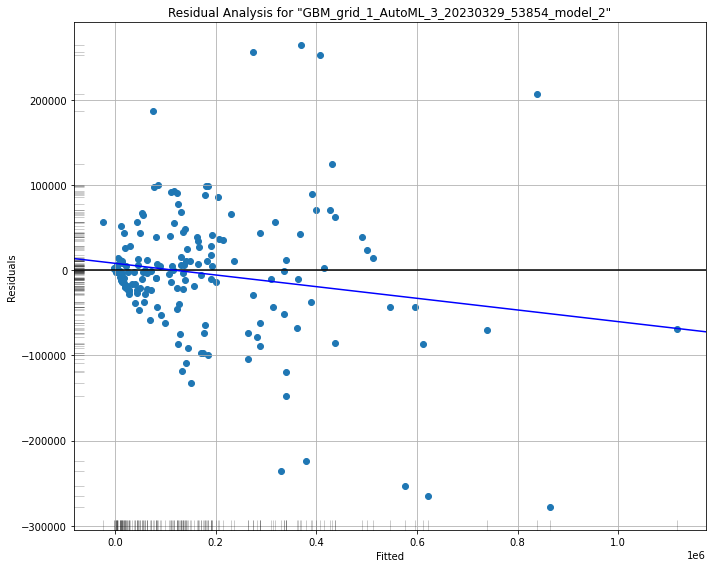

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

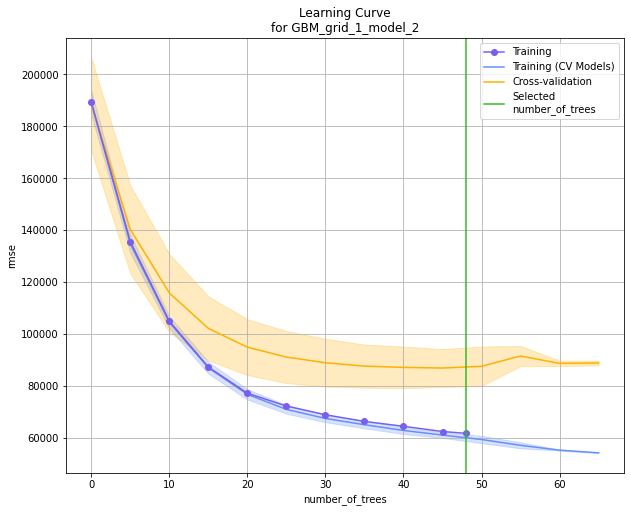

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

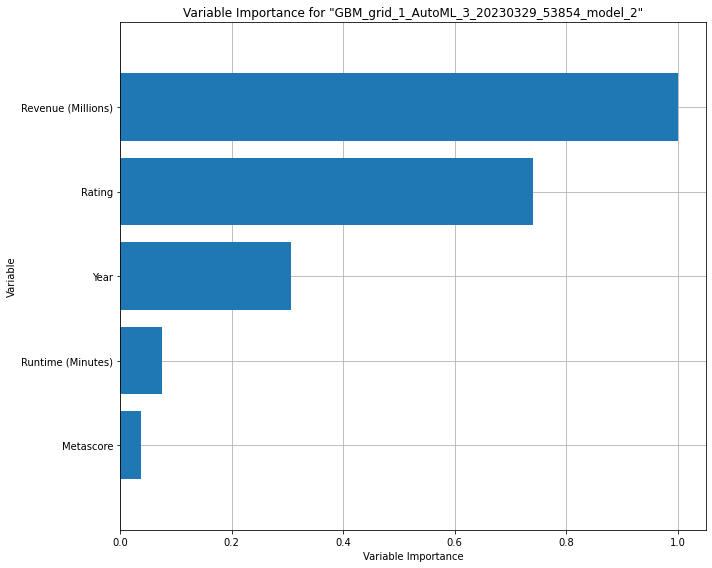

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

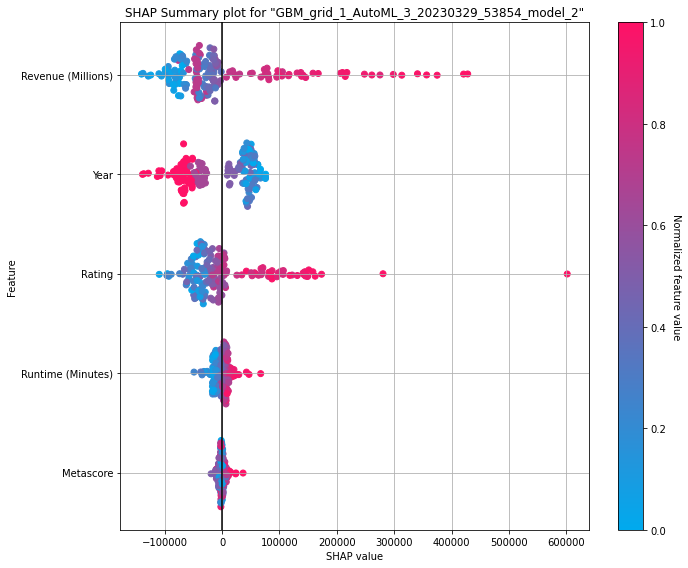

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

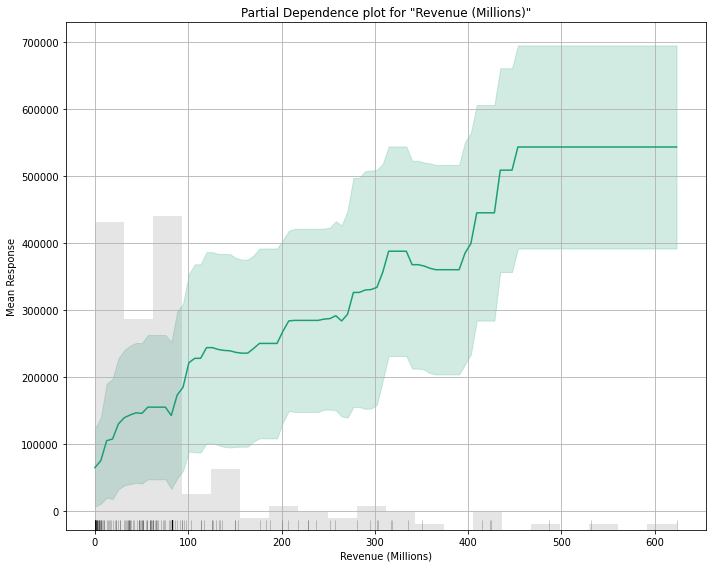

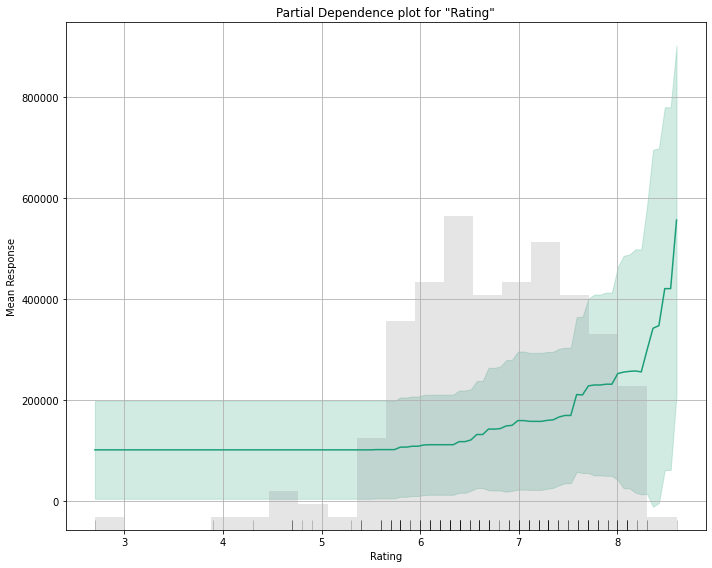

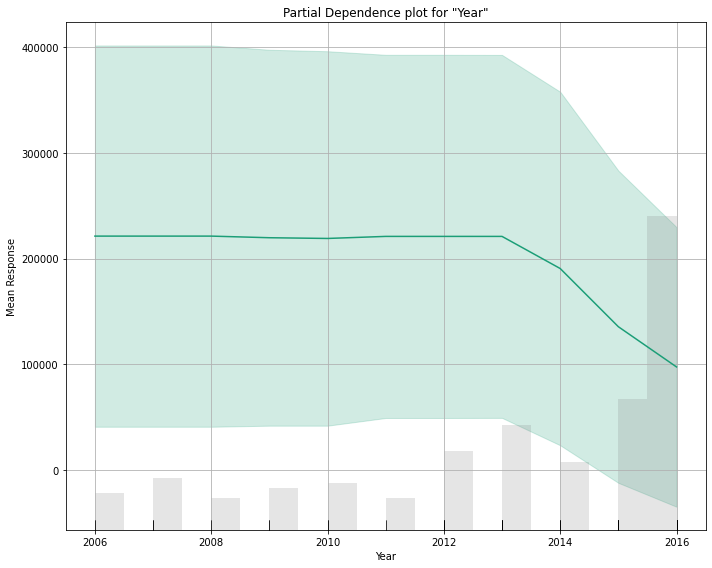

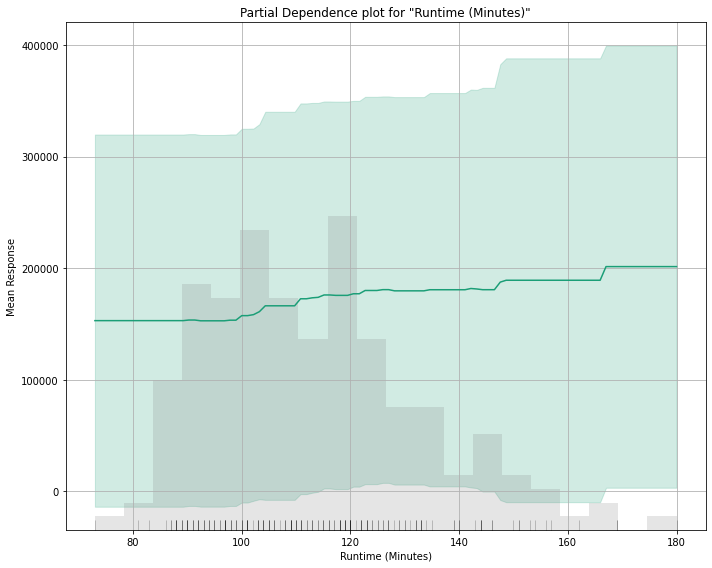

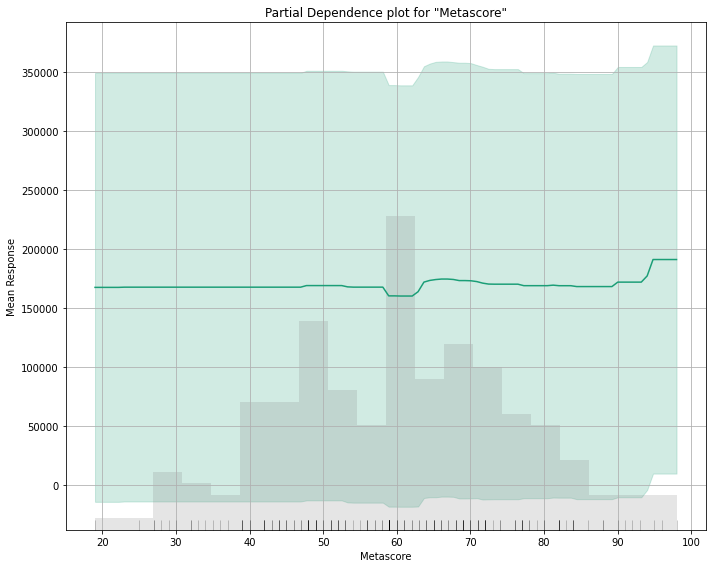

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

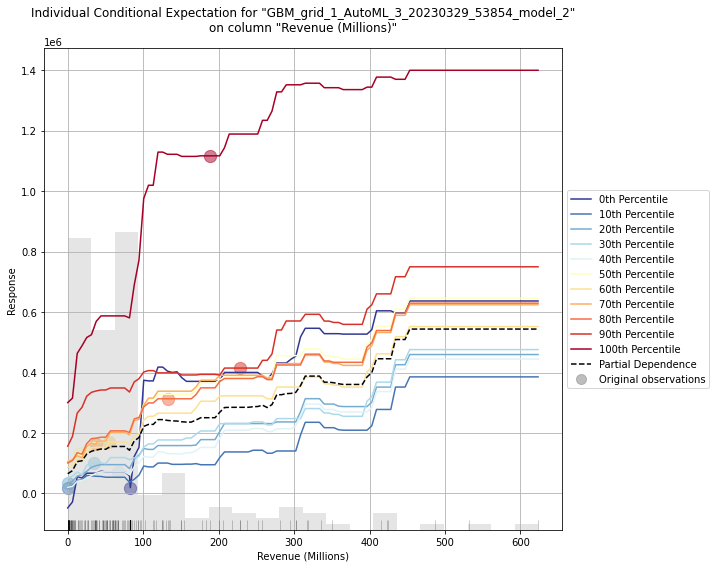

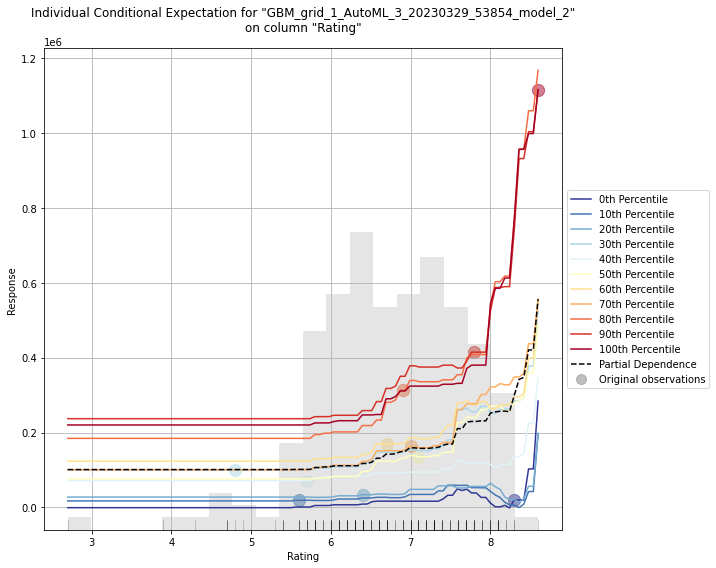

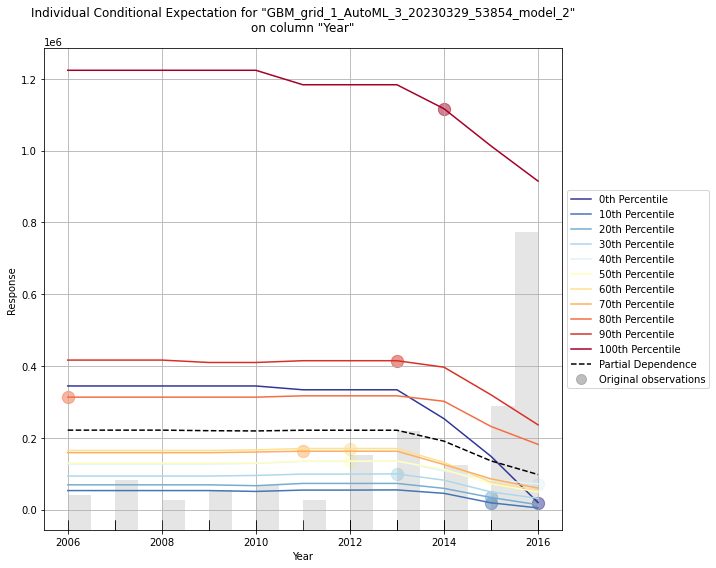

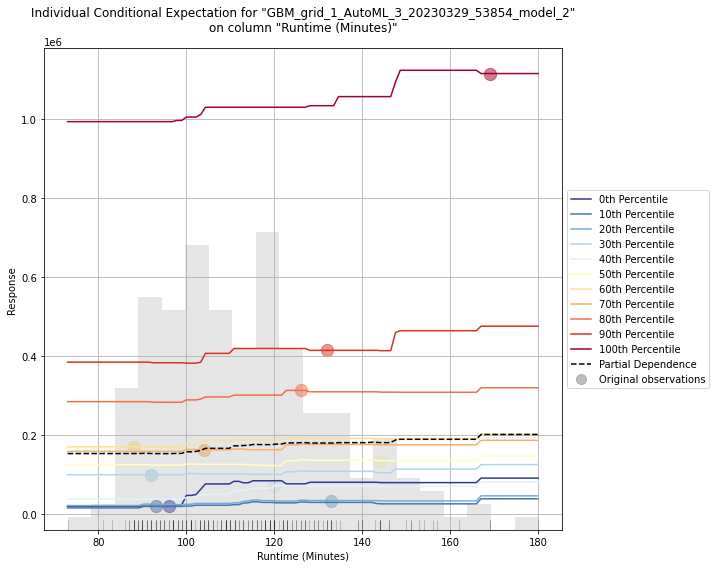

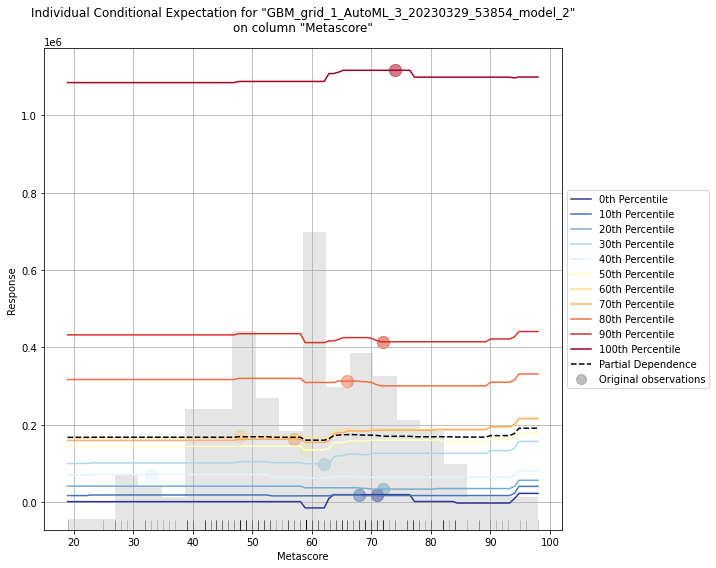

In [292]:
try:
    explain_model = autoML_model.explain(frame = hdf_test, figsize = (10,8))
except IndexError:
    print("Index out of range")

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

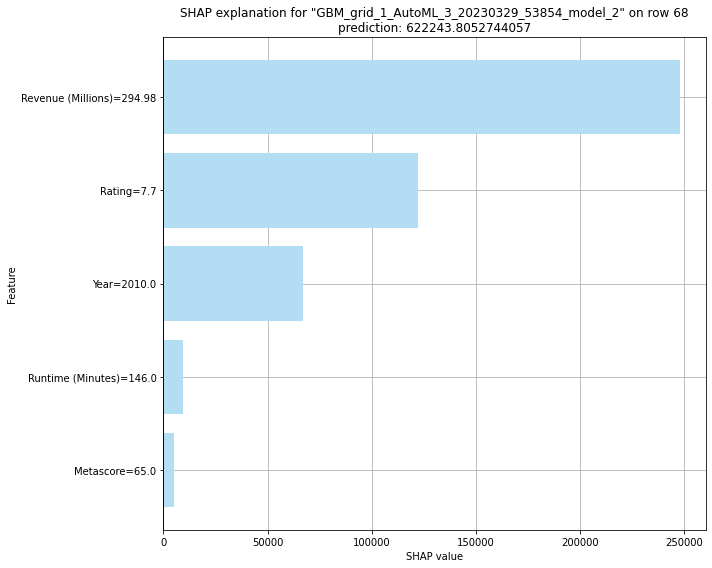

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

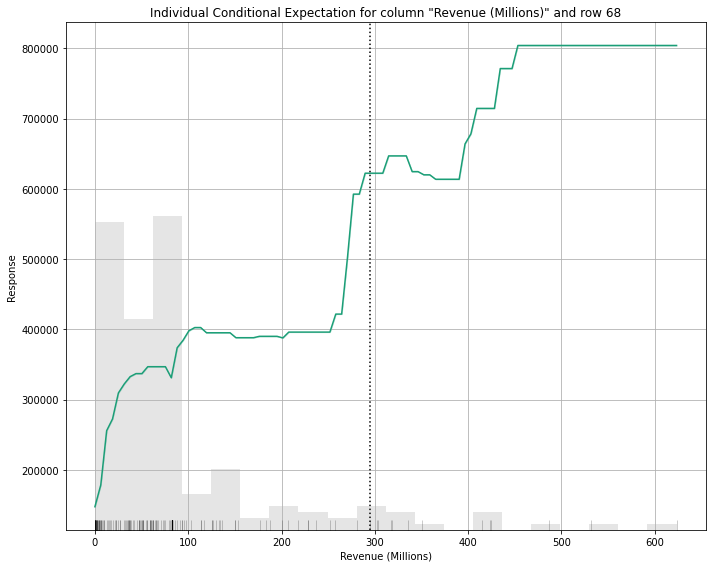

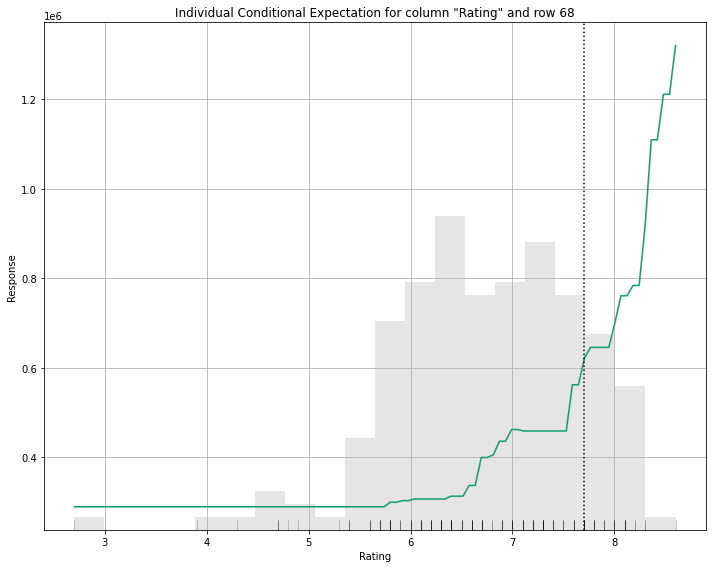

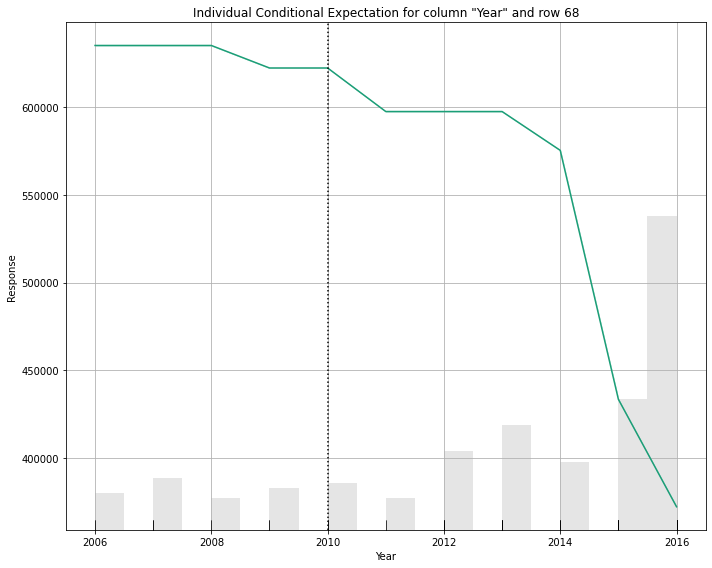

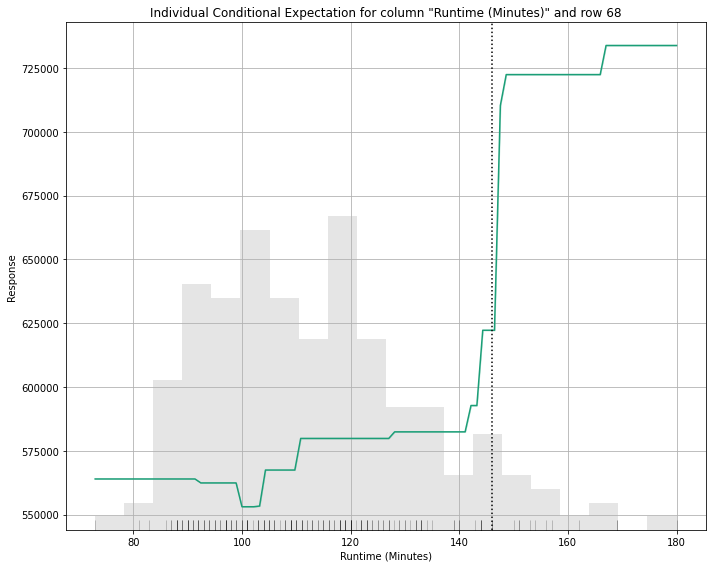

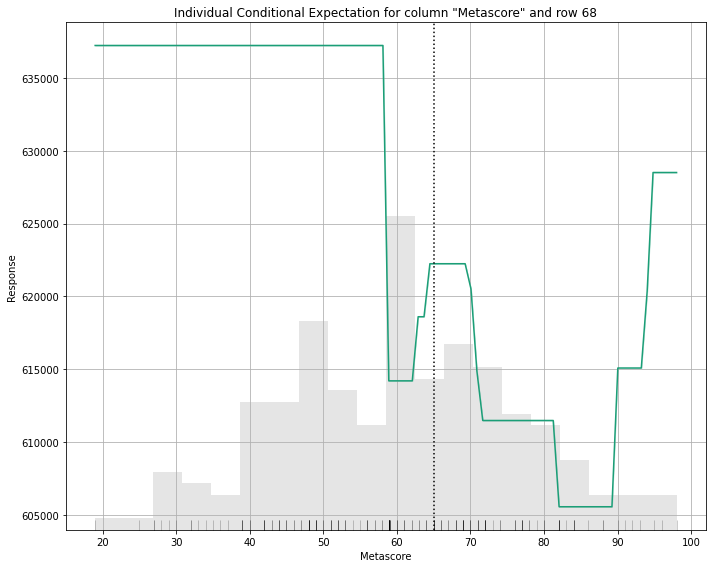

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

In [293]:
autoML_model.explain_row(frame = hdf_test, row_index = 68, figsize = (10,8), exclude_explanations = "leaderboard")

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

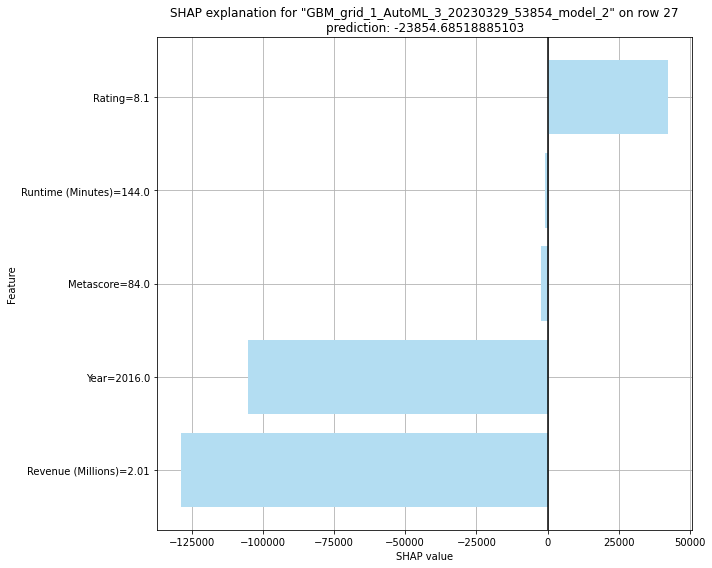

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

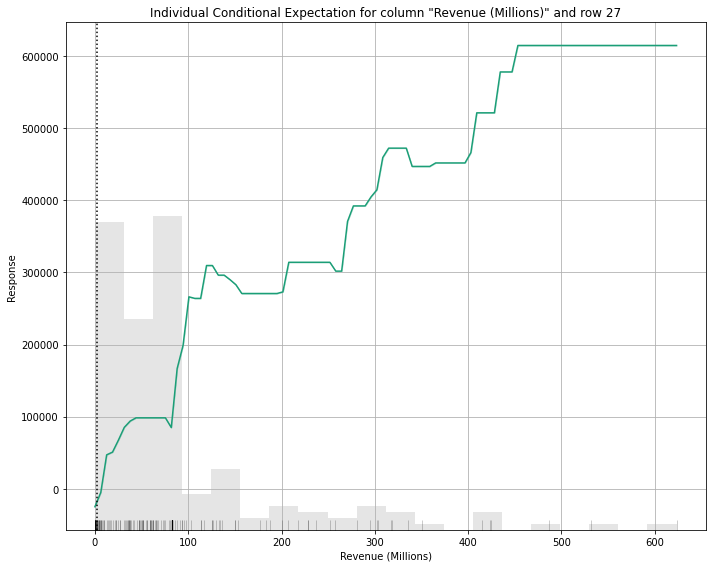

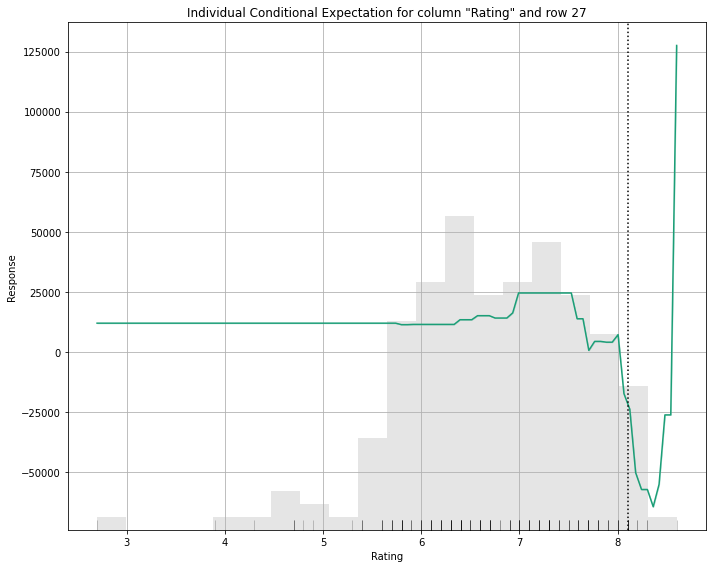

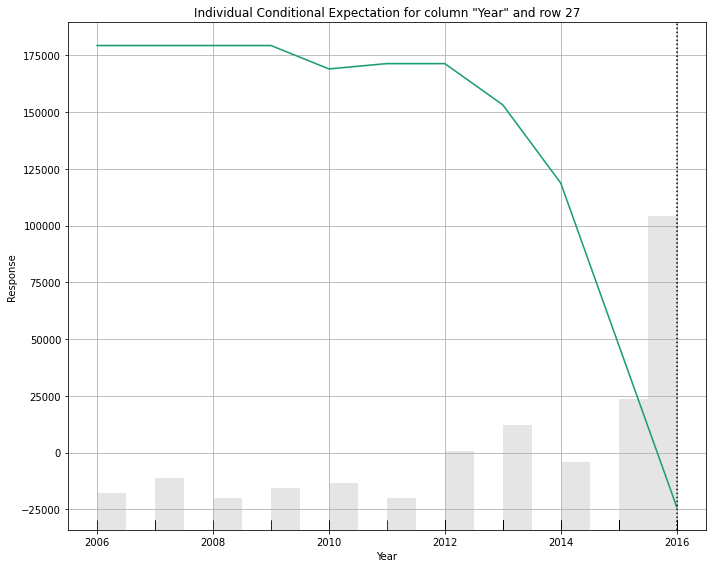

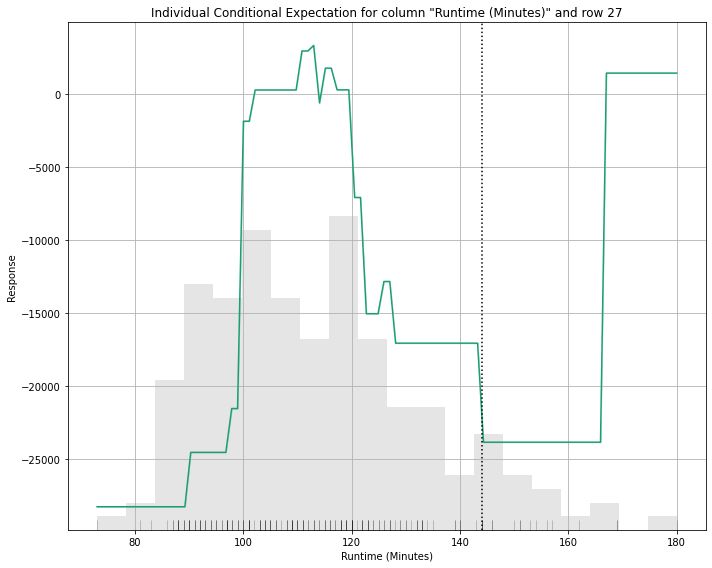

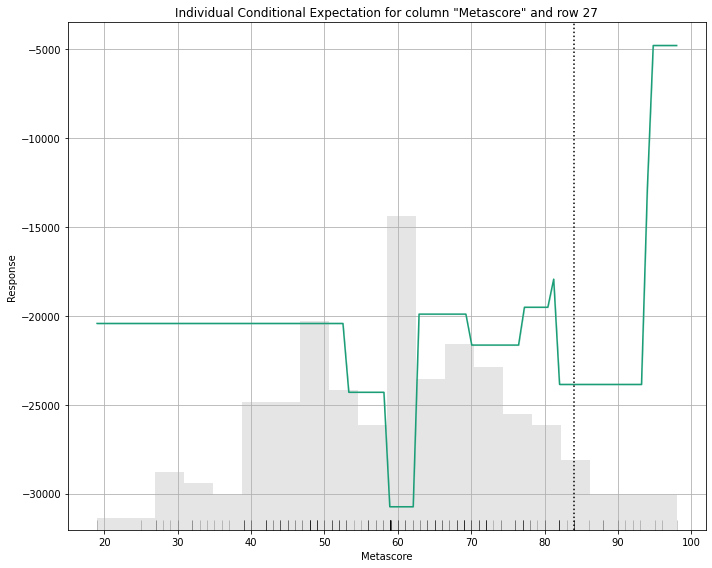

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

In [294]:
autoML_model.explain_row(frame = hdf_test, row_index = 27, figsize = (10,8), exclude_explanations = "leaderboard")

**Comparision between SHAP, LIME, and Partial Dependence Plot Analysis**

Unlike LIME, SHAP does not necessarily build a local interpretable model but rather uses the black-box model to calculate the marginal contribution to the prediction for each feature and then relies on the theoretically sound game theory concept of Shapley values to calculate the feature importance. In this way, SHAP improves upon LIME due to its greater stability and lack of local linear model assumptions.

PDP gives the extent of effect a variable has on the output by freezing the rest of them
SHAP gives how much each variable contributes to the prediction
LIME is more like SHAP but a lite version of it - It takes the local region of the point of interest and gives us information about the contribution each variable has made to the output
We have to analyze our needs and then consider the tradeoff to select the best suitable interpretable method for the ML model

**Conclusion:**

In this notebook, I examined how the shap and lime libraries are used to interpret shap values of a model. I ran shap analysis on linear model, random forest tree based model and on AutoML. Examined the difference between shap, lime and PDP.

**REFERENCES:**

Professor's reference Notebook- https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb 

StackOverflow- https://stackoverflow.com/questions/36489042/indexerror-index-10-is-out-of-bounds-for-axis-0-with-size-10 

TowardsDataScience- https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a 

**LICENSE:**

MIT License

Copyright (c) 2023 Prarthna Nemade

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.